# Práctica 2 Aprendizaje Automático : IBM HR Analytics Employee Attrition & Performance

    David Fernández Fernández y Óscar Jiménez Muriano

En este informe intentamos descubrir los factores que conducen a la deserción de los empleados, utilizando distintos modelos de aprendizaje automático, buscamos descubrir cual es funciona mejor y que características son las más importantes. Comenzamos estudiando los datos que tenemos, cuál es su distribución y que damos una hipótesis sobre qué importancia tendrán sobre la variable objetivo.  

El estudio de las características ha sido extraído de varias fuentes que ya han estudiado este problema previamente, y son las siguientes:  
* [Attrition in an Organization || Why Workers Quit?](https://www.kaggle.com/janiobachmann/attrition-in-an-organization-why-workers-quit), Janio Martinez Bachmann  
* [IBM HR Analysis with 90.3% ACC and 89% AUC](https://www.kaggle.com/esmaeil391/ibm-hr-analysis-with-90-3-acc-and-89-auc), E.Nik  
* [Prediction of Attrition by using SVM](https://www.kaggle.com/shumakaggle/prediction-of-attrition-by-using-svm), ShumaIshigami  
    
También puedes encontrar las fuentes frente el trabajo que hemos extraído en cada caso

## IMPORTS

In [272]:

# Import Libraries
# if (!require("pacman")) install.packages("pacman") 
# pacman::p_load(tidyverse, skimr, GGally, plotly, viridis, caret, randomForest, e1071, rpart, 
#                xgboost, h2o, ggcorrplot, rpart.plot, corrgram, lightgbm, ggplot2, highcharter, 
#                ggthemes, psych, scales, treemap, treemapify, repr, cowplot, magrittr, ggpubr,
#                RColorBrewer, plotrix, ggrepel, forcats, reshape2, caTools, tree, rattle)

options(repos="https://CRAN.R-project.org")

suppressPackageStartupMessages(if(!require("plyr")) install.packages("plyr"))
suppressPackageStartupMessages(if(!require("pastecs")) install.packages("pastecs"))
suppressPackageStartupMessages(if(!require("adabag")) install.packages("adabag") )
suppressPackageStartupMessages(if(!require("MASS")) install.packages("MASS") )
suppressPackageStartupMessages(if(!require("tree")) install.packages("tree") )
suppressPackageStartupMessages(if(!require("tidyverse")) install.packages("tidyverse"))
suppressPackageStartupMessages(if(!require("skimr")) install.packages("skimr") )
suppressPackageStartupMessages(if(!require("GGally")) install.packages("GGally") )
suppressPackageStartupMessages(if(!require("plotly")) install.packages("plotly") )
suppressPackageStartupMessages(if(!require("viridis")) install.packages("viridis") )
suppressPackageStartupMessages(if(!require("caret")) install.packages("caret") )
suppressPackageStartupMessages(if(!require("randomForest")) install.packages("randomForest") )
suppressPackageStartupMessages(if(!require("e1071")) install.packages("e1071") )
suppressPackageStartupMessages(if(!require("rpart")) install.packages("rpart") )
suppressPackageStartupMessages(if(!require("xgboost")) install.packages("xgboost") )
suppressPackageStartupMessages(if(!require("h2o")) install.packages("h2o") )
suppressPackageStartupMessages(if(!require("ggcorrplot")) install.packages("ggcorrplot") )
suppressPackageStartupMessages(if(!require("rpart.plot")) install.packages("rpart.plot") )
suppressPackageStartupMessages(if(!require("corrgram")) install.packages("corrgram"))
suppressPackageStartupMessages(if(!require("lightgbm")) install.packages("lightgbm") )
suppressPackageStartupMessages(if(!require("ggplot2")) install.packages("ggplot2") )
suppressPackageStartupMessages(if(!require("ggthemes")) install.packages("ggthemes") )
suppressPackageStartupMessages(if(!require("psych")) install.packages("psych") )
suppressPackageStartupMessages(if(!require("scales")) install.packages("scales") )
suppressPackageStartupMessages(if(!require("treemap")) install.packages("treemap") )
suppressPackageStartupMessages(if(!require("treemapify")) install.packages("treemapify") )
suppressPackageStartupMessages(if(!require("repr")) install.packages("repr") )
suppressPackageStartupMessages(if(!require("cowplot")) install.packages("cowplot") )
suppressPackageStartupMessages(if(!require("magrittr")) install.packages("magrittr") )
suppressPackageStartupMessages(if(!require("ggpubr")) install.packages("ggpubr") )
suppressPackageStartupMessages(if(!require("RColorBrewer")) install.packages("RColorBrewer") )
suppressPackageStartupMessages(if(!require("plotrix")) install.packages("plotrix") )
suppressPackageStartupMessages(if(!require("ggrepel")) install.packages("ggrepel") )
suppressPackageStartupMessages(if(!require("forcats")) install.packages("forcats") )
suppressPackageStartupMessages(if(!require("reshape2")) install.packages("reshape2") )
suppressPackageStartupMessages(if(!require("caTools")) install.packages("caTools") )
suppressPackageStartupMessages(if(!require("rattle")) install.packages("rattle") )
suppressPackageStartupMessages(if(!require("data.table")) install.packages("data.table") )
suppressPackageStartupMessages(if(!require("dplyr")) install.packages("dplyr") )
suppressPackageStartupMessages(if(!require("VIM")) install.packages("VIM") )
suppressPackageStartupMessages(if(!require("DT")) install.packages("DT") )
suppressPackageStartupMessages(if(!require("gridExtra")) install.packages("gridExtra") )
suppressPackageStartupMessages(if(!require("Metrics")) install.packages("Metrics"))
suppressPackageStartupMessages(if(!require("pROC")) install.packages("pROC") )
suppressPackageStartupMessages(if(!require("dtree")) install.packages("dtree") )
suppressPackageStartupMessages(if(!require("corrplot")) install.packages("corrplot") )
suppressPackageStartupMessages(if(!require("DMwR")) install.packages("DMwR") )
suppressPackageStartupMessages(if(!require("ada")) install.packages("ada") )
suppressPackageStartupMessages(if(!require("neuralnet")) install.packages("neuralnet",dependencies=TRUE,repos="https://cloud.r-project.org"))
options(repr.plot.width=8, repr.plot.height=6)
options(warn=-1)


options(repr.plot.width=8, repr.plot.height=6)
options(warn=-1)

Installing package into ‘/home/m00rphy/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rvest’, ‘xml2’


Installing package into ‘/home/m00rphy/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)

also installing the dependency ‘XML’




---
## LECTURA DE DATOS

In [273]:
# Leemos los datos del archivo y los cargamos en un "dataframe"
df <- read.csv("HR-Employee-Attrition.01.csv")
head(df)

original_df <- df

Age Attrition BusinessTravel    DailyRate Department            
1 41  Yes       Travel_Rarely     1102      Sales                 
2 49  No        Travel_Frequently  279      Research & Development
3 37  Yes       Travel_Rarely     1373      Research & Development
4 33  No        Travel_Frequently 1392      Research & Development
5 27  No        Travel_Rarely      591      Research & Development
6 32  No        Travel_Frequently 1005      Research & Development
  DistanceFromHome Education EducationField EmployeeCount EmployeeNumber ⋯
1 1                2         Life Sciences  1             1              ⋯
2 8                1         Life Sciences  1             2              ⋯
3 2                2         Other          1             4              ⋯
4 3                4         Life Sciences  1             5              ⋯
5 2                1         Medical        1             7              ⋯
6 2                2         Life Sciences  1             8              ⋯
  RelationshipSatisfaction StandardHours StockOptionLevel TotalWorkingYears
1 1                        80            0                 8               
2 4                        80            1                10               
3 2                        80            0                 7               
4 3                        80            0                 8               
5 4                        80            1                 6               
6 3                        80            0                 8               
  TrainingTimesLastYear WorkLifeBalance YearsAtCompany YearsInCurrentRole
1 0                     1                6             4                 
2 3                     3               10             7                 
3 3                     3                0             0                 
4 3                     3                8             7                 
5 3                     3                2             2                 
6 2                     2                7             7                 
  YearsSinceLastPromotion YearsWithCurrManager
1 0                       5                   
2 1                       7                   
3 0                       0                   
4 3                       0                   
5 2                       2                   
6 3                       6

## Análisis de datos 

Exploramos en que consisten los datos que tenemos de cada uno de los empleados, cual es la distribución en cada caso y que podemos esperar de las caracterísiticas.

La descripción oficial de las características en la competición de kaggle es escasa, por lo que hemos encontrado más información sobre ellas [aquí](http://inseaddataanalytics.github.io/INSEADAnalytics/groupprojects/January2018FBL/IBM_Attrition_VSS.html).

Las características son las siguientes: 

| Name | Description  |
| :---- |:-------------|
| AGE |	Numerical Value  |
| ATTRITION |	Employee leaving the company (0=no, 1=yes)  |
| BUSINESS TRAVEL |	(1=No Travel, 2=Travel Frequently, 3=Tavel Rarely)  |
| DAILY RATE |	Numerical Value - Salary Level  |
| DEPARTMENT |	(1=HR, 2=R&D, 3=Sales)  |
| DISTANCE FROM HOME |	Numerical Value - THE DISTANCE FROM WORK TO HOME  |
| EDUCATION |	Numerical Value  |
| EDUCATION FIELD |	(1=HR, 2=LIFE SCIENCES, 3=MARKETING, 4=MEDICAL SCIENCES, 5=OTHERS, 6= TEHCNICAL)  |
| EMPLOYEE COUNT |	Numerical Value  |
| EMPLOYEE NUMBER |	Numerical Value - EMPLOYEE ID  |
| ENVIROMENT SATISFACTION |	Numerical Value - SATISFACTION WITH THE ENVIROMENT  |
| GENDER |	(1=FEMALE, 2=MALE) | 
| HOURLY RATE | Numerical Value - HOURLY SALARY | 
| JOB INVOLVEMENT | Numerical Value - JOB INVOLVEMENT | 
| JOB LEVEL | Numerical Value - LEVEL OF JOB | 
| JOB ROLE | (1=HC REP, 2=HR, 3=LAB TECHNICIAN, 4=MANAGER, 5= MANAGING DIRECTOR, 6= REASEARCH DIRECTOR, 7= RESEARCH SCIENTIST, 8=SALES EXECUTIEVE, 9= SALES REPRESENTATIVE) | 
| JOB SATISFACTION | Numerical Value - SATISFACTION WITH THE JOB | 
| MARITAL STATUS | (1=DIVORCED, 2=MARRIED, 3=SINGLE) | 
| MONTHLY INCOME | Numerical Value - MONTHLY SALARY | 
| MONTHY RATE | Numerical Value - MONTHY RATE | 
| NUMCOMPANIES WORKED | Numerical Value - NO. OF COMPANIES WORKED AT | 
| OVER 18 | (1=YES, 2=NO) | 
| OVERTIME | (1=NO, 2=YES) | 
| PERCENT SALARY HIKE | Numerical Value - PERCENTAGE INCREASE IN SALARY | 
| PERFORMANCE RATING | Numerical Value - ERFORMANCE RATING | 
| RELATIONS SATISFACTION | Numerical Value - RELATIONS SATISFACTION | 
| STANDARD HOURS | Numerical Value - STANDARD HOURS | 
| STOCK OPTIONS LEVEL | Numerical Value - STOCK OPTIONS | 
| TOTAL WORKING YEARS | Numerical Value - TOTAL YEARS WORKED |   
| TRAINING TIMES LAST YEAR | Numerical Value - HOURS SPENT TRAINING | 
| WORK LIFE BALANCE | Numerical Value - TIME SPENT BEWTWEEN WORK AND OUTSIDE | 
| YEARS AT COMPANY | Numerical Value - TOTAL NUMBER OF YEARS AT THE COMPANY | 
| YEARS IN CURRENT ROLE | Numerical Value -YEARS IN CURRENT ROLE | 
| YEARS SINCE LAST PROMOTION | Numerical Value - LAST PROMOTION | 
| YEARS WITH CURRENT MANAGER | Numerical Value - YEARS SPENT WITH CURRENT MANAGER | 

In [274]:
# ¿Cuantas variables tenemos? ¿Cómo son? ¿Cuántas de ellas son categóricas? 
df %>% glimpse()

Rows: 1,470
Columns: 35
$ Age                      <int> 41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, …
$ Attrition                <fct> Yes, No, Yes, No, No, No, No, No, No, No, No…
$ BusinessTravel           <fct> Travel_Rarely, Travel_Frequently, Travel_Rar…
$ DailyRate                <int> 1102, 279, 1373, 1392, 591, 1005, 1324, 1358…
$ Department               <fct> Sales, Research & Development, Research & De…
$ DistanceFromHome         <int> 1, 8, 2, 3, 2, 2, 3, 24, 23, 27, 16, 15, 26,…
$ Education                <int> 2, 1, 2, 4, 1, 2, 3, 1, 3, 3, 3, 2, 1, 2, 3,…
$ EducationField           <fct> Life Sciences, Life Sciences, Other, Life Sc…
$ EmployeeCount            <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ EmployeeNumber           <int> 1, 2, 4, 5, 7, 8, 10, 11, 12, 13, 14, 15, 16…
$ EnvironmentSatisfaction  <int> 2, 3, 4, 4, 1, 4, 3, 4, 4, 3, 1, 4, 1, 2, 3,…
$ Gender                   <fct> Female, Male, Male, Female, Male, Male, Fema…
$ HourlyRate               <

In [275]:
describe(df)

vars n    mean         sd           median 
Age                       1   1470 3.692381e+01    9.1353735    36.0
Attrition*                2   1470 1.161224e+00    0.3678630     1.0
BusinessTravel*           3   1470 2.607483e+00    0.6654549     3.0
DailyRate                 4   1470 8.024857e+02  403.5090999   802.0
Department*               5   1470 2.260544e+00    0.5277923     2.0
DistanceFromHome          6   1470 9.192517e+00    8.1068644     7.0
Education                 7   1470 2.912925e+00    1.0241649     3.0
EducationField*           8   1470 3.247619e+00    1.3313691     3.0
EmployeeCount             9   1470 1.000000e+00    0.0000000     1.0
EmployeeNumber           10   1470 1.024865e+03  602.0243348  1020.5
EnvironmentSatisfaction  11   1470 2.721769e+00    1.0930822     3.0
Gender*                  12   1470 1.600000e+00    0.4900647     2.0
HourlyRate               13   1470 6.589116e+01   20.3294276    66.0
JobInvolvement           14   1470 2.729932e+00    0.7115611     3.0
JobLevel                 15   1470 2.063946e+00    1.1069399     2.0
JobRole*                 16   1470 5.458503e+00    2.4618213     6.0
JobSatisfaction          17   1470 2.728571e+00    1.1028461     3.0
MaritalStatus*           18   1470 2.097279e+00    0.7301208     2.0
MonthlyIncome            19   1470 6.502931e+03 4707.9567831  4919.0
MonthlyRate              20   1470 1.431310e+04 7117.7860441 14235.5
NumCompaniesWorked       21   1470 2.693197e+00    2.4980090     2.0
Over18*                  22   1470 1.000000e+00    0.0000000     1.0
OverTime*                23   1470 1.282993e+00    0.4506065     1.0
PercentSalaryHike        24   1470 1.520952e+01    3.6599377    14.0
PerformanceRating        25   1470 3.153741e+00    0.3608235     3.0
RelationshipSatisfaction 26   1470 2.712245e+00    1.0812089     3.0
StandardHours            27   1470 8.000000e+01    0.0000000    80.0
StockOptionLevel         28   1470 7.938776e-01    0.8520767     1.0
TotalWorkingYears        29   1470 1.127959e+01    7.7807817    10.0
TrainingTimesLastYear    30   1470 2.799320e+00    1.2892706     3.0
WorkLifeBalance          31   1470 2.761224e+00    0.7064758     3.0
YearsAtCompany           32   1470 7.008163e+00    6.1265252     5.0
YearsInCurrentRole       33   1470 4.229252e+00    3.6231370     3.0
YearsSinceLastPromotion  34   1470 2.187755e+00    3.2224303     1.0
YearsWithCurrManager     35   1470 4.123129e+00    3.5681361     3.0
                         trimmed      mad       min  max   range skew        
Age                         36.471088    8.8956   18    60    42  0.412443243
Attrition*                   1.076531    0.0000    1     2     1  1.840603819
BusinessTravel*              2.759354    0.0000    1     3     2 -1.436070558
DailyRate                  803.830782  510.0144  102  1499  1397 -0.003511391
Department*                  2.254252    0.0000    1     3     2  0.171879479
DistanceFromHome             8.084184    7.4130    1    29    28  0.956163540
Education                    2.975340    1.4826    1     5     4 -0.289090164
EducationField*              3.095238    1.4826    1     6     5  0.549248552
EmployeeCount                1.000000    0.0000    1     1     0          NaN
EmployeeNumber            1023.400510  790.9671    1  2068  2067  0.016540210
EnvironmentSatisfaction      2.777211    1.4826    1     4     3 -0.320998308
Gender*                      1.625000    0.0000    1     2     1 -0.407831781
HourlyRate                  66.022109   26.6868   30   100    70 -0.032245042
JobInvolvement               2.735544    0.0000    1     4     3 -0.497402643
JobLevel                     1.896259    1.4826    1     5     4  1.023309576
JobRole*                     5.613946    2.9652    1     9     8 -0.356541128
JobSatisfaction              2.785714    1.4826    1     4     3 -0.328999464
MaritalStatus*               2.121599    1.4826    1     3     2 -0.151864201
MonthlyIncome             5667.240646 3260.2374 1009 19999 

Tenemos 1.470 filas, con 35 columnas cada una, donde está incluida la columna a predecir “Attrition”. Es muy posible tengamos muchos casos de correlación. 

También hay columnas con variables constantes y son Over18, StandardHours y EmployeeCount que eliminaremos posteriormente.

---
## VISUALIZAR DATOS

El siguiente espacio recoge el trabajo de 

Janio Martinez Bachmann,   

https://www.kaggle.com/janiobachmann/attrition-in-an-organization-why-workers-quit,   

pero se ha observado detenidamente y hemos comentado nuestras observaciones. 

<h3>Distribution of our Labels: </h3>

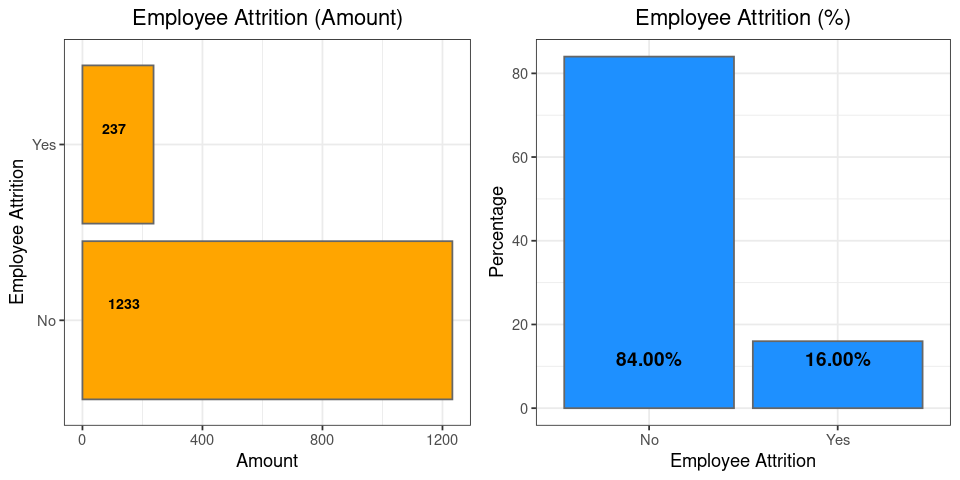

In [276]:
options(repr.plot.width=8, repr.plot.height=4)

attritions_number <- df %>% group_by(Attrition) %>% summarise(Count=n(), .groups = 'drop') %>%
ggplot(aes(x=Attrition, y=Count)) + geom_bar(stat="identity", fill="orange", color="grey40") + theme_bw() + coord_flip() + 
geom_text(aes(x=Attrition, y=0.01, label= Count),
            hjust=-0.8, vjust=-1, size=3, 
            colour="black", fontface="bold",
         angle=360) + labs(title="Employee Attrition (Amount)", x="Employee Attrition",y="Amount") + theme(plot.title=element_text(hjust=0.5))

attrition_percentage <- df %>% group_by(Attrition) %>% summarise(Count=n(), .groups = 'drop') %>% 
mutate(pct=round(prop.table(Count),2) * 100) %>% 
ggplot(aes(x=Attrition, y=pct)) + geom_bar(stat="identity", fill = "dodgerblue", color="grey40") + 
geom_text(aes(x=Attrition, y=0.01, label= sprintf("%.2f%%", pct)),
            hjust=0.5, vjust=-3, size=4, 
            colour="black", fontface="bold") + theme_bw() + labs(x="Employee Attrition", y="Percentage") + 
labs(title="Employee Attrition (%)") + theme(plot.title=element_text(hjust=0.5))



plot_grid(attritions_number, attrition_percentage, align="h", ncol=2)

Como vemos nuestros datos tienen un sesgo en "Attrition" porque tenemos muchos más casos falsos que verdaderos, por lo que esperamos que los modelos sean mejores prediciendo los casos en que los empleados no abandonen la empresa frente a los que sí, hay que tener en cuenta que en caso de acertar solo aquellos que son falsos, la “Accuracy” del modelo puede ser alta sin funcionar correctamente ni detectar los casos que nos interesa, que son aquellos en los que el trabajador deja la empresa. 

<h2> Gender Analysis: </h2>

In [277]:
avg.age <- df %>% select(Gender, Age) %>% group_by(Gender) %>% summarize(avg=mean(Age), .groups = 'drop')

avg.age

Gender avg     
1 Female 37.32993
2 Male   36.65306

<h4><b>Age Distribution by Gender </b></h4>
<a id="age_distribution_gender"></a>

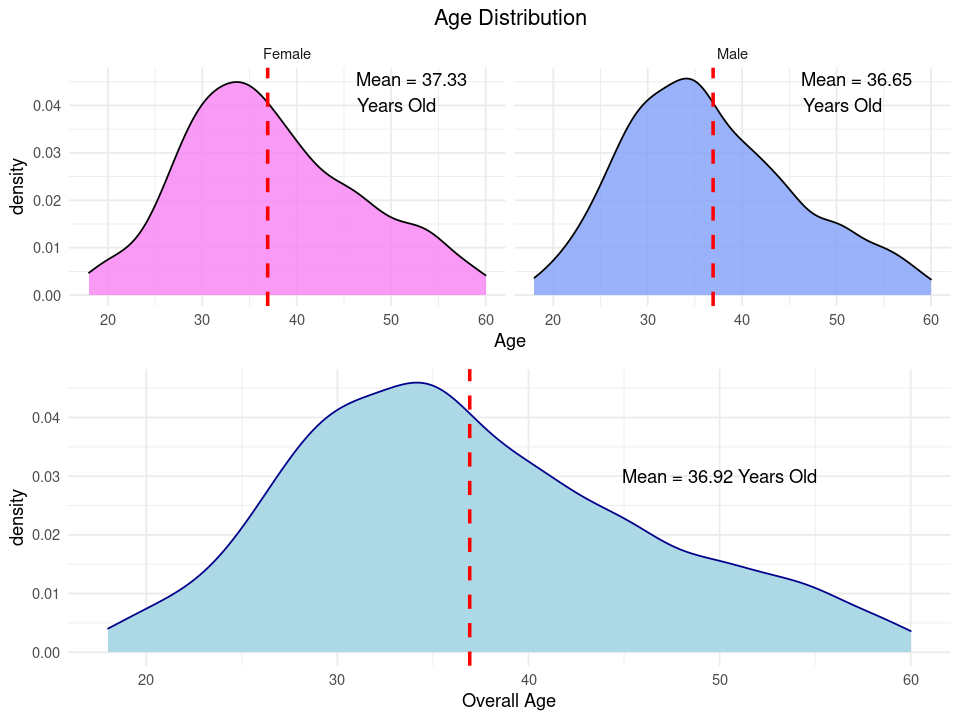

In [278]:
# Let's look closely at the distribution of the Age of our employees
# Why? Unlike the older generation, millenials tend to switch workplaces more and thus that could
# be an explanation of why we have the current levels of attrition
options(repr.plot.width=8, repr.plot.height=6) 

dat_text <- data.frame(
  label = c("Mean = 37.33 \n Years Old", "Mean = 36.65 \n Years Old"),
  Gender   = c("Female", "Male")
)



gender.dist <- df %>% select(Gender, Age) %>% filter(Gender == 'Male' | Gender== "Female") %>% 
filter(!is.na(Age)) %>% group_by(Gender) %>% 
ggplot(aes(x=Age)) + geom_density(aes(fill=Gender), alpha=0.8, show.legend=FALSE) + facet_wrap(~Gender) + theme_minimal() + 
geom_vline(aes(xintercept=mean(Age)),
            color="red", linetype="dashed", size=1) + labs(title="Age Distribution") + 
theme(plot.title=element_text(hjust=0.5)) + scale_fill_manual(values=c("#F781F3", "#819FF7")) + 
geom_text(
  data    = dat_text,
  mapping = aes(x = 45, y = 0.03, label = label),
  hjust   = -0.1,
  vjust   = -1
)


overall.dist <- df %>% select(Gender, Age) %>% filter(!is.na(Age)) %>% 
ggplot(data=df, mapping=aes(x=Age)) + geom_density(color="darkblue", fill="lightblue") + 
geom_vline(aes(xintercept=mean(Age)),
            color="red", linetype="dashed", size=1) +  theme_minimal() + labs(x="Overall Age") + 
annotate("text", label = "Mean = 36.92 Years Old", x = 50, y = 0.03, color = "black")


plot_grid(gender.dist, overall.dist, nrow=2)

<h3><b>Distribution of Job Satisfaction:</b> </h3>
<a id="jobsat_distribution"></a>

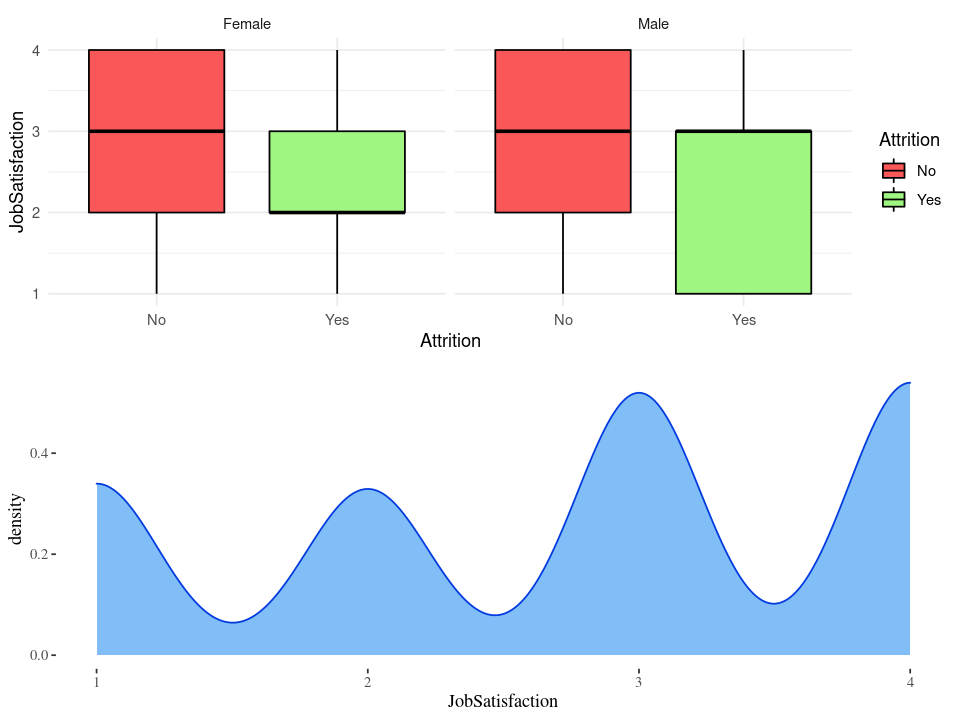

In [279]:
# Boxplot with attrition in the X-axis and Job Satisfaction in the y-Axis
options(repr.plot.width=8, repr.plot.height=6) 


box.attrition <- df %>% select(Attrition, JobSatisfaction, Gender) %>% 
ggplot(aes(x=Attrition, y=JobSatisfaction, fill=Attrition)) + geom_boxplot(color="black") + theme_minimal() + facet_wrap(~Gender) + 
scale_fill_manual(values=c("#FA5858", "#9FF781"))


# Distribution of Job Satisfaction
dist.satisfaction <- df %>% select(JobSatisfaction) %>%
ggplot(aes(x=JobSatisfaction)) + geom_density(color="#013ADF", fill="#81BEF7", trim=TRUE) + theme_tufte() + xlim(range(c(1,4)))



plot_grid(box.attrition, dist.satisfaction, nrow=2)

La mayoría de las personas están satisfechas con su trabajo, pero aquellos que dejan la empresa valoran su satisfacción de forma más negativa que el resto, sobre todo en el caso de los hombres, que tienden a poner una nota máxima de 3 sobre 5. 

<h3> <b>Monthly Income by Gender</b> </h3>
<a id="monthly_income_gender"></a>

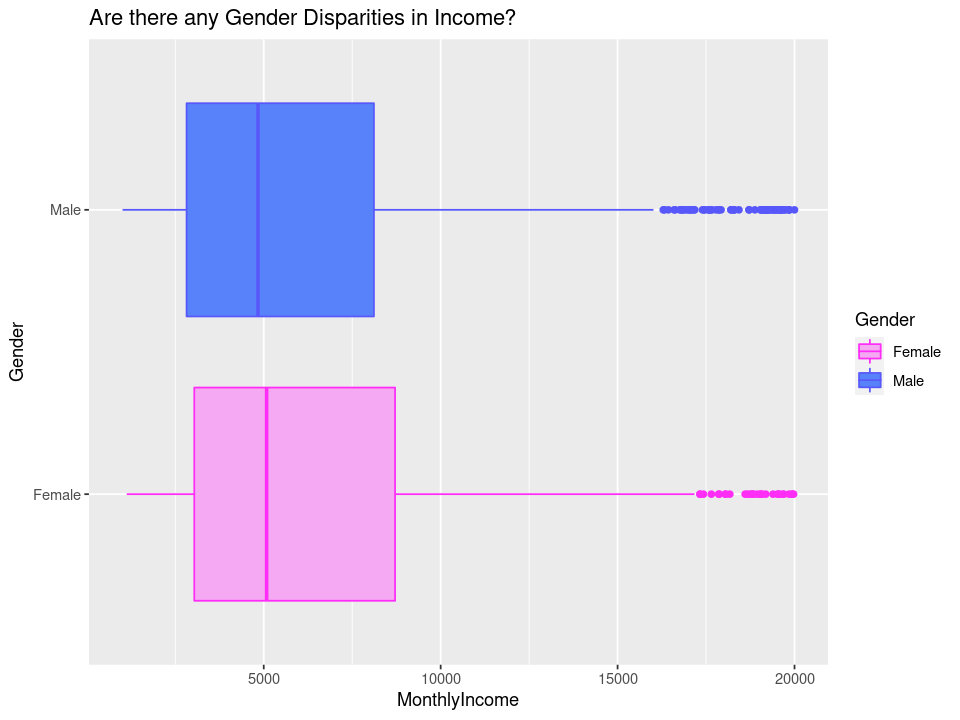

In [280]:
p <- ggplot(df, aes(x=Gender, y=MonthlyIncome, color=Gender, fill=Gender)) + geom_boxplot() + 
scale_fill_manual(values=c("#F5A9F2", "#5882FA")) + scale_color_manual(values=c("#FE2EF7", "#5858FA")) +
coord_flip() + labs(title="Are there any Gender Disparities in Income?")

p

<h3><b>Average Income and Presence by Department</b> </h3>
<a id="presence_department"></a>

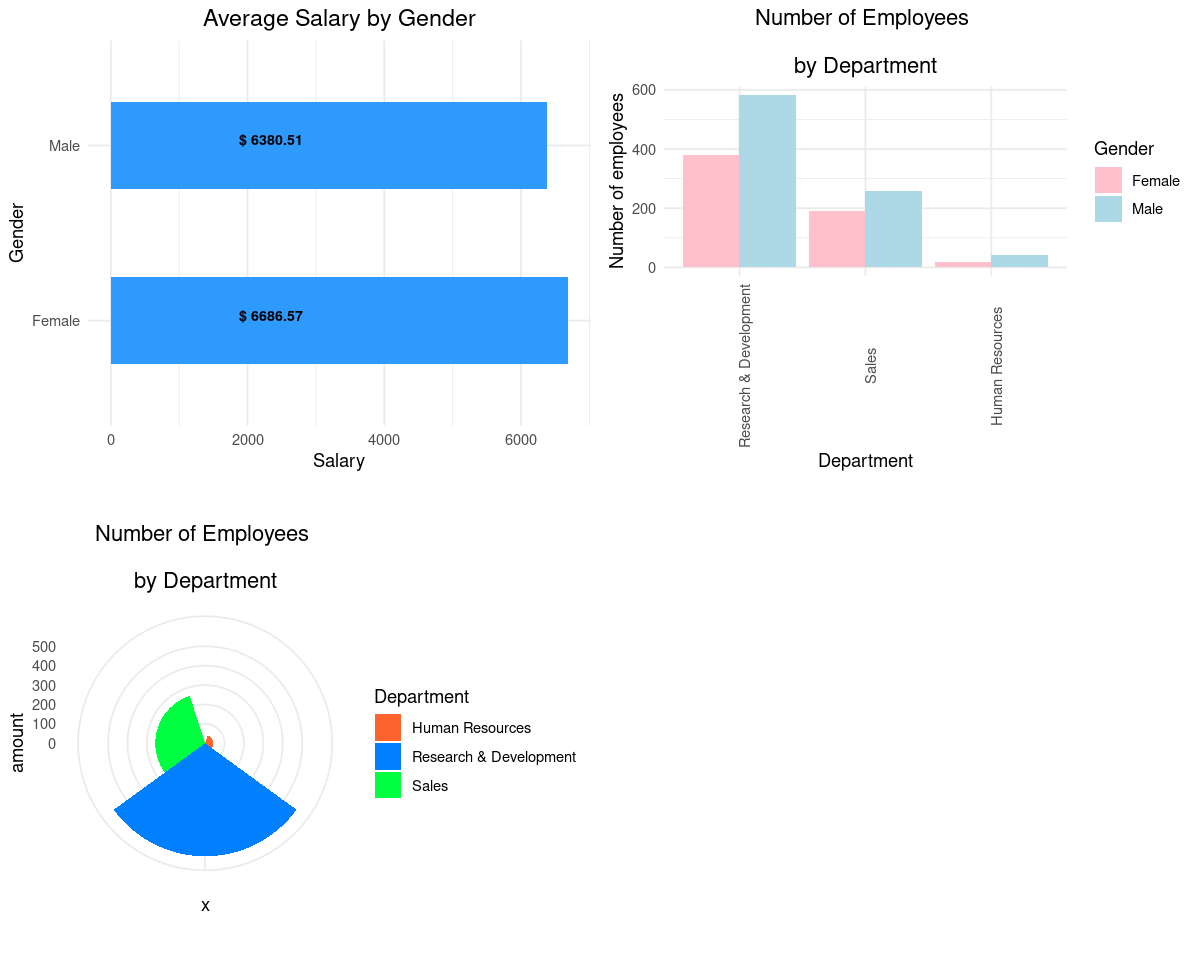

In [281]:
options(repr.plot.width=10, repr.plot.height=8) 

gender.income <- df %>% select(Gender, MonthlyIncome) %>% group_by(Gender) %>% summarise(avg_income=round(mean(MonthlyIncome), 2), .groups = 'drop') %>%
ggplot(aes(x=Gender, y=avg_income)) + geom_bar(stat="identity", fill="#2E9AFE", width=0.5) + 
geom_text(aes(x=Gender, y=0.01, label= paste0("$ ", avg_income)),
            hjust=-2, vjust=0, size=3, 
            colour="black", fontface="bold",
         angle=360) + labs(title="Average Salary by Gender", x="Gender",y="Salary") + coord_flip() + 
theme_minimal() + theme(plot.title=element_text(size=14, hjust=0.5))

# # How many people work in each department by gender
gender.department <- df %>% group_by(Department, Gender) %>% summarise(amount=n(), .groups = 'drop') %>%
ggplot(aes(x=reorder(Department, -amount), y=amount, fill=Gender)) + geom_bar(stat="identity", position="dodge") + theme_minimal() + 
theme(axis.text.x = element_text(angle = 90), plot.title=element_text(hjust=0.5)) + scale_fill_manual(values=c("pink", "lightblue")) + 
labs(title="Number of Employees \n
by Department",x="Department", y="Number of employees")


departments <- df %>% group_by(Department, Gender) %>% summarise(amount=n(), .groups = 'drop') %>%
ggplot(aes(x="", y=amount, fill=Department), show.legend=FALSE, width=) + geom_bar(stat="identity", position="dodge") + theme_minimal() + 
theme(axis.text.x = element_text(angle = 90), plot.title=element_text(hjust=0.5), aspect.ratio=1) + 
labs(title="Number of Employees \n
by Department") + coord_polar() + scale_fill_manual(values=c("#FE642E", "#0080FF","#00FF40"))

plot_grid(gender.income, gender.department, departments, ncol=2, nrow=2)

Las mujeres en la empresa tienen una media de salario más alta por lo que puede justificar que la satisfacción con él también lo sea.   

Por lo general parece que una mayoría tiene sueldos "parecidos" que rondan entre los 3.000 y los 7.000 dólares, pero una minoría llega a ganar sobre los 15.000 dólares. 

Las dimensiones de los distintos departamentos varía considerablemente, y tenemos muchos más datos del departamento de Investigación y desarrollo.

<h2>Analysis by Generation and Education: </h2>

<h3><b>Understanding Generational Behavior: </b> </h3>
<a id="generational_behavior"></a>

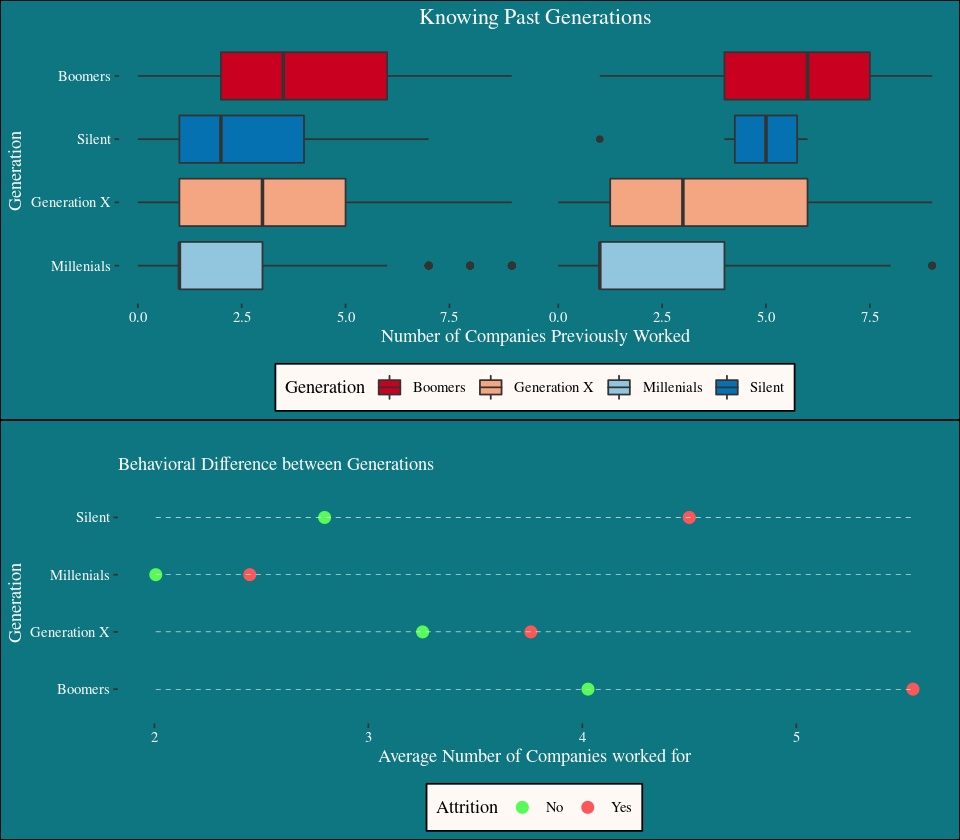

In [282]:
# Distribution of Number of Companies Worked by Attrition and Age
# We want to see if young people have worked in more companies than the older generation
# This might prove that the millenials tend to be more picky with regards to jobs than the older generation.
options(repr.plot.width=8, repr.plot.height=7) 

# First we must create categoricals variables based on Age
df$Generation <- ifelse(df$Age<37,"Millenials",
ifelse(df$Age>=38 & df$Age<54,"Generation X",
ifelse(df$Age>=54 & df$Age<73,"Boomers","Silent"
)))


# Let's see the distribution by generation now
generation.dist <- df %>% select(Generation, NumCompaniesWorked, Attrition) %>% 
ggplot() + geom_boxplot(aes(x=reorder(Generation, NumCompaniesWorked, FUN=median), 
                                      y=NumCompaniesWorked, fill=Generation)) + 
theme_tufte() + facet_wrap(~Attrition) + 
scale_fill_brewer(palette="RdBu") + coord_flip() + 
labs(title="Knowing Past Generations",x="Generation", y="Number of Companies Previously Worked") + 
theme(legend.position="bottom", legend.background = element_rect(fill="#FFF9F5",
                                  size=0.5, linetype="solid", 
                                  colour ="black")) + theme(strip.background = element_blank(), strip.text.x = element_blank(), 
     plot.title=element_text(hjust=0.5, color="white"), plot.background=element_rect(fill="#0D7680"),
                                                        axis.text.x=element_text(colour="white"), axis.text.y=element_text(colour="white"),
                                                        axis.title=element_text(colour="white"))


# 2.69
overall.avg <- df %>% select(Generation, NumCompaniesWorked) %>% summarize(avg_ov=mean(NumCompaniesWorked), .groups = 'drop')



# Let's find the Average Numbers of Companies worked by Generation
avg.comp <- df %>% select(Generation, NumCompaniesWorked, Attrition) %>% group_by(Generation, Attrition) %>%
summarize(avg=mean(NumCompaniesWorked), .groups = 'drop') %>% 
ggplot(aes(x=Generation, y=avg, color=Attrition)) + 
  geom_point(size=3) + theme_tufte() +  # Draw points
  geom_segment(aes(x=Generation, 
                   xend=Generation, 
                   y=min(avg), 
                   yend=max(avg)), 
               linetype="dashed", 
               size=0.1,
              color="white") +  
  labs(title="", 
       subtitle="Behavioral Difference between Generations",
       y="Average Number of Companies worked for",
      x="Generation") +  
  coord_flip() + scale_color_manual(values=c("#58FA58", "#FA5858")) + 
theme(legend.position="bottom", legend.background = element_rect(fill="#FFF9F5",
                                  size=0.5, linetype="solid", 
                                  colour ="black")) + theme(strip.background = element_blank(), strip.text.x = element_blank(), 
     plot.title=element_text(hjust=0.5, color="white"),plot.subtitle=element_text(color="white"), plot.background=element_rect(fill="#0D7680"),
                                                        axis.text.x=element_text(colour="white"), axis.text.y=element_text(colour="white"),
                                                        axis.title=element_text(colour="white"))


plot_grid(generation.dist, avg.comp, nrow=2)

Como dentro de "Attrition" tenemos también las jubilaciones, es normal encontrar que cuando más mayor es la persona más casos de "Attrition" tenemos y en más empresas ha trabajado, es claro que la "Attrition" está relacionada con la edad de la persona en estos casos. Aun así, parece que los Milenias, los más jóvenes, suelen dejar el trabajo en mayor proporción por motivos distintos, son despedidos o encuentran mejores ofertas de trabajo. 

<h3><b> Attrition by Educational Level: </b> </h3>
<a id="attrition_educational"></a>

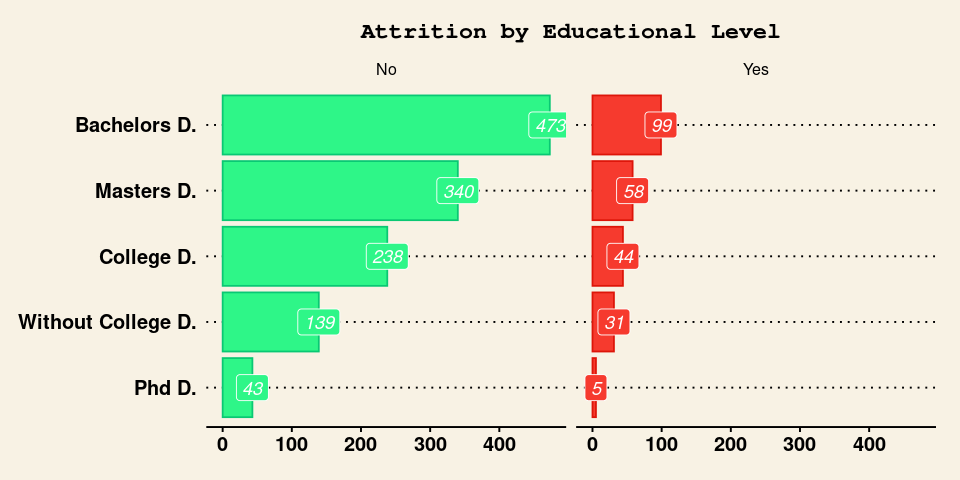

In [283]:
options(repr.plot.width=8, repr.plot.height=4) 

# Give names for the different education levels.
df$Educational_Levels <-  ifelse(df$Education == 1, "Without College D.",
                            ifelse(df$Education == 2 , "College D.",
                                  ifelse(df$Education == 3, "Bachelors D.",
                                        ifelse(df$Education == 4, "Masters D.", "Phd D."))))

# I want to know in terms of proportions if we are loosing key talent here.
edu.level <- df %>% select(Educational_Levels, Attrition) %>% group_by(Educational_Levels, Attrition) %>% 
summarize(n=n(), .groups = 'drop') %>% 
ggplot(aes(x=fct_reorder(Educational_Levels,n), y=n, fill=Attrition, color=Attrition)) + geom_bar(stat="identity") + facet_wrap(~Attrition) + 
coord_flip() + scale_fill_manual(values=c("#2EF688", "#F63A2E")) + scale_color_manual(values=c("#09C873","#DD1509")) + 
geom_label(aes(label=n, fill = Attrition), colour = "white", fontface = "italic") + 
labs(x="", y="Number of Employees", title="Attrition by Educational Level") + theme_wsj() + 
theme(legend.position="none", plot.title=element_text(hjust=0.5, size=14))

edu.level

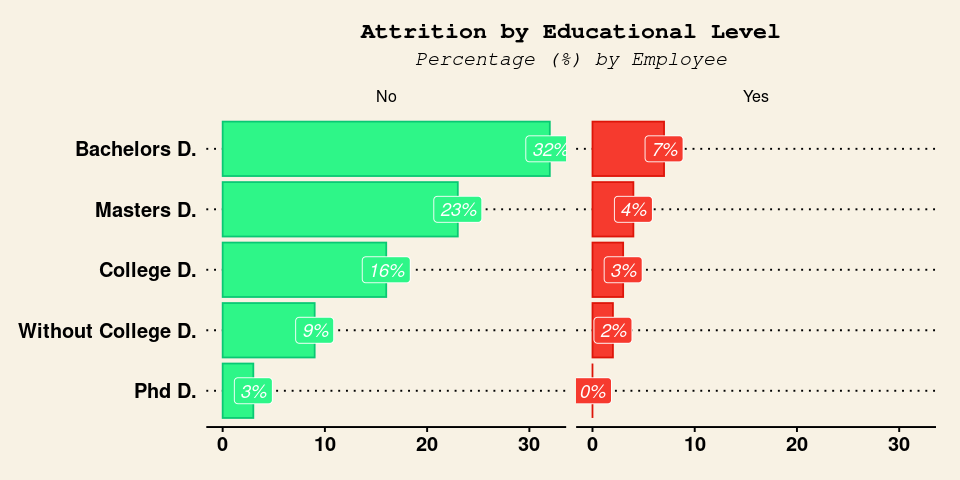

In [284]:
edu.pct <- df %>% select(Educational_Levels, Attrition) %>% group_by(Educational_Levels, Attrition) %>% 
summarize(n=n(), .groups = 'drop') %>% mutate(pct=round(prop.table(n),2) * 100) %>% arrange(desc(pct)) %>%
ggplot(aes(x=fct_reorder(Educational_Levels,pct), y=pct, fill=Attrition, color=Attrition)) + geom_bar(stat="identity") + facet_wrap(~Attrition) + 
coord_flip() + geom_label(aes(label=paste0(pct, "%"), fill = Attrition), colour = "white", fontface = "italic") + 
scale_fill_manual(values=c("#2EF688", "#F63A2E")) + scale_color_manual(values=c("#09C873","#DD1509")) + 
labs(x="", y="Number of Employees (%)", title="Attrition by Educational Level", subtitle="Percentage (%) by Employee")+ theme_wsj() + 
theme(legend.position="none", plot.title=element_text(hjust=0.5, size=14), plot.subtitle=element_text(hjust=0.5, size=12, face="italic"))

edu.pct

Veo interesante resaltar que las personas con doctorado suelen quedarse en la empresa, aunque no sabemos los motivos, tienen mayor sueldo y probablemente no sean despedidos.  
Son los empleados menos comunes y seguramente los más valorados.  
Hay que resaltar que cabe la posibilidad de que ocurra a causa de la menor cantidad de ejemplos de esta situación.

<h2> The Impact of Income towards Attrition </h2>

<h3><b> Average Income by Department: </b></h3>
<a id="Income_department"></a>

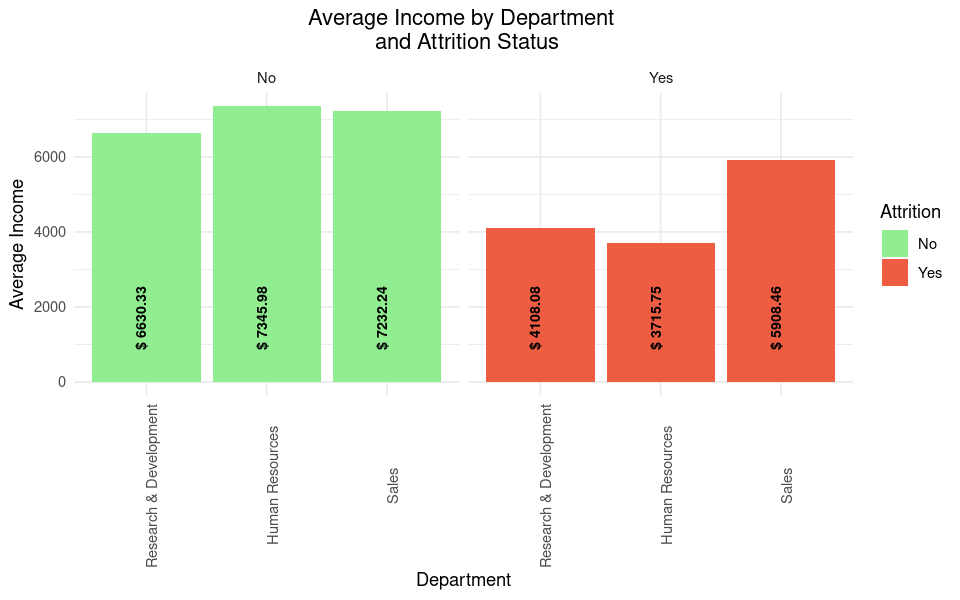

In [285]:
# Let's determine if income was a major factor when it came to leaving the company.
# Let's start by taking the average monthly income of people who left the company and people who stayed in the company
# Group by department 
options(repr.plot.width=8, repr.plot.height=5) 


avg.income <- df %>% select(Department, MonthlyIncome, Attrition) %>% group_by(Attrition, Department) %>%
summarize(avg.inc=mean(MonthlyIncome), .groups = 'drop') %>%
ggplot(aes(x=reorder(Department, avg.inc), y=avg.inc, fill=Attrition)) + geom_bar(stat="identity", position="dodge") + facet_wrap(~Attrition) + 
theme_minimal() + theme(axis.text.x = element_text(angle = 90), plot.title=element_text(hjust=0.5)) + 
scale_fill_manual(values=c("lightgreen", "tomato2")) + 
labs(y="Average Income", x="Department", title="Average Income by Department \n and Attrition Status") + 
geom_text(aes(x=Department, y=0.01, label= paste0("$ ", round(avg.inc,2))),
            hjust=-0.5, vjust=0, size=3, 
            colour="black", fontface="bold",
         angle=90)


avg.income

<h3><b>Determining Satisfaction by Income:</b> </h3>
<a id="satisfaction_income"></a>

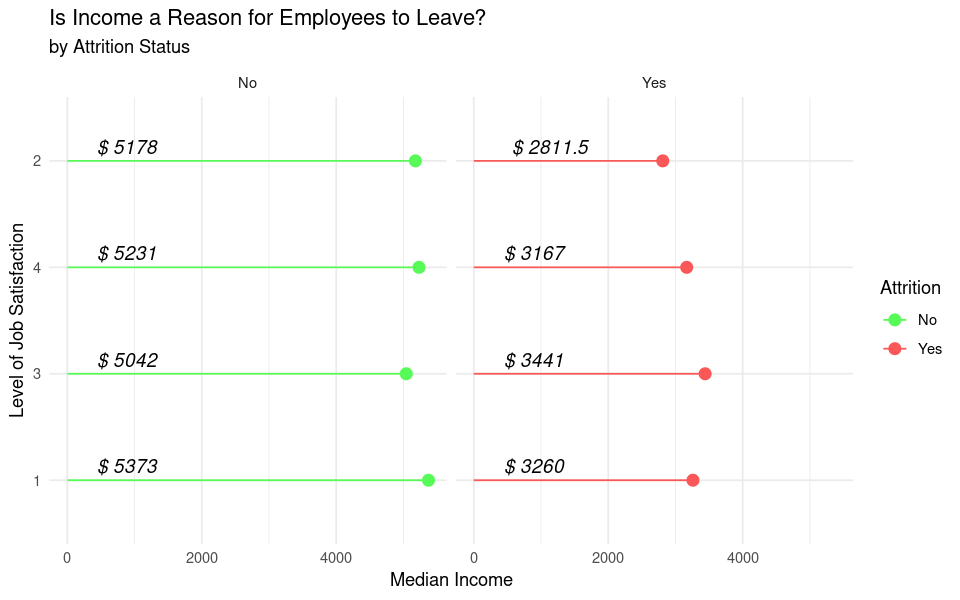

In [286]:
options(repr.plot.width=8, repr.plot.height=5) 

# Turn the column to factor: One because it should not be considered an integer
# Two: Will help us sort in an orderly manner.
df$JobSatisfaction <- as.factor(df$JobSatisfaction)

high.inc <- df %>% select(JobSatisfaction, MonthlyIncome, Attrition) %>% group_by(JobSatisfaction, Attrition) %>%
summarize(med=median(MonthlyIncome), .groups = 'drop') %>%
ggplot(aes(x=fct_reorder(JobSatisfaction, -med), y=med, color=Attrition)) + 
  geom_point(size=3) + 
  geom_segment(aes(x=JobSatisfaction, 
                   xend=JobSatisfaction, 
                   y=0, 
                   yend=med)) + facet_wrap(~Attrition) + 
  labs(title="Is Income a Reason for Employees to Leave?", 
       subtitle="by Attrition Status",
      y="Median Income",
      x="Level of Job Satisfaction") + 
  theme(axis.text.x = element_text(angle=65, vjust=0.6), plot.title=element_text(hjust=0.5), strip.background = element_blank(),
  strip.text = element_blank()) + 
coord_flip() + theme_minimal() + scale_color_manual(values=c("#58FA58", "#FA5858")) + 
geom_text(aes(x=JobSatisfaction, y=0.01, label= paste0("$ ", round(med,2))),
            hjust=-0.5, vjust=-0.5, size=4, 
            colour="black", fontface="italic",
         angle=360)


high.inc

<h3><b>Income and the Level of Attrition: </b></h3>
<a id="income_attrition"></a>

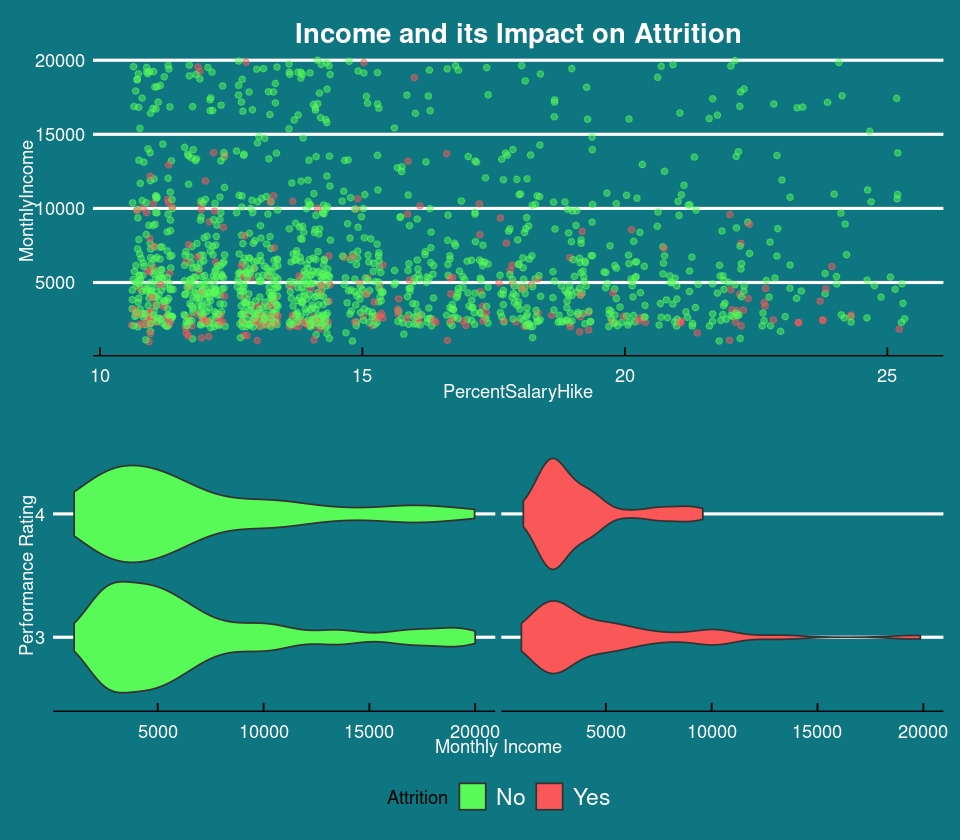

In [287]:
options(repr.plot.width=8, repr.plot.height=7) 

per.sal <- df %>% select(Attrition, PercentSalaryHike, MonthlyIncome) %>% 
ggplot(aes(x=PercentSalaryHike, y=MonthlyIncome)) + geom_jitter(aes(col=Attrition), alpha=0.5) + 
theme_economist() + theme(legend.position="none") + scale_color_manual(values=c("#58FA58", "#FA5858")) + 
labs(title="Income and its Impact on Attrition") + theme(plot.title=element_text(hjust=0.5, color="white"), plot.background=element_rect(fill="#0D7680"),
                                                        axis.text.x=element_text(colour="white"), axis.text.y=element_text(colour="white"),
                                                        axis.title=element_text(colour="white"))

perf.inc <- df %>% select(PerformanceRating, MonthlyIncome, Attrition) %>% group_by(factor(PerformanceRating), Attrition) %>% 
ggplot(aes(x=factor(PerformanceRating), y=MonthlyIncome, fill=Attrition)) + geom_violin() + coord_flip() + facet_wrap(~Attrition) + 
scale_fill_manual(values=c("#58FA58", "#FA5858")) + theme_economist() + 
theme(legend.position="bottom", strip.background = element_blank(), strip.text.x = element_blank(), 
     plot.title=element_text(hjust=0.5, color="white"), plot.background=element_rect(fill="#0D7680"),
                                                        axis.text.x=element_text(colour="white"), axis.text.y=element_text(colour="white"),
                                                        axis.title=element_text(colour="white"), 
     legend.text=element_text(color="white")) + 
labs(x="Performance Rating",y="Monthly Income") 


plot_grid(per.sal, perf.inc, nrow=2)

Claramente la mayor parte de casos de "Attrition” se dan en trabajadores con sueldos bajos. Es destacable que gran parte de los casos ocurren en trabajadores con un gran rendimiento pero sueldos bajos. 

<h3><b>Average and Percent Difference of Daily Rates:</b> </h3>
<a id="pct_difference"></a>

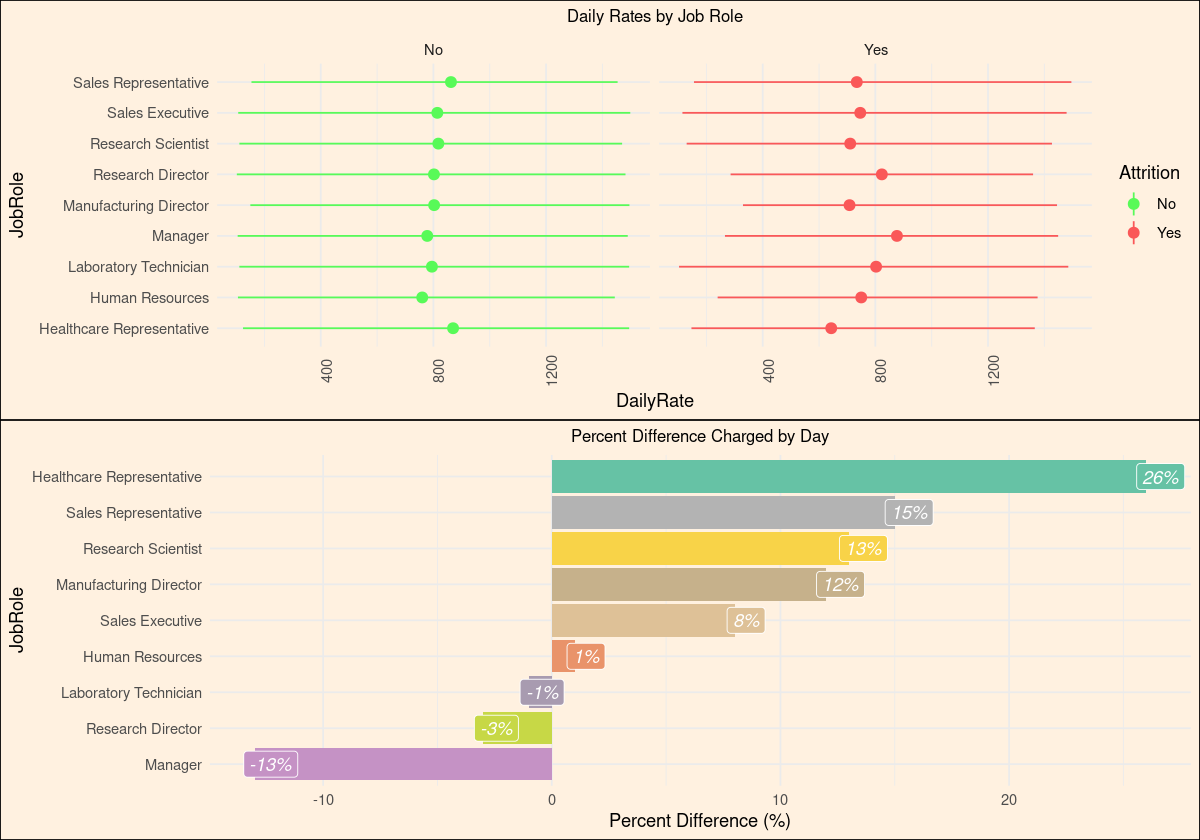

In [288]:
# daily rates by JobRole
options(repr.plot.width=10, repr.plot.height=7) 

daily_r <- df %>% select(JobRole, Attrition, DailyRate) %>% group_by(Attrition, JobRole) %>%
ggplot(aes(x=JobRole, y=DailyRate, color=Attrition)) + facet_wrap(~Attrition) + coord_flip() + theme_minimal() + 
theme(axis.text.x = element_text(angle = 90), plot.title=element_text(hjust=0.5, size=10), plot.background=element_rect(fill="#FFF1E0")) + 
stat_summary(fun.y=mean, fun.ymin = min, fun.ymax = max) + scale_color_manual(values=c("#58FA58", "#FA5858")) + 
labs(title="Daily Rates by Job Role")


# What's the difference between in Dailyrates by attrition and jobrole status.
attrition_daily <- df %>% select(JobRole, Attrition, DailyRate) %>% group_by(JobRole) %>% filter(Attrition == "Yes") %>% 
summarize(avg_attrition=mean(DailyRate), .groups = 'drop')


noattrition_daily <- df %>% select(JobRole, Attrition, DailyRate) %>% group_by(JobRole) %>% filter(Attrition == "No") %>% 
summarize(avg_noattrition=mean(DailyRate), .groups = 'drop')

# (No Attrition daily - Attrition Daily) / No Attrition Daily
colors <- c("#316D15C", "#16D12C", "#B2D116", "#FEBE5D", "#FE9F5D", "#F86E2E", "#F8532E", "#FA451D", "#FA1D1D")

combined_df <- merge(attrition_daily, noattrition_daily)
colourCount = length(unique(combined_df$JobRole))

percent_diff <- combined_df %>% mutate(pct_diff=round(((avg_noattrition - avg_attrition)/avg_noattrition),2) * 100) %>%
ggplot(aes(x=reorder(JobRole,pct_diff), y=pct_diff, fill=JobRole)) + geom_bar(stat="identity") + coord_flip() + theme_minimal() +
scale_fill_manual(values = colorRampPalette(brewer.pal(9, "Set2"))(colourCount)) + 
theme(plot.title=element_text(hjust=0.5, size=10), plot.background=element_rect(fill="#FFF1E0"), legend.position="none") + 
labs(x="JobRole", y="Percent Difference (%)", title="Percent Difference Charged by Day") + 
geom_label(aes(label=paste0(pct_diff, "%")), colour = "white", fontface = "italic", hjust=0.2)

plot_grid(daily_r, percent_diff, nrow=2)

<h3><b>Level of Attrition by Overtime Status:</b> </h3>
<a id="overtime_attrition"></a>

In [289]:
df %>% select(OverTime, Attrition) %>% filter(Attrition == "Yes") %>% group_by(Attrition, OverTime) %>%
summarize(n=n(), .groups = 'drop') %>% mutate(pct=round(prop.table(n),2) * 100)

Attrition OverTime n   pct
1 Yes       No       110 46 
2 Yes       Yes      127 54

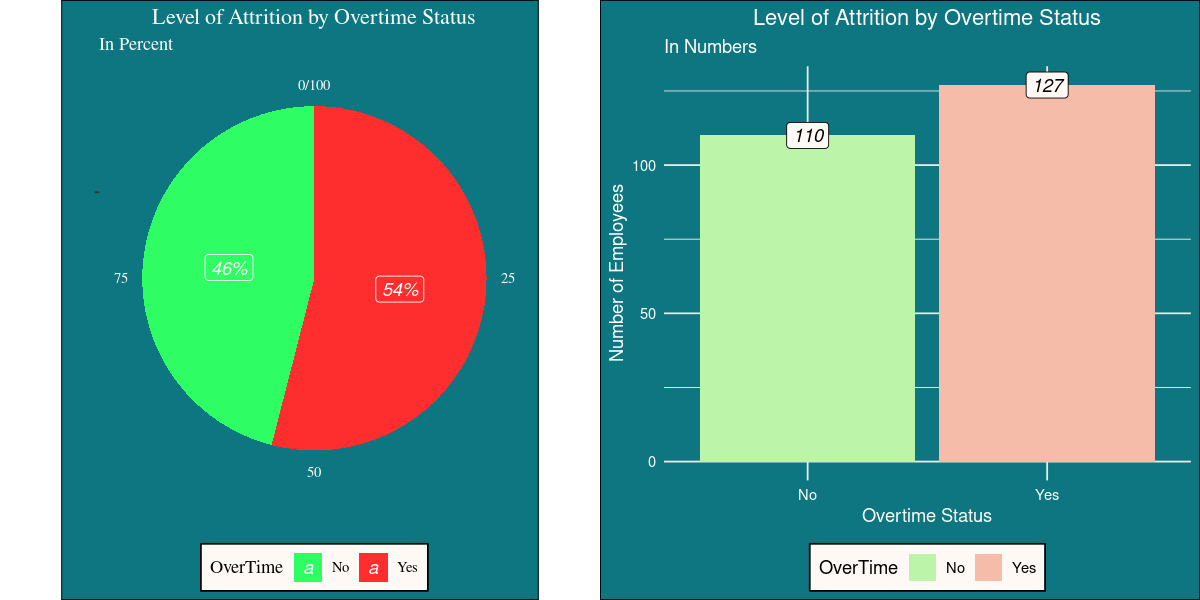

In [290]:
options(repr.plot.width=10, repr.plot.height=5) 


overtime_percent <- df %>% select(OverTime, Attrition) %>% filter(Attrition == "Yes") %>% group_by(Attrition, OverTime) %>%
summarize(n=n(), .groups = 'drop') %>% mutate(pct=round(prop.table(n),2) * 100) %>% 
ggplot(aes(x="", y=pct, fill=OverTime)) + 
geom_bar(width = 1, stat = "identity") + coord_polar("y", start=0) +
theme_tufte() + scale_fill_manual(values=c("#2EFE64", "#FE2E2E")) + 
geom_label(aes(label = paste0(pct, "%")), position = position_stack(vjust = 0.5), colour = "white",  fontface = "italic")+
theme(legend.position="bottom", strip.background = element_blank(), strip.text.x = element_blank(), 
     plot.title=element_text(hjust=0.5, color="white"), plot.subtitle=element_text(color="white"), plot.background=element_rect(fill="#0D7680"),
                                                        axis.text.x=element_text(colour="white"), axis.text.y=element_text(colour="white"),
                                                        axis.title=element_text(colour="white"), 
      legend.background = element_rect(fill="#FFF9F5",
                                       size=0.5, linetype="solid", colour ="black")) + 
labs(title="Level of Attrition by Overtime Status", subtitle="In Percent", x="", y="") 


overtime_number <- df %>% select(OverTime, Attrition) %>% filter(Attrition == "Yes") %>% group_by(Attrition, OverTime) %>%
summarize(n=n(), .groups = 'drop') %>% mutate(pct=round(prop.table(n),2) * 100) %>% 
ggplot(aes(x=OverTime, y=n, fill=OverTime)) + geom_bar(stat="identity") + scale_fill_manual(values=c("#BCF5A9", "#F5BCA9")) + 
geom_label(aes(label=paste0(n)), fill="#FFF9F5", colour = "black", fontface = "italic") + 
labs(title="Level of Attrition by Overtime Status", subtitle="In Numbers", x="Overtime Status", y="Number of Employees") + theme_minimal() + 
theme(legend.position="bottom", strip.background = element_blank(), strip.text.x = element_blank(), 
     plot.title=element_text(hjust=0.5, color="white"), plot.subtitle=element_text(color="white"), plot.background=element_rect(fill="#0D7680"),
                                                        axis.text.x=element_text(colour="white"), axis.text.y=element_text(colour="white"),
                                                        axis.title=element_text(colour="white"), 
     legend.background = element_rect(fill="#FFF9F5",
                                  size=0.5, linetype="solid", 
                                  colour ="black")) 





plot_grid(overtime_percent, overtime_number)

Gran parte de los que dejan la empresa resulta que hacen horas extras, así que la causa principal podria ser la relación de horas de trabajo total, con horas extra, y el sueldo que están cobrando.

<h2> Working Environment </h2>

<h3><b> Number of Employees by Job Role </b></h3>
<a id="number_jobrole"></a>

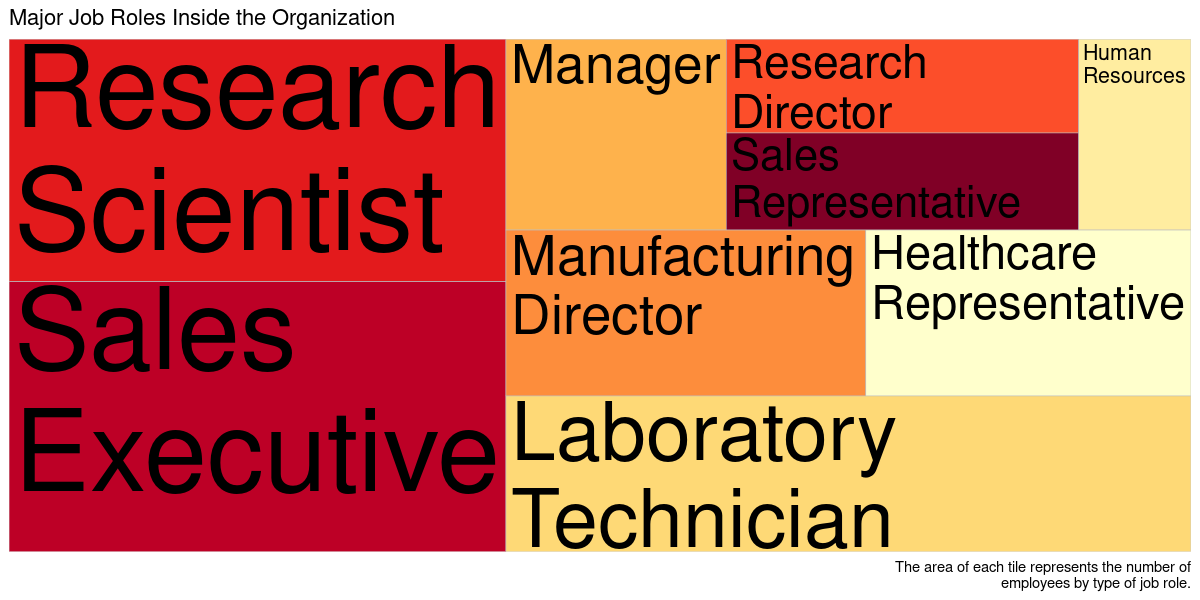

In [291]:
# Create a TreeMap with the number of Employees by JobRole
library(tree)
role.amount <- df %>% select(JobRole) %>% group_by(JobRole) %>% summarize(amount=n(), .groups = 'drop') %>%
ggplot(aes(area=amount, fill=JobRole, label=JobRole)) +  geom_treemap() +
  geom_treemap_text(grow = T, reflow = T, colour = "black") +
  scale_fill_brewer(palette = "YlOrRd") +
  theme(legend.position = "none") +
  labs(
    title = "Major Job Roles Inside the Organization",
    caption = "The area of each tile represents the number of
employees by type of job role.",
    fill = "JobRole"
  )

role.amount

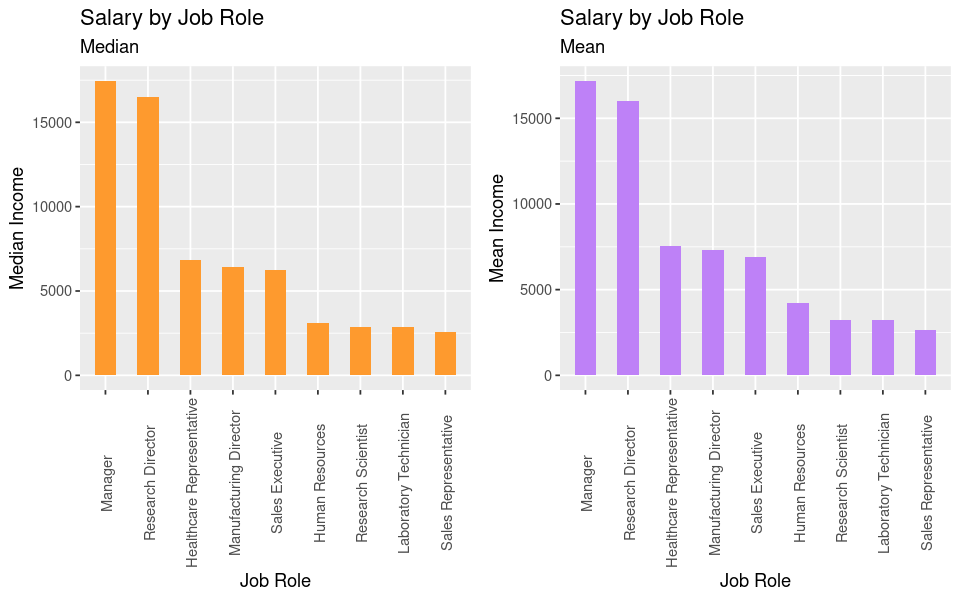

In [292]:
# Median Salary by JobRole 
# Highest percentage of attrition by JobRole
options(repr.plot.width=8, repr.plot.height=5) 

# Median Salary
job.sal <- df %>% select(JobRole, MonthlyIncome) %>% group_by(JobRole) %>% summarize(med=median(MonthlyIncome), avg=mean(MonthlyIncome), .groups = 'drop')


p1 <- ggplot(job.sal, aes(x=reorder(JobRole,-med), y=med)) +  geom_bar(stat="identity", width=.5, fill="#FE9A2E") + 
  labs(title="Salary by Job Role", 
       subtitle="Median",
      x="Job Role",
      y="Median Income") + 
  theme(axis.text.x = element_text(angle=90, vjust=0.6))


p2 <- ggplot(job.sal, aes(x=reorder(JobRole,-avg), y=avg)) +  geom_bar(stat="identity", width=.5, fill="#BE81F7") + 
  labs(title="Salary by Job Role", 
       subtitle="Mean",
      x="Job Role",
      y="Mean Income") + 
  theme(axis.text.x = element_text(angle=90, vjust=0.6))


plot_grid(p1, p2, ncol=2)

<h3><b>Attrition by Job Role </b></h3>
<a id="attrition_role"></a>

98 98 


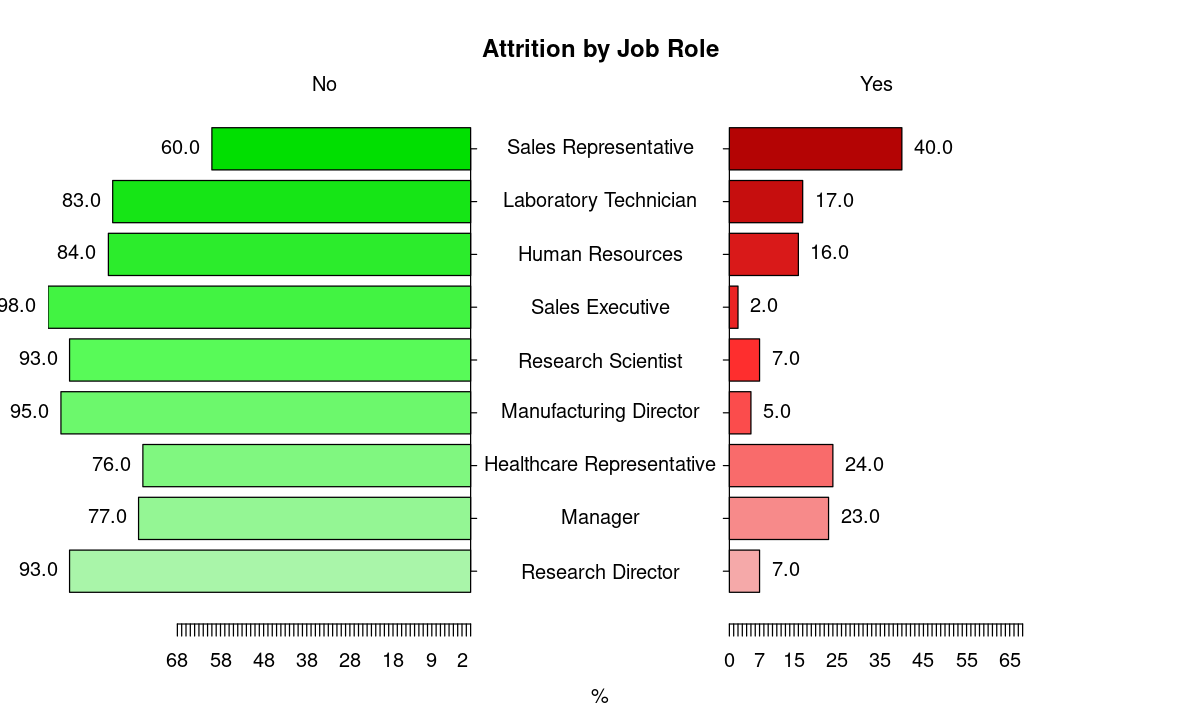

In [293]:
# The Funnel with the Attrition Rates by Job Role
options(repr.plot.width=10, repr.plot.height=6) 
attr.job <- df %>% select(JobRole, Attrition) %>% group_by(JobRole, Attrition) %>% summarize(amount=n(), .groups="drop_last") %>%
mutate(pct=round(prop.table(amount),2) * 100) %>% arrange(pct)

nofunc <- colorRampPalette(c("#A9F5A9", "#58FA58", "#01DF01"))
yesfunc <- colorRampPalette(c("#F5A9A9", "#FE2E2E", "#B40404"))

yes.attr <- attr.job %>% filter(Attrition == "Yes") %>% arrange(JobRole) 
no.attr <- attr.job %>% filter(Attrition == "No") %>% arrange(JobRole)

par(mar = pyramid.plot(no.attr$pct, yes.attr$pct, labels = unique(attr.job$JobRole),
                       top.labels=c("No","","Yes"), main = "Attrition by Job Role", 
                       gap=30, show.values = T, rxcol = yesfunc(9), lxcol = nofunc(9)))

De nuevo, se producen más casos de "Attrition" en aquellos departamentos y roles en los que los empleados tienen un menor sueldo.

<h3> <b>Current Managers and Average Satisfaction Score:</b> </h3>
<a id="current_managers"></a>

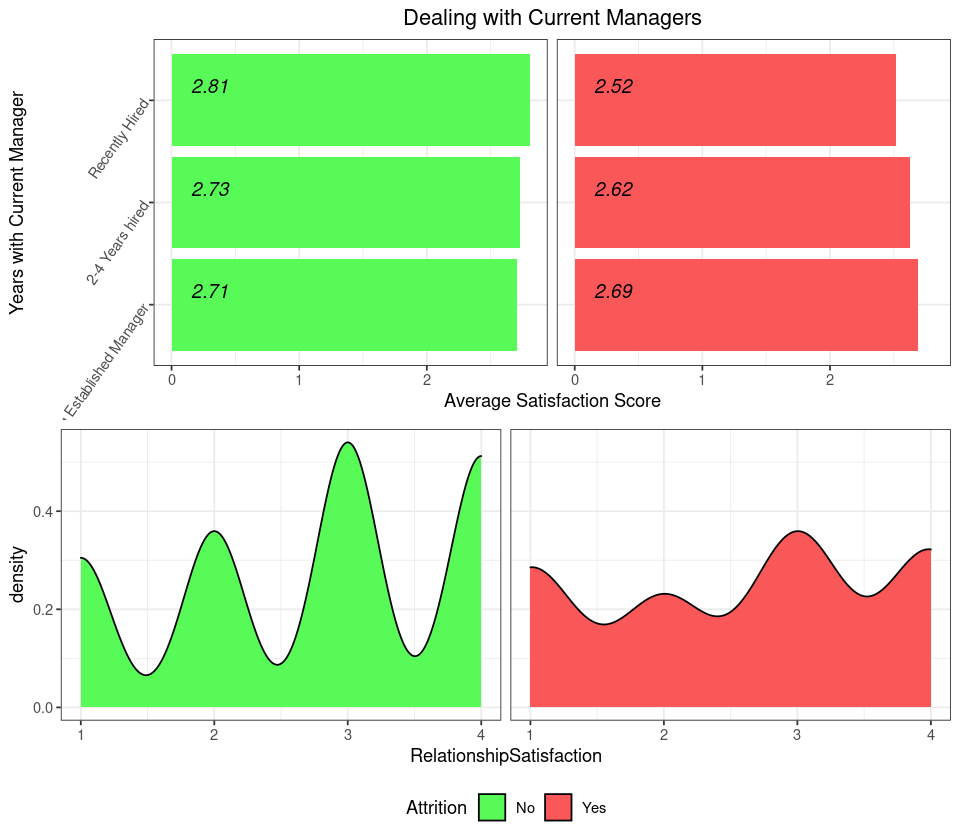

In [294]:
# Create a Categorical Value for Years with Current Manager
# Create a Categorical Value for RelationShip Satisfaction (We will use facet_wrap here)
# Then we will use income as our Y-Axis
options(repr.plot.width=8, repr.plot.height=7)

df$CatYearsManager <- ifelse(df$YearsWithCurrManager <= 1, "Recently Hired",
                            ifelse(df$YearsWithCurrManager > 1 & df$YearsWithCurrManager <= 4, "2-4 Years hired", "Long Established Manager"))


# Determine what is the Average Relationship Satisfaction with the Recently Hired Managers
rel.sat <- df %>% select(CatYearsManager, RelationshipSatisfaction, Attrition) %>% group_by(CatYearsManager, Attrition) %>%
summarize(avg.sat=mean(RelationshipSatisfaction), .groups = 'drop') %>%
ggplot(aes(x=fct_reorder(CatYearsManager,-avg.sat), y=avg.sat, fill=Attrition)) + geom_bar(stat="identity", position="dodge") + facet_wrap(~Attrition) + 
geom_text(aes(x=CatYearsManager, y=0, label= paste0(round(avg.sat,2))),
            hjust=-0.5, vjust=-0.5, size=4, 
            colour="black", fontface="italic",
         angle=360) + coord_flip() + theme_bw() + 
theme(legend.position="none", strip.background = element_blank(), strip.text.x = element_blank(), plot.title=element_text(hjust=0.5),
     axis.text.y = element_text(angle = 55)) + 
labs(x="Years with Current Manager",y="Average Satisfaction Score", title="Dealing with Current Managers") + 
scale_fill_manual(values=c("#58FA58", "#FA5858"))


# Create a Distribution by Attrition of the RelationShip Satisfaction
rel.dist <- df %>% select(RelationshipSatisfaction, Attrition) %>% group_by(Attrition) %>% 
ggplot(aes(x=RelationshipSatisfaction, y=..density..)) + geom_density(aes(fill=Attrition)) + facet_wrap(~Attrition) + 
theme_bw() + theme(legend.position="bottom", strip.background = element_blank(), strip.text.x = element_blank()) + 
scale_fill_manual(values=c("#58FA58", "#FA5858"))


plot_grid(rel.sat, rel.dist, nrow=2)

<h3><b>Average Environment Satisfaction:</b> </h3>
<a id="average_environment"></a>

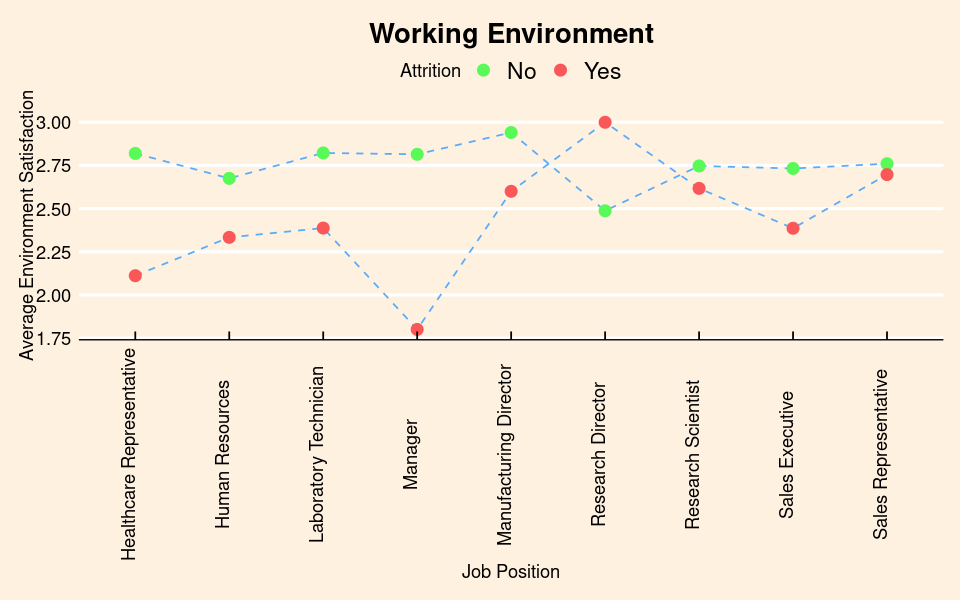

In [295]:
# Environment Satisfaction let's use the changes by JobRole
options(repr.plot.width=8, repr.plot.height=5)

env.attr <- df %>% select(EnvironmentSatisfaction, JobRole, Attrition) %>% group_by(JobRole, Attrition) %>%
summarize(avg.env=mean(EnvironmentSatisfaction), .groups = 'drop')

ggplot(env.attr, aes(x=JobRole, y=avg.env)) + geom_line(aes(group=Attrition), color="#58ACFA", linetype="dashed") + 
geom_point(aes(color=Attrition), size=3) +  theme_economist() + theme(plot.title=element_text(hjust=0.5), axis.text.x=element_text(angle=90),
                                                                     plot.background=element_rect(fill="#FFF1E0")) + 
labs(title="Working Environment", y="Average Environment Satisfaction", x="Job Position") + scale_color_manual(values=c("#58FA58", "#FA5858"))

<h2><b>An In-Depth Look into Attrition:</b></h2>
<h3><b>Digging into Attrition:</b> </h3>

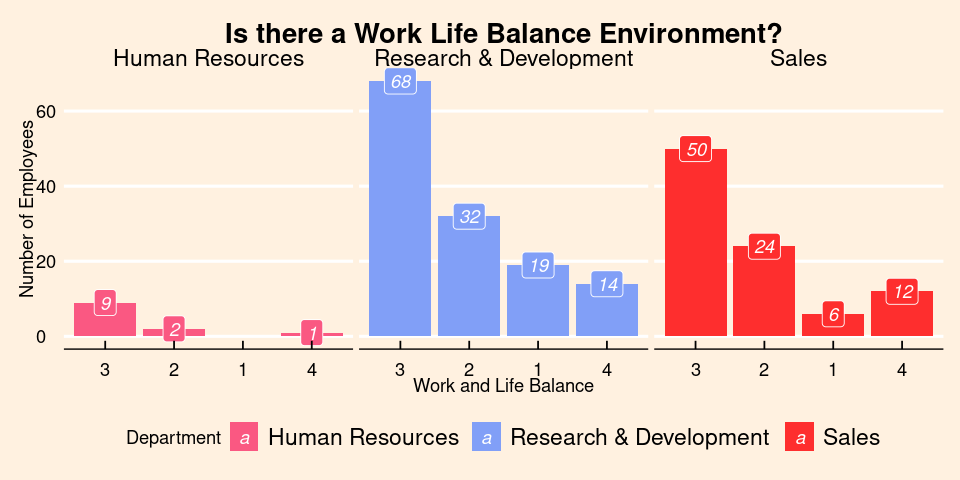

In [296]:
options(repr.plot.width=8, repr.plot.height=4)

attritions <- df %>% filter(Attrition == "Yes")

attritions$WorkLifeBalance <- as.factor(attritions$WorkLifeBalance)

by.department <- attritions %>% select(Department, WorkLifeBalance) %>% group_by(Department, WorkLifeBalance) %>%
summarize(count=n(), .groups = 'drop') %>% 
ggplot(aes(x=fct_reorder(WorkLifeBalance, -count), y=count, fill=Department)) + geom_bar(stat='identity') + facet_wrap(~Department) + 
theme_economist() + theme(legend.position="bottom", plot.title=element_text(hjust=0.5), plot.background=element_rect(fill="#FFF1E0")) + 
scale_fill_manual(values=c("#FA5882", "#819FF7", "#FE2E2E")) + 
geom_label(aes(label=count, fill = Department), colour = "white", fontface = "italic") + 
labs(title="Is there a Work Life Balance Environment?", x="Work and Life Balance", y="Number of Employees")

by.department

In [297]:
# Digging into Research and Development
r.d <- df %>% select(Department, WorkLifeBalance, Attrition) %>% 
filter(Department == "Research & Development" & WorkLifeBalance == 1 | WorkLifeBalance == 2) %>%
group_by(Attrition) %>% summarize(count=n(), .groups = 'drop') 

<h3><b>Other Factors that could Influence Attrition:</b> </h3>

In [298]:
# Determine the average distance of people who did not quit the organization.
# Then use this number as an anchor to create a column for the employees that quit.
# Let's see what number of employees that quit are above the average distance of employees that didn't quit.
options(repr.plot.width=8, repr.plot.height=4)

no.attritions <- df %>% filter(Attrition == "No")

# Average distance of employees that didn't quit.
med.distance <- no.attritions %>% select(DistanceFromHome) %>% summarize(med.dist=round(median(DistanceFromHome), 2), .groups = 'drop')

attritions$Median_Distance <- ifelse(attritions$DistanceFromHome < 7, "Below Average", "Above Average")

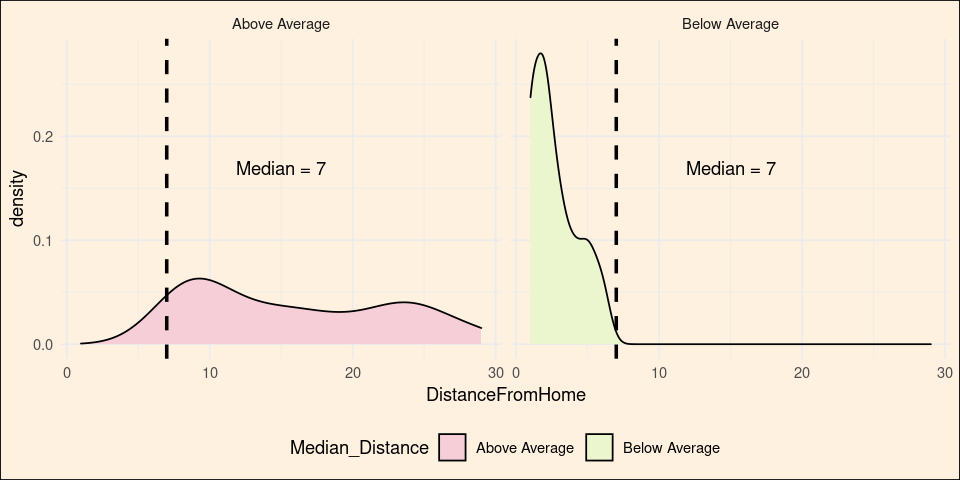

In [299]:
# Distribution of both Distance from Work Status
dist <- attritions %>% select(Median_Distance, DistanceFromHome) %>%
ggplot(aes(x=DistanceFromHome, fill=Median_Distance)) + geom_density() + facet_wrap(~Median_Distance) + theme_minimal() + 
scale_color_manual(values=c("#2EFE64", "#FA5858")) + scale_fill_manual(values=c("#F6CED8", "#ECF6CE")) +
theme(legend.position="bottom", plot.background=element_rect(fill="#FFF1E0")) + 
geom_vline(aes(xintercept=7),
            color="black", linetype="dashed", size=1) + 
annotate("text", label = "Median = 7", x = 15, y = 0.17, color = "black")

dist

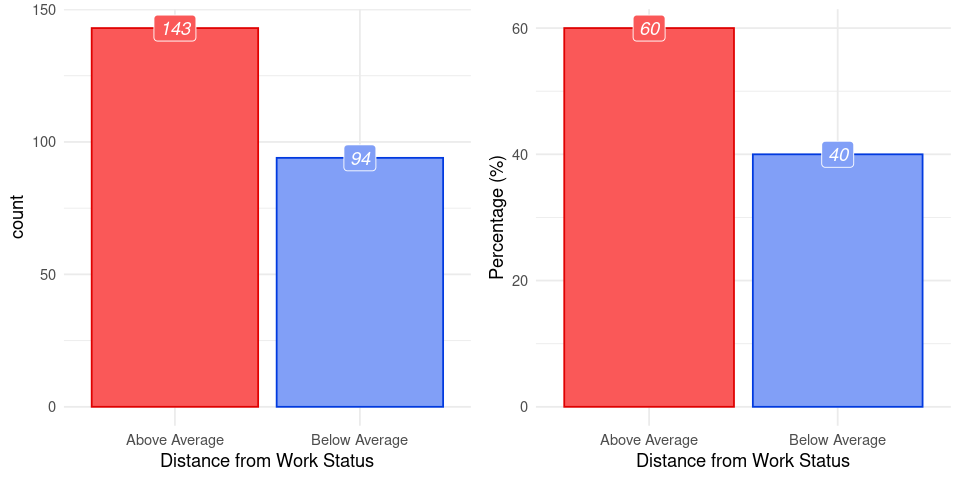

In [300]:
p1 <- attritions %>% select(Median_Distance) %>% group_by(Median_Distance) %>% summarize(count=n(), .groups = 'drop') %>%
ggplot(aes(x=Median_Distance, y=count, color=Median_Distance, fill=Median_Distance)) + geom_bar(stat="identity", position="dodge") +  theme_minimal() +
theme(legend.position="none") + scale_fill_manual(values=c("#FA5858", "#819FF7")) + 
geom_label(aes(label=count, fill = Median_Distance), colour = "white", fontface = "italic") +
scale_color_manual(values=c("#DF0101", "#013ADF")) + labs(x="Distance from Work Status")

p2 <- attritions %>% select(Median_Distance) %>% group_by(Median_Distance) %>% summarize(count=n(), .groups = 'drop') %>%
mutate(pct=round(prop.table(count),2) * 100) %>% 
ggplot(aes(x=Median_Distance, y=pct, color=Median_Distance, fill=Median_Distance)) + geom_bar(stat="identity") + theme_minimal() +  
theme(legend.position="none") + 
geom_label(aes(label=pct, fill = Median_Distance), colour = "white", fontface = "italic")  + scale_fill_manual(values=c("#FA5858", "#819FF7")) +
scale_color_manual(values=c("#DF0101", "#013ADF")) + labs(x="Distance from Work Status", y="Percentage (%)")

plot_grid(p1, p2, ncol=2)

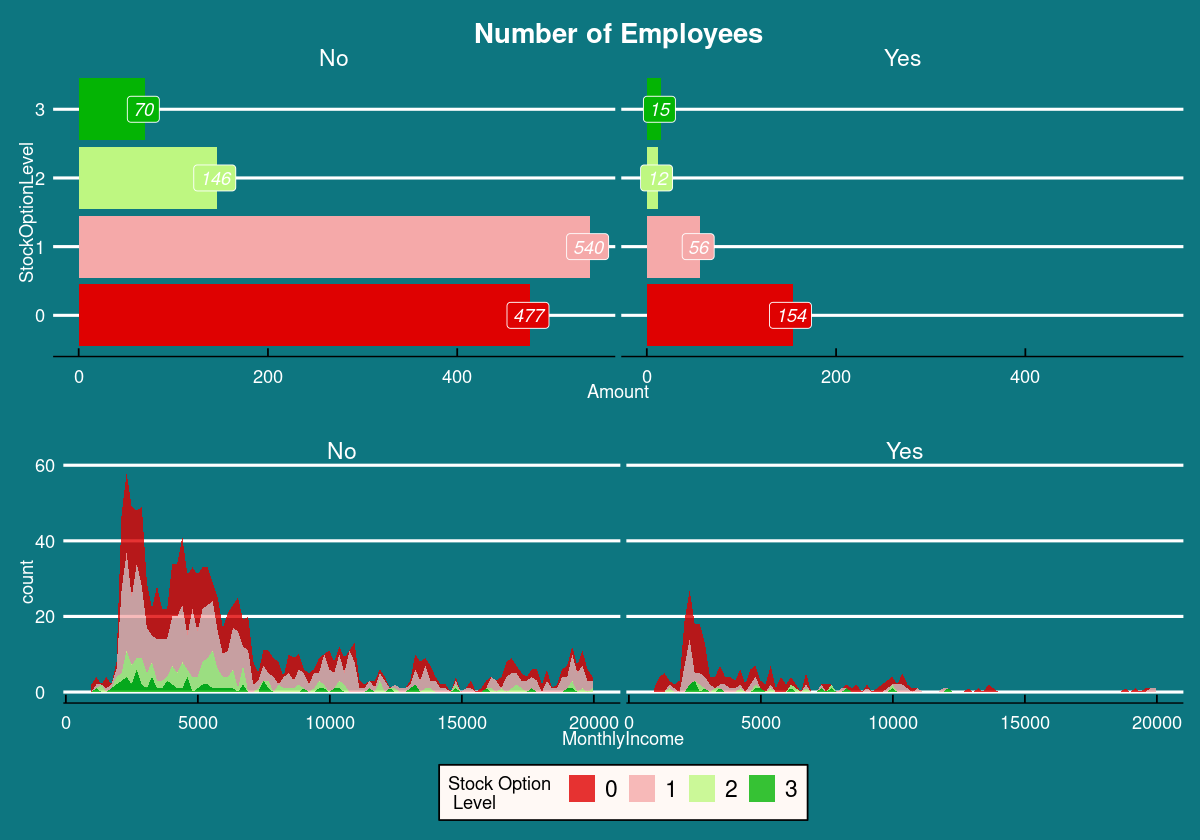

In [301]:
# Let's see what the Average MonthlyIncome is for those who have stockoptionlevels and for those who don't.
# First let's see how many employees have Stockoption levels.
options(repr.plot.width=10, repr.plot.height=7)

stockoption <- df %>% select(StockOptionLevel, Attrition) %>% group_by(StockOptionLevel, Attrition) %>% summarize(n=n(), .groups = 'drop')  %>%
ggplot(aes(x=reorder(StockOptionLevel, -n), y=n, fill=factor(StockOptionLevel))) + geom_bar(stat="identity") + coord_flip() + 
facet_wrap(~Attrition) + theme_economist() + scale_fill_manual(values=c("#DF0101", "#F5A9A9", "#BEF781", "#04B404")) + 
guides(fill=guide_legend(title="Stock Option \n Level")) + 
theme(legend.position="none", plot.background=element_rect(fill="#0D7680"), plot.title=element_text(hjust=0.5, color="white"), 
     axis.text.x=element_text(colour="white"), axis.text.y=element_text(colour="white"),
                                                        axis.title=element_text(colour="white"),
     strip.text.x = element_text(color="white"), 
     legend.text=element_text(color="white"))  + 
geom_label(aes(label=n, fill = factor(StockOptionLevel)), colour = "white", fontface = "italic", hjust=0.55) + 
labs(title="Number of Employees", x="StockOptionLevel", y="Amount")

# Average income by StockOption using the geom_line()
income_stockoption <- df %>% select(StockOptionLevel, MonthlyIncome, Attrition) %>% group_by(StockOptionLevel, Attrition) %>%
ggplot(aes(x=MonthlyIncome)) + geom_area(aes(fill=factor(StockOptionLevel)), stat ="bin", bins=100, alpha=0.8) + facet_wrap(~Attrition) + 
theme_economist() +   scale_fill_manual(values=c("#DF0101", "#F5A9A9", "#BEF781", "#04B404")) + 
guides(fill=guide_legend(title="Stock Option \n Level")) + 
theme(legend.position="bottom", plot.background=element_rect(fill="#0D7680"), plot.title=element_text(hjust=0.5, color="white"), 
     axis.text.x=element_text(colour="white"), axis.text.y=element_text(colour="white"),
                                                        axis.title=element_text(colour="white"),
     strip.text.x = element_text(color="white"),
     legend.text=element_text(color="black"), 
     legend.background = element_rect(fill="#FFF9F5",
                                  size=0.5, linetype="solid", 
                                  colour ="black"))


plot_grid(stockoption, income_stockoption, nrow=2)

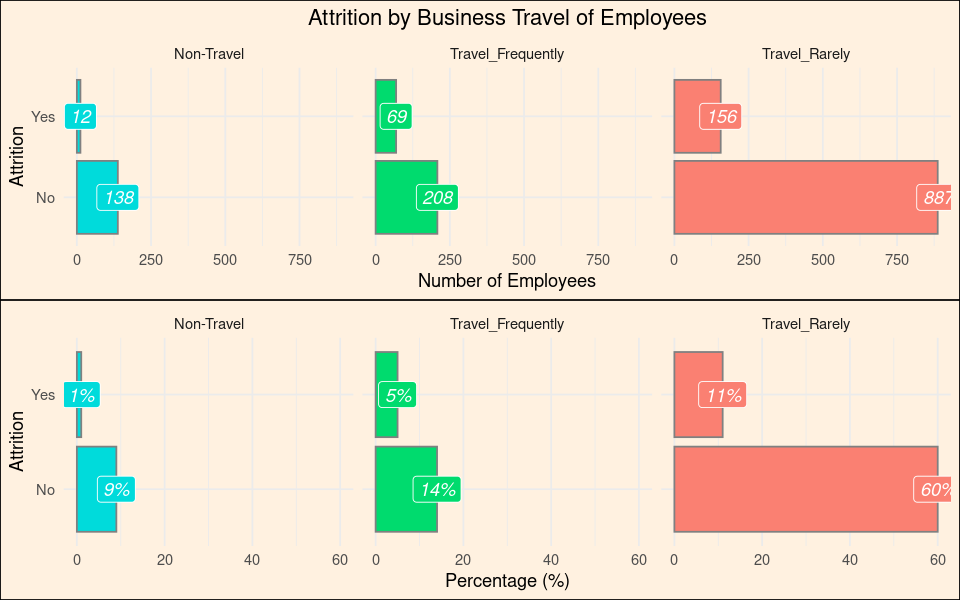

In [302]:
options(repr.plot.width=8, repr.plot.height=5)


# Percent Attrition by Work Life Balance
work_bal_cnt <- df %>% select(Attrition, BusinessTravel, WorkLifeBalance) %>% group_by(Attrition, BusinessTravel) %>% 
summarize(count=n(), .groups = 'drop') %>% mutate(pct=round(prop.table(count),2) * 100) %>%
ggplot(aes(x=Attrition, y=count, fill=BusinessTravel, color=Attrition)) + geom_bar(stat='identity') + facet_wrap(~BusinessTravel) + 
geom_label(aes(label=count, fill = BusinessTravel), colour = "white", fontface = "italic")  + theme_minimal() + theme(legend.position="none") + 
scale_fill_manual(values=c("#00dbdb", "#00db6e", "#fa8072")) +
scale_color_manual(values=c("#808080", "#808080")) + labs(title="Attrition by Business Travel of Employees", 
                                                          x="Attrition", y="Number of Employees") + coord_flip() + 
theme(plot.title=element_text(hjust=0.5), plot.background=element_rect(fill="#FFF1E0")) 
        


work_bal_pct <- df %>% select(Attrition, BusinessTravel, WorkLifeBalance) %>% group_by(Attrition, BusinessTravel) %>% 
summarize(count=n(), .groups = 'drop') %>% mutate(pct=round(prop.table(count),2) * 100) %>%
ggplot(aes(x=Attrition, y=pct, fill=BusinessTravel, color=Attrition)) + geom_bar(stat='identity') + facet_wrap(~BusinessTravel) + theme_minimal() +  
theme(legend.position="none") + 
geom_label(aes(label=paste0(pct, "%"), fill = BusinessTravel), colour = "white", fontface = "italic")  + 
scale_fill_manual(values=c("#00dbdb", "#00db6e", "#fa8072")) +
scale_color_manual(values=c("#808080", "#808080")) + labs(x="Attrition", y="Percentage (%)") + coord_flip() + 
theme(plot.background=element_rect(fill="#FFF1E0"))

plot_grid(work_bal_cnt, work_bal_pct, nrow=2)

In [303]:
# JobSatisfaction as integer again.
df$JobSatisfaction <- as.integer(df$JobSatisfaction)

<h2>Correlations and Bi-variate Analysis: </h2>
<h3>Correlation Matrix:  </h3>

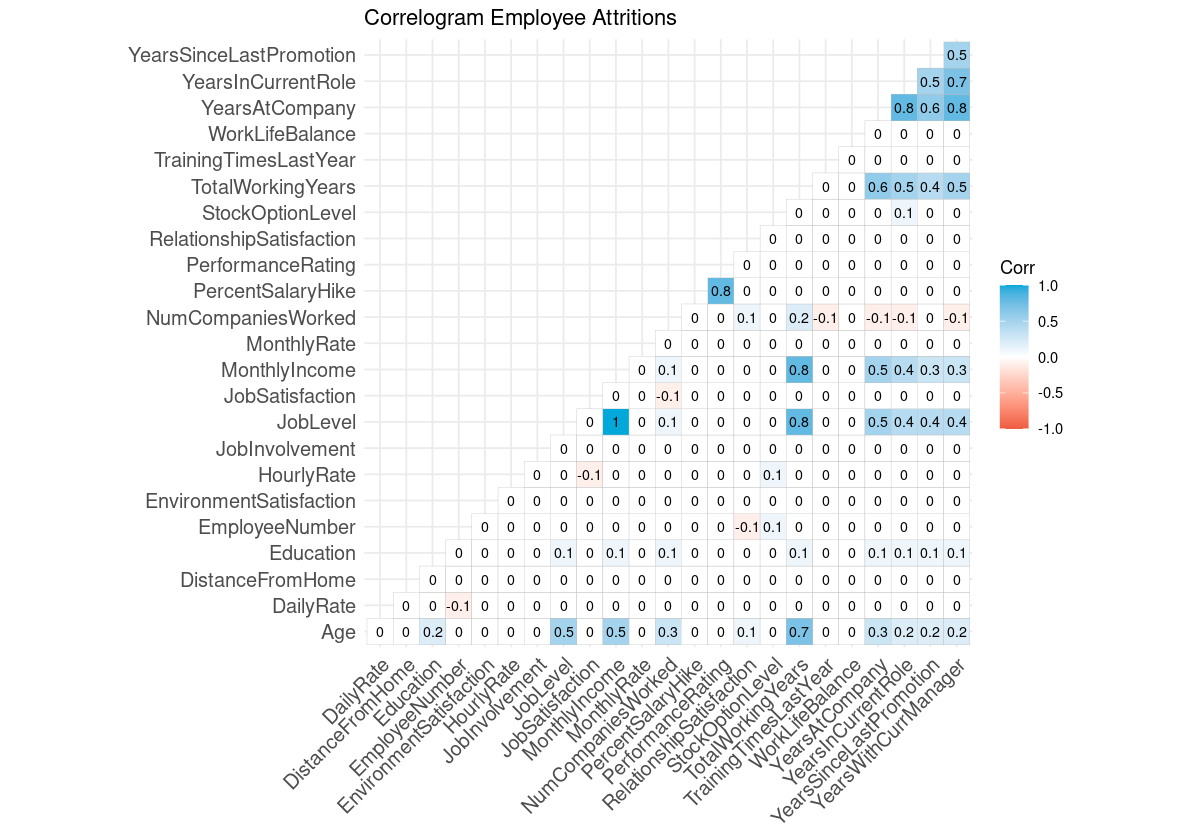

In [304]:
# # Let's have a better understanding about each feature through a correlation plot
options(repr.plot.width=10, repr.plot.height=7) 

nums <- select_if(df, is.numeric)

corr <- round(cor(nums), 1)

ggcorrplot(corr, 
           type = "lower", 
           lab = TRUE, 
           lab_size = 3, 
           method="square", 
           colors = c("tomato2", "white", "#01A9DB"), 
           title="Correlogram Employee Attritions", 
           ggtheme=theme_minimal())

Tenemos mucha correlación entre columnas, más tarde eliminamos aquellas que no aportan información y están demasiado correlacionadas. 

<h3> <b> Bi-Variate Analysis: </b> </h3>

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



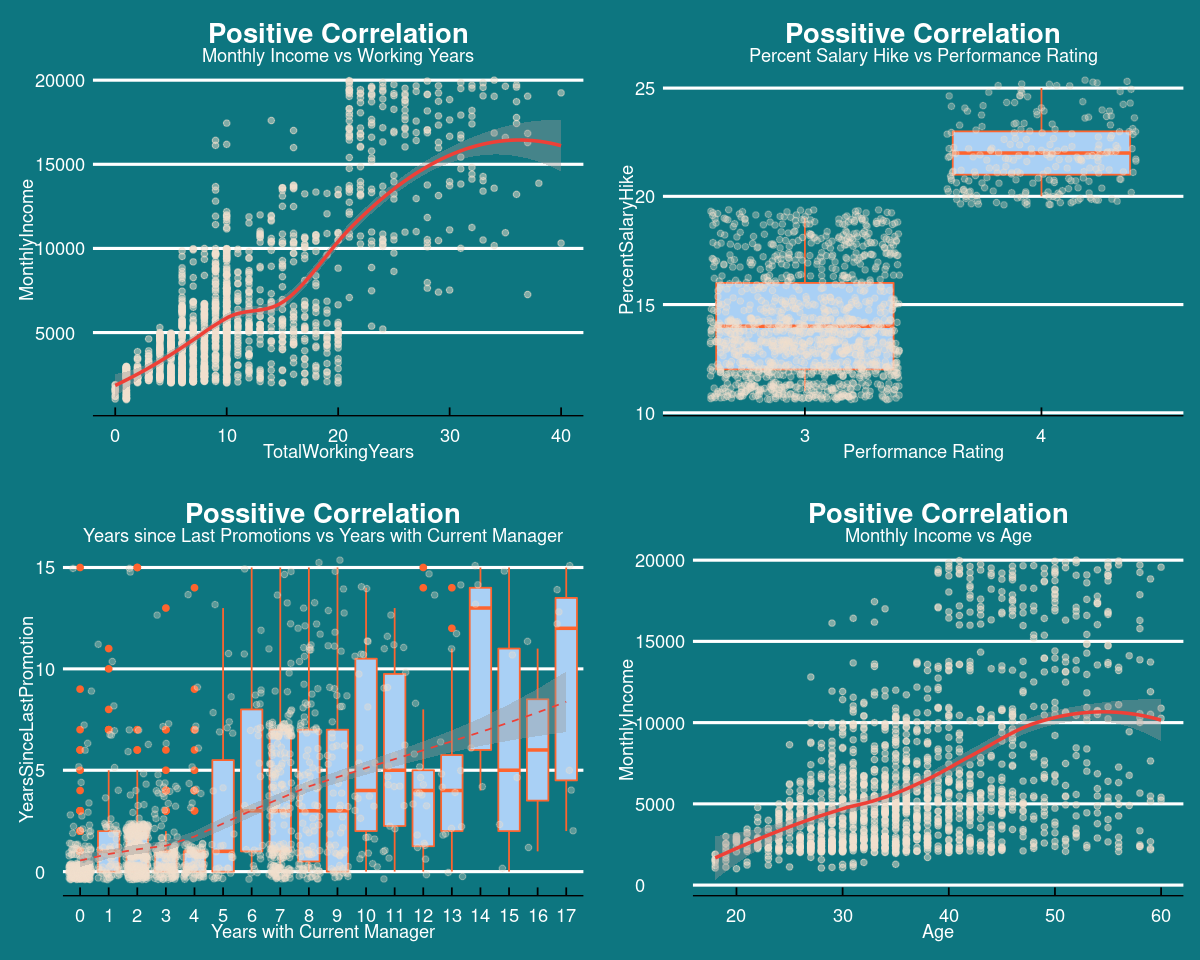

In [305]:
options(repr.plot.width=10, repr.plot.height=8) 

# Positive Correlations
p1 <- df %>% select(TotalWorkingYears, MonthlyIncome) %>%
ggplot(aes(x=TotalWorkingYears, y=MonthlyIncome)) + geom_point(colour = "#F2DFCE", alpha=1/2) + geom_smooth(method="loess",color="#EE4037") + 
theme_economist() + theme(legend.position="bottom", strip.background = element_blank(), strip.text.x = element_blank(), 
     plot.title=element_text(hjust=0.5, color="white"), plot.subtitle=element_text(hjust=0.5, color="white"), plot.background=element_rect(fill="#0D7680"),
                                                        axis.text.x=element_text(colour="white"), axis.text.y=element_text(colour="white"),
                                                        axis.title=element_text(colour="white")) + 
labs(title="Positive Correlation", subtitle="Monthly Income vs Working Years")

p2 <-  df %>% select(PerformanceRating, PercentSalaryHike) %>%
ggplot(aes(x=factor(PerformanceRating), y=PercentSalaryHike)) + geom_boxplot(colour = "#FE642E", fill="#A9D0F5") + 
geom_jitter(color="#F2DFCE",alpha=1/3)  + 
theme_economist() + theme(legend.position="bottom", strip.background = element_blank(), strip.text.x = element_blank(), 
     plot.title=element_text(hjust=0.5, color="white"), plot.subtitle=element_text(hjust=0.5, color="white"), plot.background=element_rect(fill="#0D7680"),
                                                        axis.text.x=element_text(colour="white"), axis.text.y=element_text(colour="white"),
                                                        axis.title=element_text(colour="white")) + 
labs(title="Possitive Correlation", subtitle="Percent Salary Hike vs Performance Rating", x="Performance Rating")

# Years with Current Manager, Years since Last Promotion
p3 <-  df %>% select(YearsWithCurrManager, YearsSinceLastPromotion) %>%
ggplot(aes(x=factor(YearsWithCurrManager), y=YearsSinceLastPromotion)) + geom_boxplot(colour = "#FE642E", fill="#A9D0F5") + 
geom_jitter(color="#F2DFCE",alpha=1/3) + geom_smooth(method='loess',aes(group=1),color='#EE4037',lty=2,size=.5) + 
theme_economist() + theme(legend.position="bottom", strip.background = element_blank(), strip.text.x = element_blank(), 
     plot.title=element_text(hjust=0.5, color="white"),plot.subtitle=element_text(hjust=0.5, color="white"), plot.background=element_rect(fill="#0D7680"),
                                                        axis.text.x=element_text(colour="white"), axis.text.y=element_text(colour="white"),
                                                        axis.title=element_text(colour="white")) + 
labs(title="Possitive Correlation", subtitle="Years since Last Promotions vs Years with Current Manager", x="Years with Current Manager")

# Age and Monthly Income
p4 <-  df %>% select(Age, MonthlyIncome) %>%
ggplot(aes(x=Age, y=MonthlyIncome)) + geom_point(colour = "#F2DFCE", alpha=1/2) + geom_smooth(method="loess", color="#EE4037") + 
theme_economist() + theme(legend.position="bottom", strip.background = element_blank(), strip.text.x = element_blank(), 
     plot.title=element_text(hjust=0.5, color="white"), plot.subtitle=element_text(hjust=0.5, color="white"), plot.background=element_rect(fill="#0D7680"),
                                                        axis.text.x=element_text(colour="white"), axis.text.y=element_text(colour="white"),
                                                        axis.title=element_text(colour="white")) + 
labs(title="Positive Correlation", subtitle="Monthly Income vs Age")

plot_grid(p1, p2, p3,p4, ncol=2, nrow=2)

Podemos ver que los años trabajando en la empresa y el rendimiento de los empleados sueles verse premiado por la empresa con salarios mayores, así que no parece que haya personas frustradas por ser una empresa en la que no puedas ascender con el tiempo.

---

El siguiente espacio recoge el trabajo de  
E.Nik,   
https://www.kaggle.com/esmaeil391/ibm-hr-analysis-with-90-3-acc-and-89-auc,

hemos dejado su trabajo ya que nos ha gustado y nos ha ayudado, aunque repite y llegamos a las mismas conclusiones que en el apartado anterior. 

Visualization of Attrition

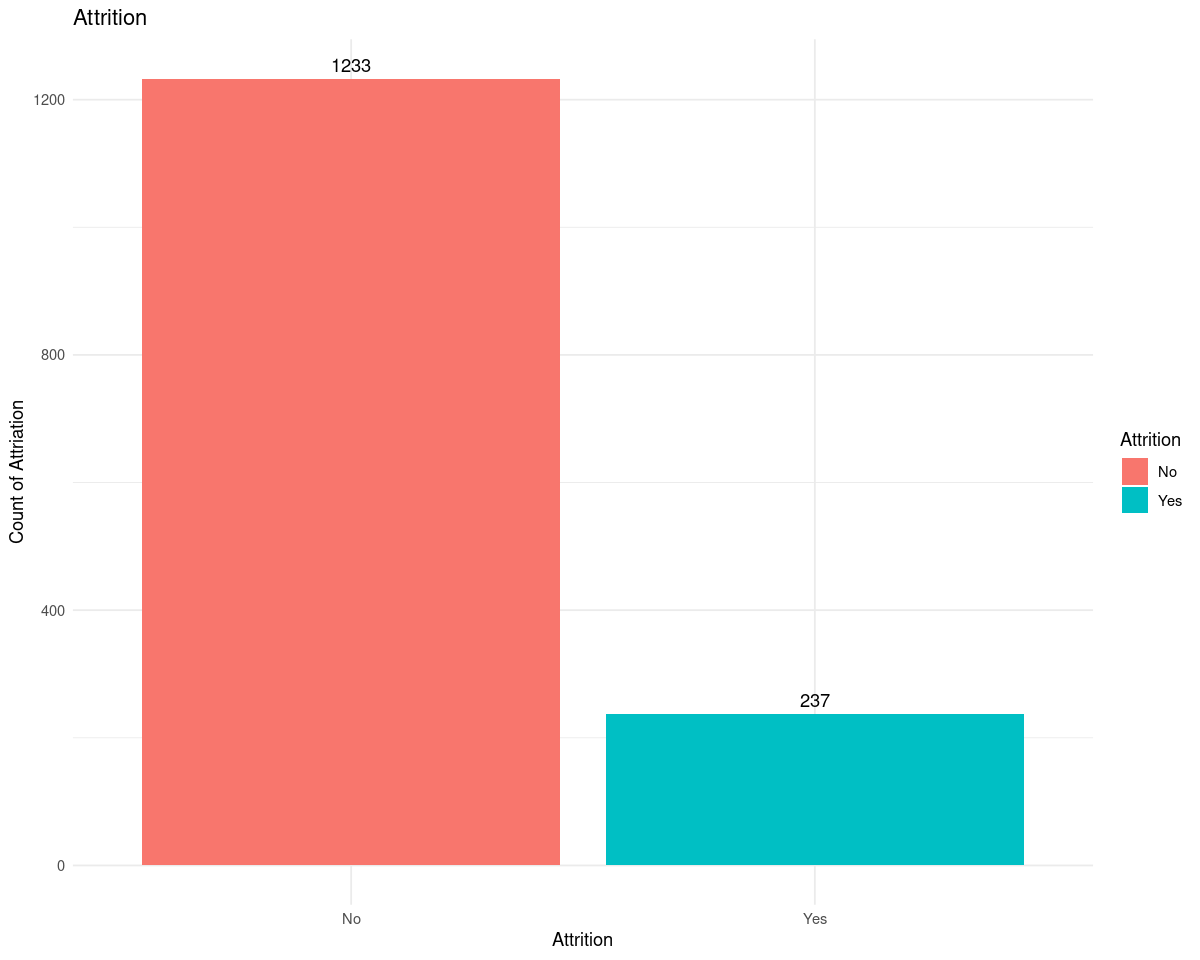

In [306]:
df %>%
        group_by(Attrition) %>%
        tally() %>%
        ggplot(aes(x = Attrition, y = n,fill=Attrition)) +
        geom_bar(stat = "identity") +
        theme_minimal()+
        labs(x="Attrition", y="Count of Attriation")+
        ggtitle("Attrition")+
        geom_text(aes(label = n), vjust = -0.5, position = position_dodge(0.9))

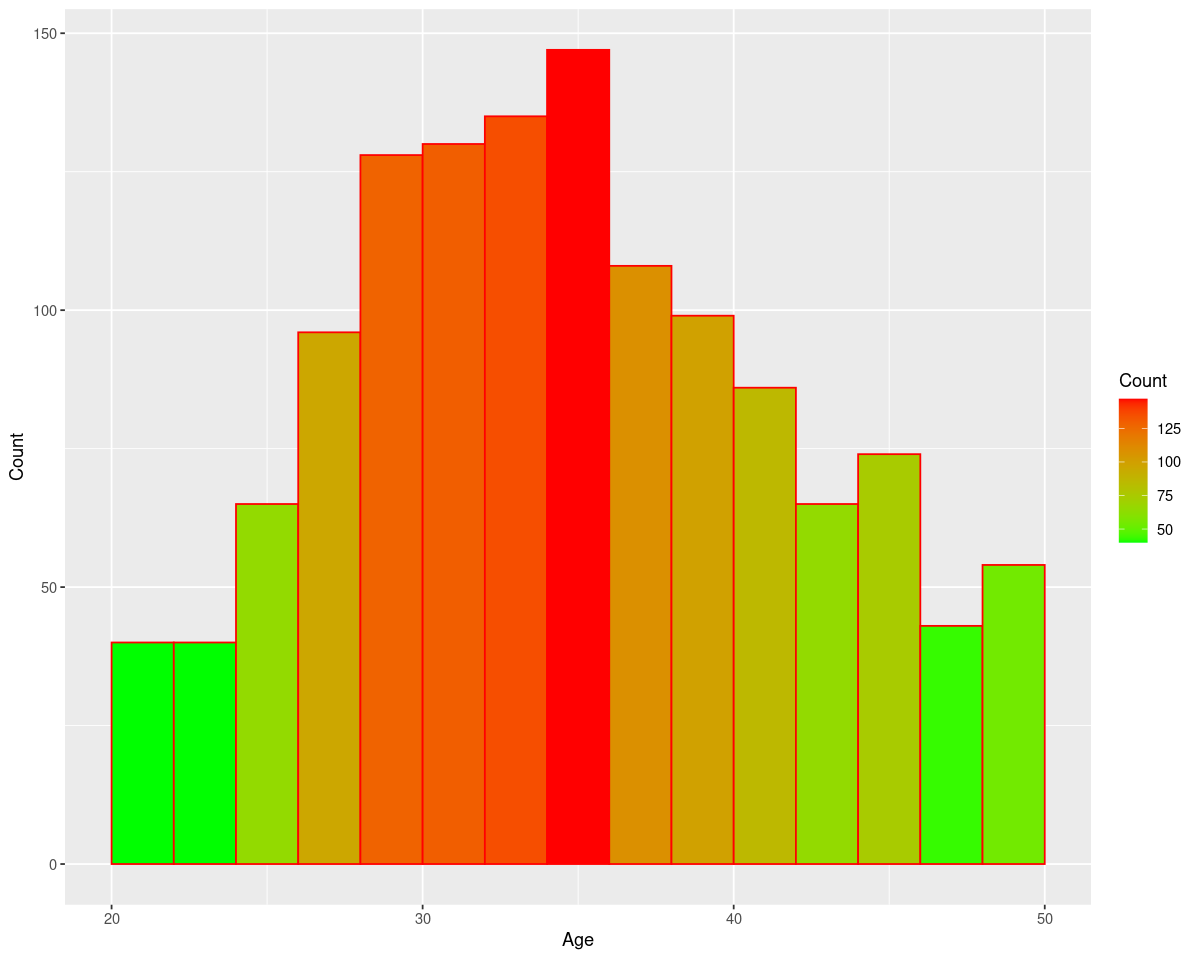

In [307]:
ggplot(data=df, aes(df$Age)) + 
        geom_histogram(breaks=seq(20, 50, by=2), 
                       col="red", 
                       aes(fill=..count..))+
        labs(x="Age", y="Count")+
        scale_fill_gradient("Count", low="green", high="red")

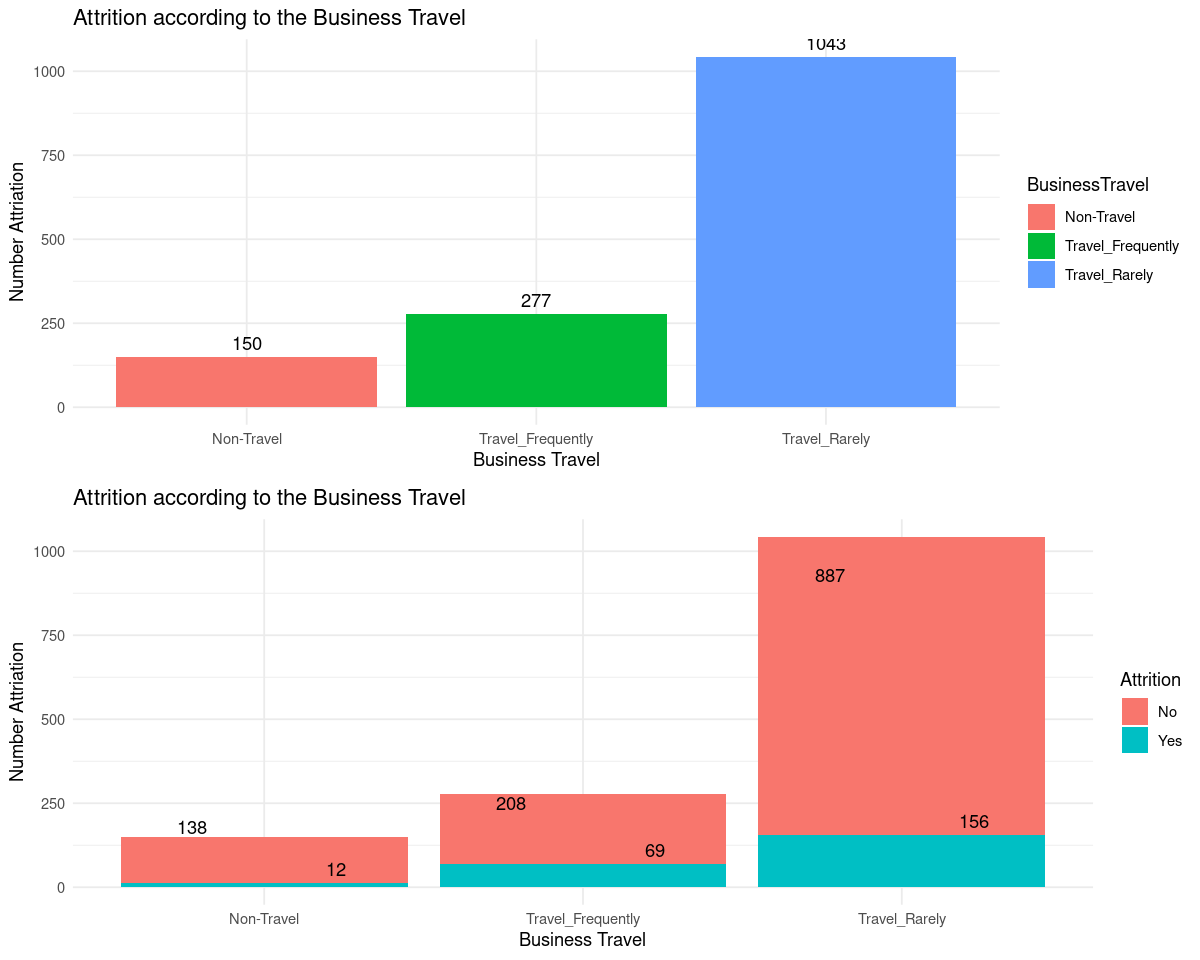

In [308]:
a1 <- df %>%
        group_by(BusinessTravel) %>%
        tally() %>%
        ggplot(aes(x = BusinessTravel, y = n,fill=BusinessTravel)) +
        geom_bar(stat = "identity") +
        theme_minimal()+
        labs(x="Business Travel", y="Number Attriation")+
        ggtitle("Attrition according to the Business Travel")+
        geom_text(aes(label = n), vjust = -0.5, position = position_dodge(0.9))

a2<- df %>%
        group_by(BusinessTravel, Attrition) %>%
        tally() %>%
        ggplot(aes(x = BusinessTravel, y = n,fill=Attrition)) +
        geom_bar(stat = "identity") +
        theme_minimal()+
        labs(x="Business Travel", y="Number Attriation")+
        ggtitle("Attrition according to the Business Travel")+
        geom_text(aes(label = n), vjust = -0.5, position = position_dodge(0.9))


grid.arrange(a1,a2)


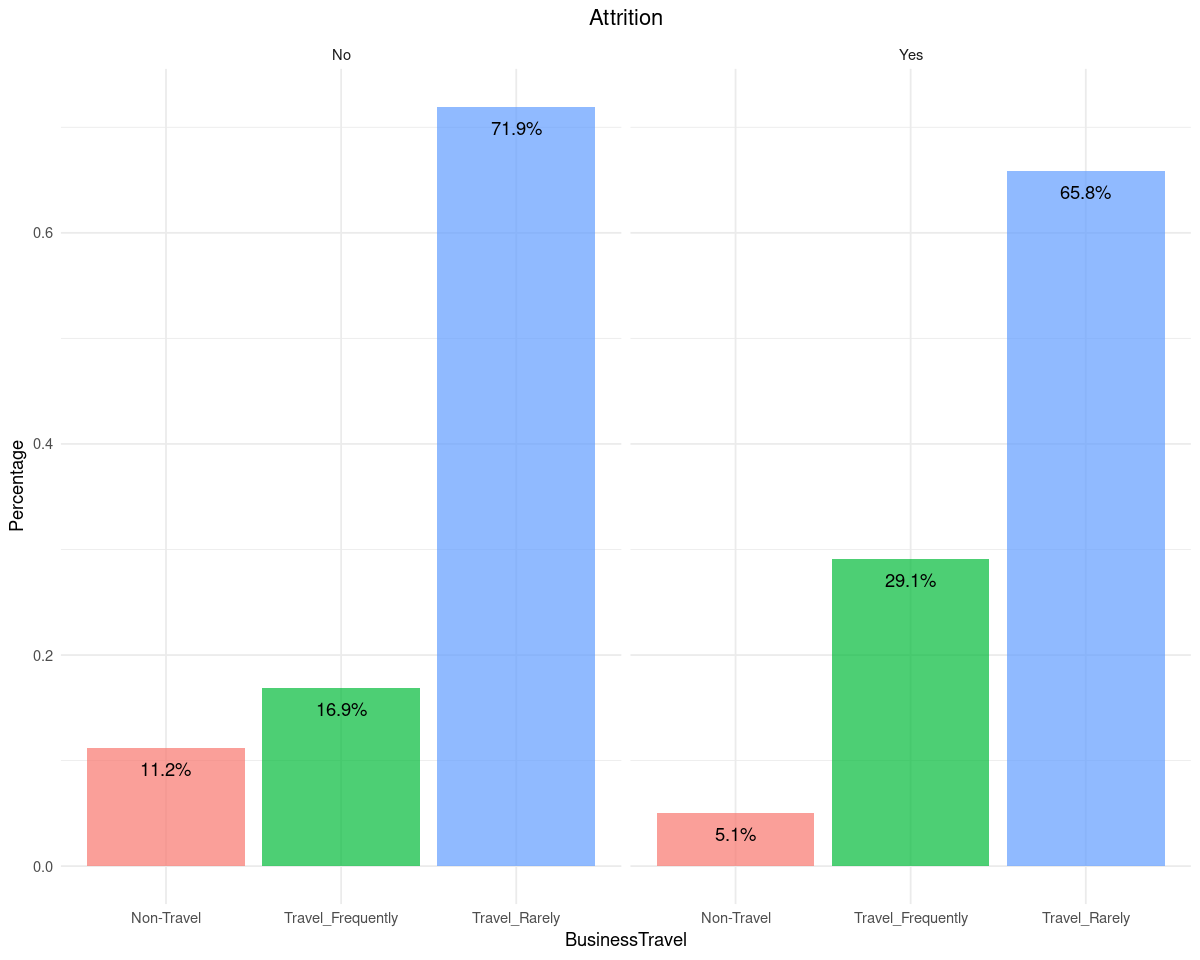

In [309]:
df %>%
        ggplot(aes(x = BusinessTravel, group = Attrition)) + 
        geom_bar(aes(y = ..prop.., fill = factor(..x..)), 
                 stat="count", 
                 alpha = 0.7) +
        geom_text(aes(label = scales::percent(..prop..), y = ..prop.. ), 
                  stat= "count", 
                  vjust = 2) +
        labs(y = "Percentage", fill= "business Travel") +
        facet_grid(~Attrition) +
        theme_minimal()+
        theme(legend.position = "none", plot.title = element_text(hjust = 0.5)) + 
        ggtitle("Attrition")

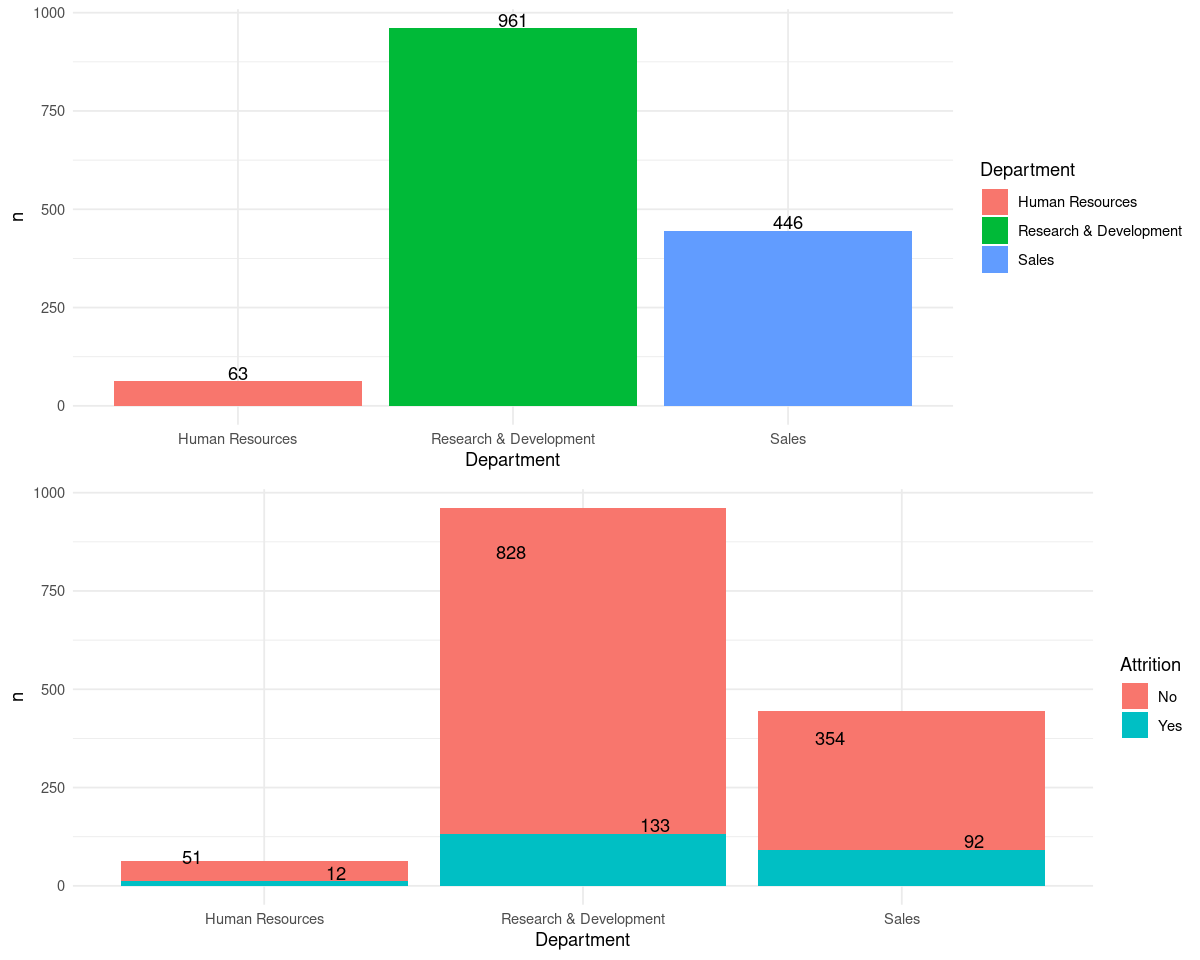

In [310]:
g1 <- df %>%
        group_by(Department) %>%
        tally() %>%
        ggplot(aes(x = Department, y = n,fill=Department)) +
        geom_bar(stat = "identity") +
        theme_minimal()+
        geom_text(aes(label = n), vjust = -0.1, position = position_dodge(0.9))

g2 <- df %>%
        group_by(Department, Attrition) %>%
        tally() %>%
        ggplot(aes(x = Department, y = n,fill=Attrition)) +
        geom_bar(stat = "identity") +
        theme_minimal()+
        geom_text(aes(label = n), vjust = -0.1, position = position_dodge(0.9))

grid.arrange(g1,g2)

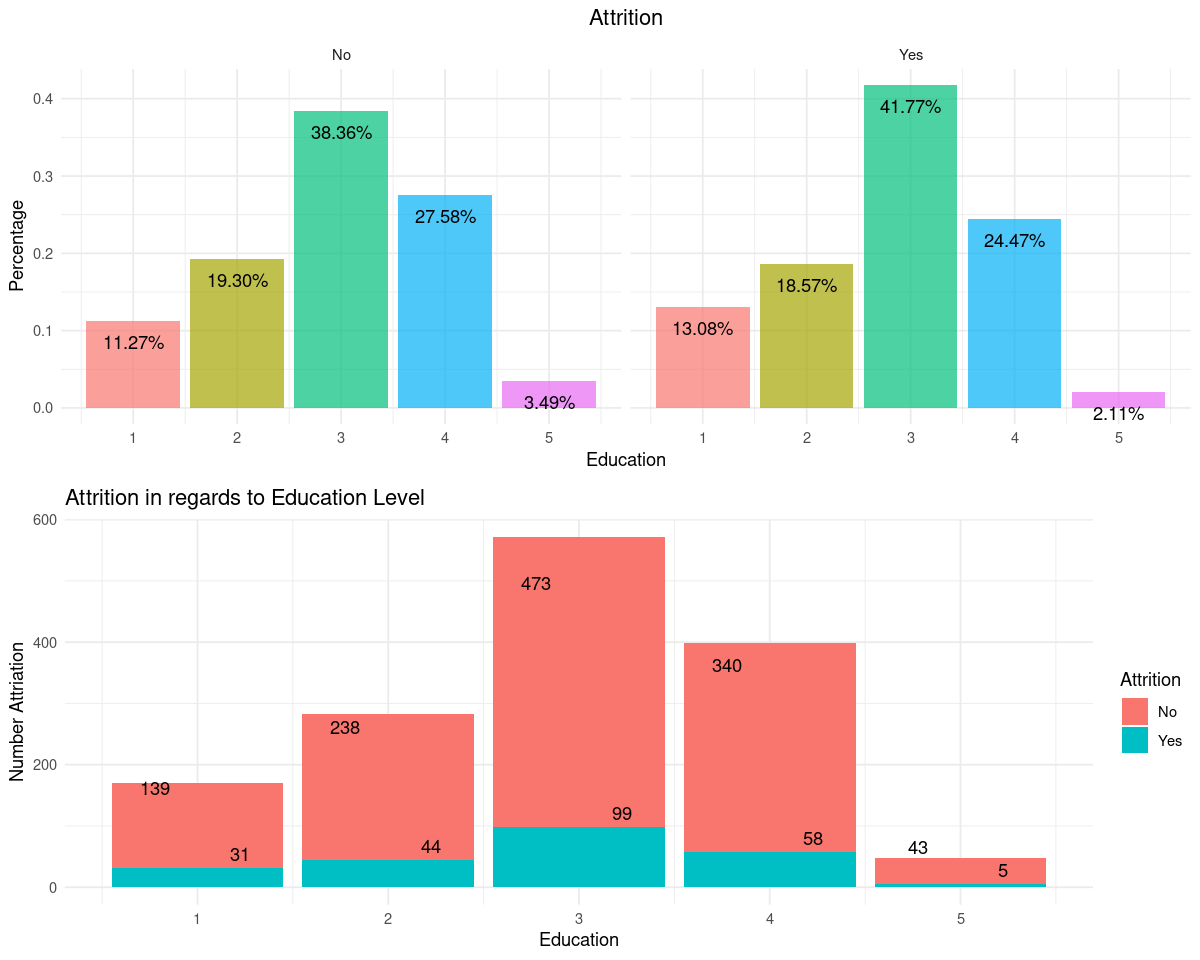

In [311]:
g1<- df %>%
        ggplot(aes(x = Education, group = Attrition)) + 
        geom_bar(aes(y = ..prop.., fill = factor(..x..)), 
                 stat="count", 
                 alpha = 0.7) +
        geom_text(aes(label = scales::percent(..prop..), y = ..prop.. ), 
                  stat= "count", 
                  vjust = 2) +
        labs(y = "Percentage", fill= "Education") +
        facet_grid(~Attrition) +
        theme_minimal()+
        theme(legend.position = "none", plot.title = element_text(hjust = 0.5)) + 
        ggtitle("Attrition")

g2<- df %>%
        group_by(Education, Attrition) %>%
        tally() %>%
        ggplot(aes(x = Education, y = n,fill=Attrition)) +
        geom_bar(stat = "identity") +
        theme_minimal()+
        geom_text(aes(label = n), vjust = -0.5, position = position_dodge(0.9))+
        labs(x="Education", y="Number Attriation")+
        ggtitle("Attrition in regards to Education Level")

grid.arrange(g1,g2)

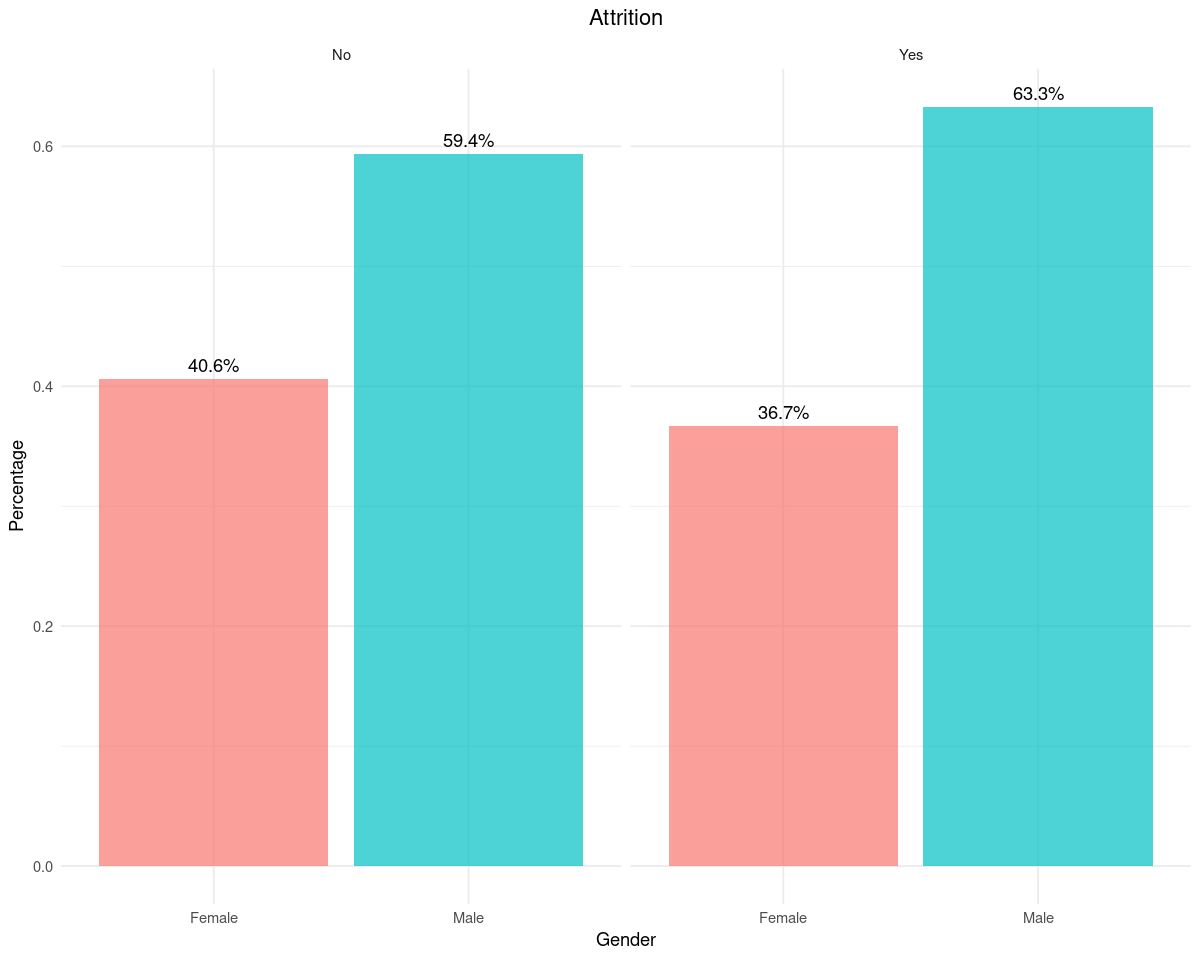

In [312]:
df %>%
        ggplot(aes(x = Gender, group = Attrition)) + 
        geom_bar(aes(y = ..prop.., fill = factor(..x..)), 
                 stat="count", 
                 alpha = 0.7) +
        geom_text(aes(label = scales::percent(..prop..), y = ..prop.. ), 
                  stat= "count", 
                  vjust = -.5) +
        labs(y = "Percentage", fill= "Gender") +
        facet_grid(~Attrition) +
        theme_minimal()+
        theme(legend.position = "none", plot.title = element_text(hjust = 0.5)) + 
        ggtitle("Attrition")

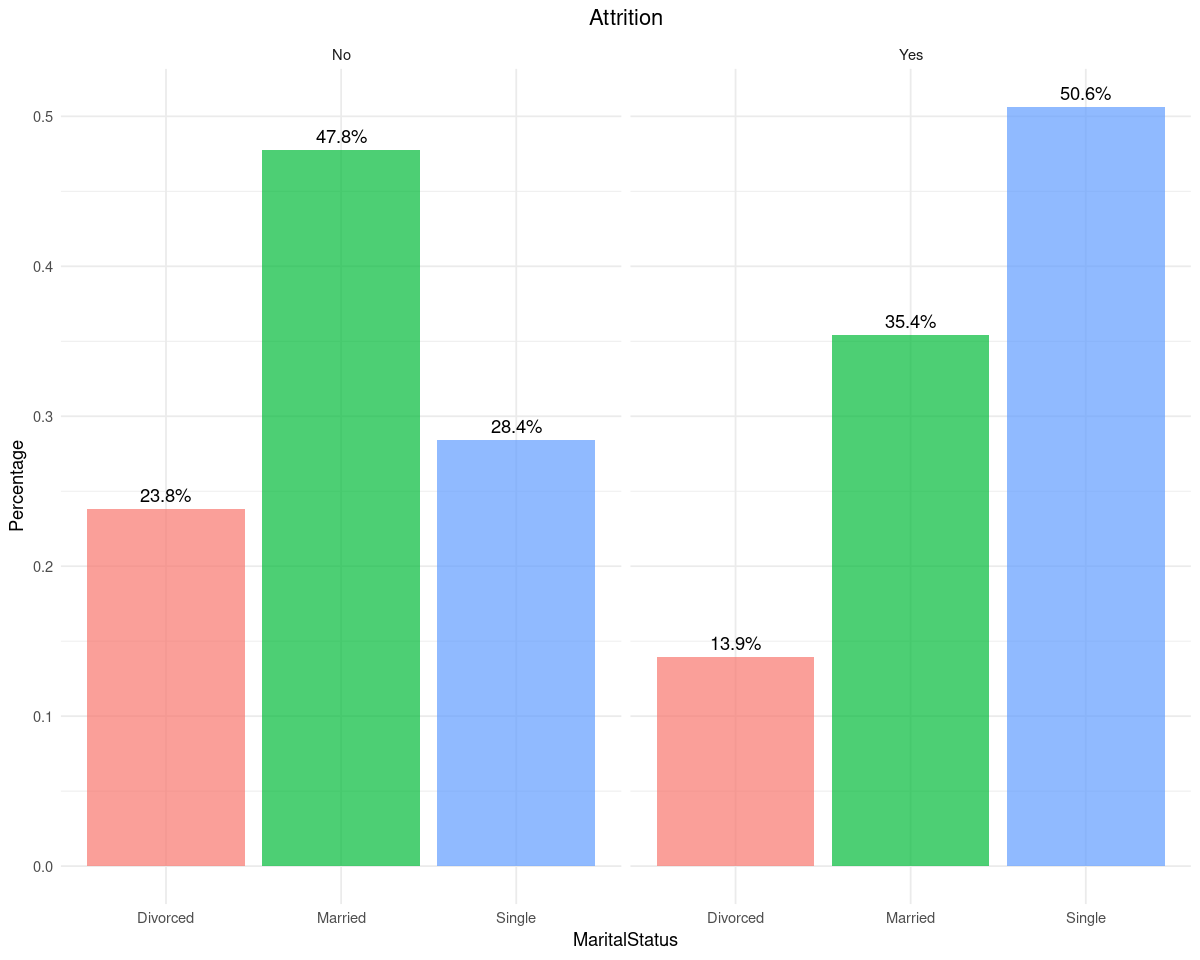

In [313]:
df %>%
        ggplot(aes(x = MaritalStatus, group = Attrition)) + 
        geom_bar(aes(y = ..prop.., fill = factor(..x..)), 
                 stat="count", 
                 alpha = 0.7) +
        geom_text(aes(label = scales::percent(..prop..), y = ..prop.. ), 
                  stat= "count", 
                  vjust = -.5) +
        labs(y = "Percentage", fill= "MaritalStatus") +
        facet_grid(~Attrition) +
        theme_minimal()+
        theme(legend.position = "none", plot.title = element_text(hjust = 0.5)) + 
        ggtitle("Attrition")

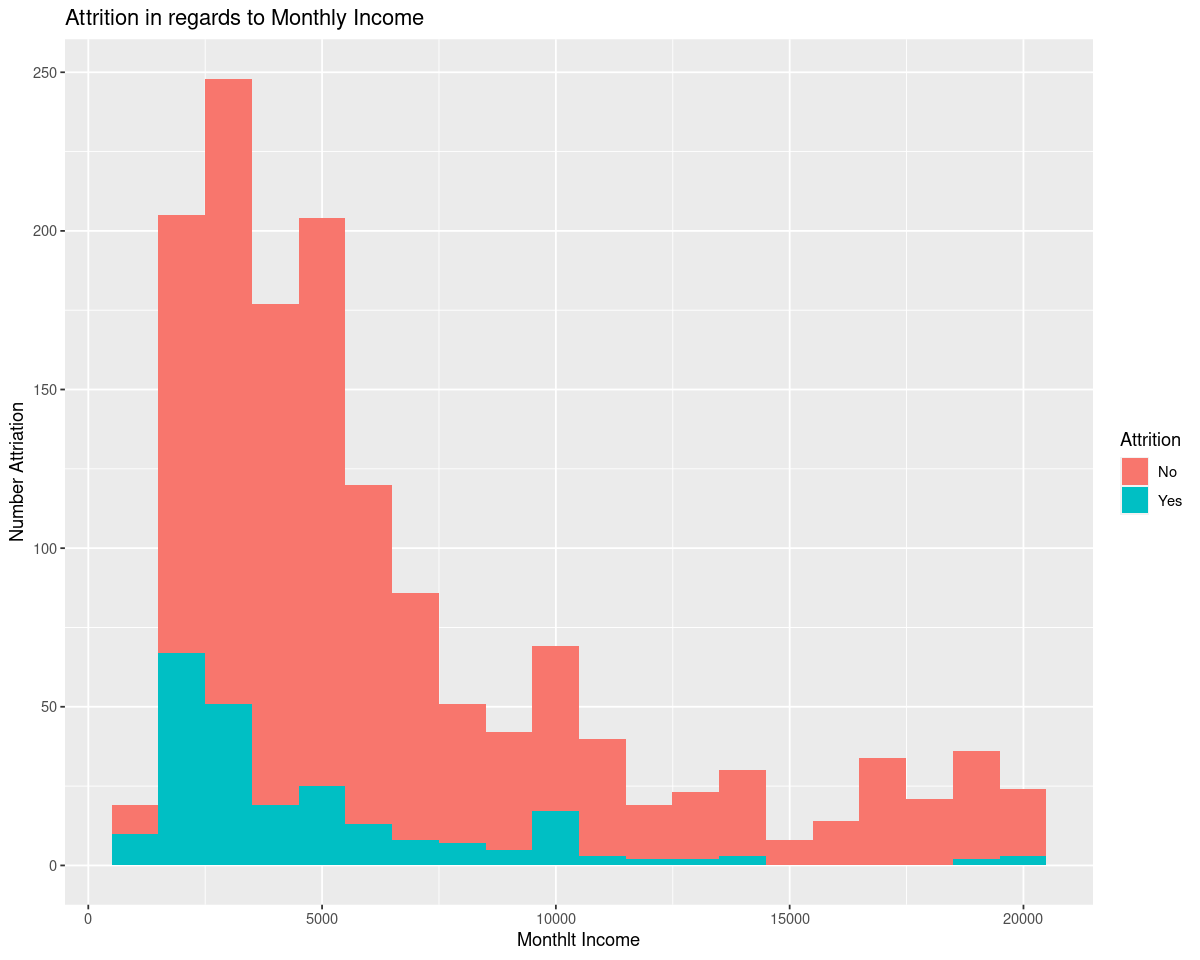

In [314]:
df %>%
        ggplot(mapping = aes(x = MonthlyIncome)) + 
        geom_histogram(aes(fill = Attrition), bins=20)+
        labs(x="Monthlt Income", y="Number Attriation")+
        ggtitle("Attrition in regards to Monthly Income")

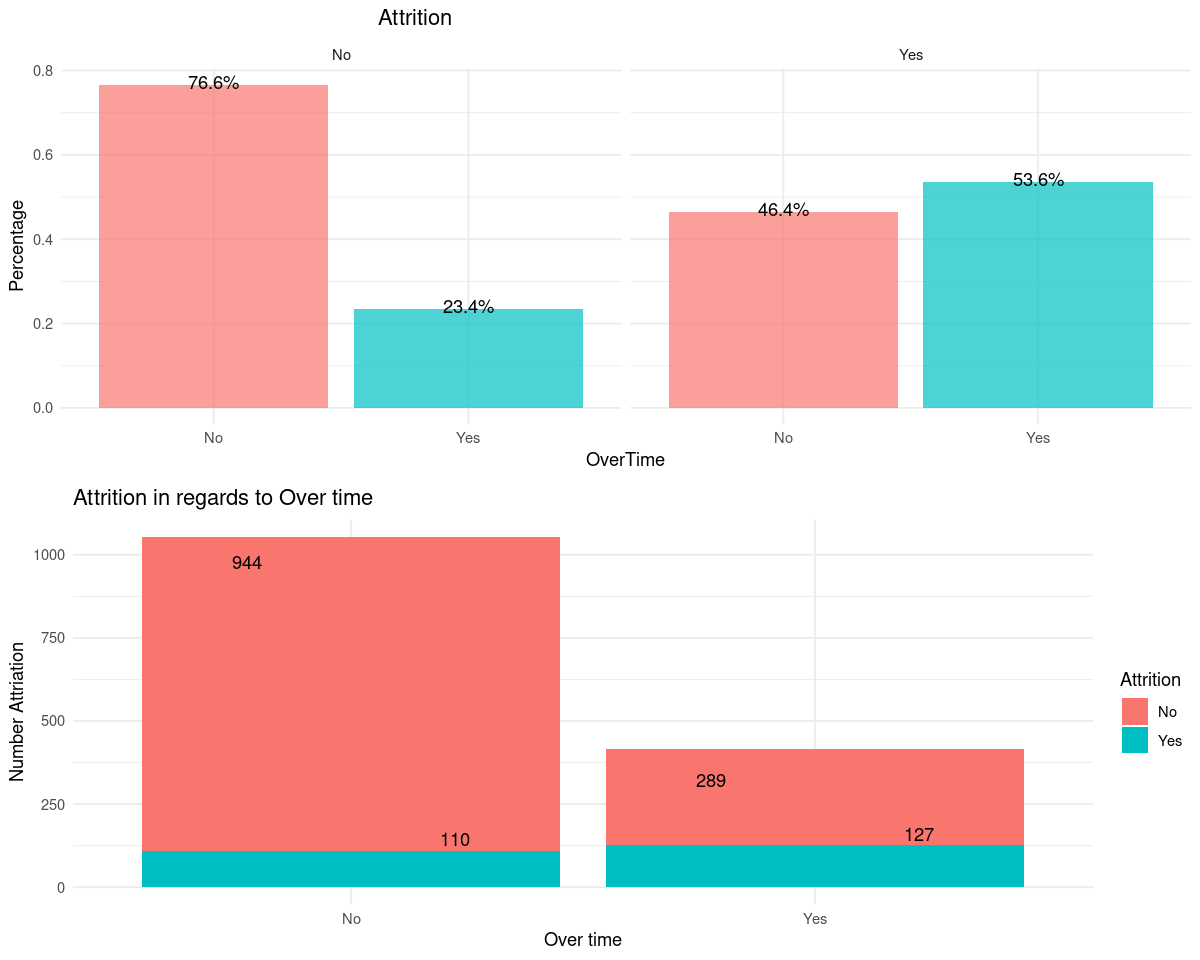

In [315]:
g1 <-df %>%
        ggplot(aes(x = OverTime, group = Attrition)) + 
        geom_bar(aes(y = ..prop.., fill = factor(..x..)), 
                 stat="count", 
                 alpha = 0.7) +
        geom_text(aes(label = scales::percent(..prop..), y = ..prop.. ), 
                  stat= "count", 
                  vjust = 0.3) +
        labs(y = "Percentage", fill= "OverTime") +
        facet_grid(~Attrition) +
        theme_minimal()+
        theme(legend.position = "none", plot.title = element_text(hjust = 0.3)) + 
        ggtitle("Attrition")


g2 <-df %>%
        group_by(OverTime, Attrition) %>%
        tally() %>%
        ggplot(aes(x = OverTime, y = n,fill=Attrition)) +
        geom_bar(stat = "identity") +
        theme_minimal()+
        geom_text(aes(label = n), vjust = -0.3, position = position_dodge(0.9))+
        labs(x="Over time", y="Number Attriation")+
        ggtitle("Attrition in regards to Over time")

grid.arrange(g1,g2)

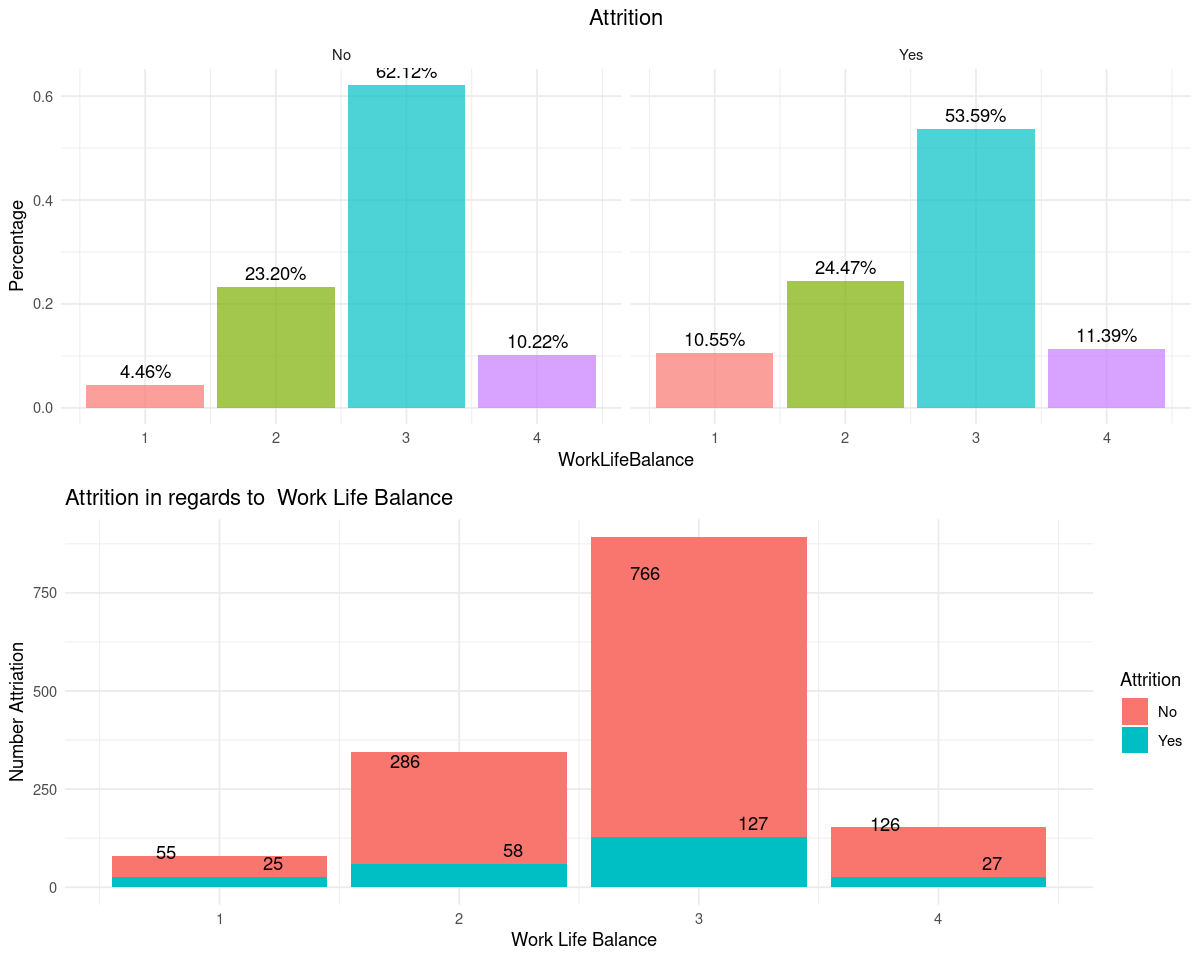

In [316]:
g1<-df %>%
        ggplot(aes(x = WorkLifeBalance, group = Attrition)) + 
        geom_bar(aes(y = ..prop.., fill = factor(..x..)), 
                 stat="count", 
                 alpha = 0.7) +
        geom_text(aes(label = scales::percent(..prop..), y = ..prop.. ), 
                  stat= "count", 
                  vjust = -.5) +
        labs(y = "Percentage", fill= "WorkLifeBalance") +
        facet_grid(~Attrition) +
        theme_minimal()+
        theme(legend.position = "none", plot.title = element_text(hjust = 0.5)) + 
        ggtitle("Attrition")

g2<- df %>%
        group_by(WorkLifeBalance, Attrition) %>%
        tally() %>%
        ggplot(aes(x = WorkLifeBalance, y = n,fill=Attrition)) +
        geom_bar(stat = "identity") +
        theme_minimal()+
        geom_text(aes(label = n), vjust = -0.5, position = position_dodge(0.9))+
        labs(x="  Work Life Balance", y="Number Attriation")+
        ggtitle("Attrition in regards to  Work Life Balance")
grid.arrange(g1,g2)

---
## SELECCION DE CARACTERISTICAS

Now we want to use some data wrapping to make the results better:

1. Making Age Group 18-24 = Young , 25-54=Middle-Age , 54-120= Adult

In [317]:
feature.engineering.df <- original_df

In [318]:
feature.engineering.df$AgeGroup <- as.factor(
        ifelse(feature.engineering.df$Age<=24,"Young", ifelse(
        feature.engineering.df$Age<=54,"Middle-Age","Adult"
        ))
)
table(feature.engineering.df$AgeGroup)


     Adult Middle-Age      Young 
        69       1304         97 

as we see the majority of employee are Young

2. Total Satisfaction the total of the satisfaction from Job, Environment, etc.

In [319]:
feature.engineering.df$TotlaSatisfaction <- 
        as.numeric(feature.engineering.df$EnvironmentSatisfaction)+
        as.numeric(feature.engineering.df$JobInvolvement)+
        as.numeric(feature.engineering.df$JobSatisfaction)+
        as.numeric(feature.engineering.df$RelationshipSatisfaction)+
        as.numeric(feature.engineering.df$WorkLifeBalance)

summary(feature.engineering.df$TotlaSatisfaction)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   6.00   12.00   14.00   13.65   15.00   20.00 

3. Study Years for getting Education Level certificate

In [320]:
table(feature.engineering.df$Education)
# As we see here, there are five Education level
# From high School to PhD (HighSchool=10 years, College=2 years, Bachelor=4 years,Master=2 years,PhD= four years)
# we used culumative years for any level


  1   2   3   4   5 
170 282 572 398  48 

In [321]:
feature.engineering.df$YearsEducation <-  ifelse(feature.engineering.df$Education==1,10,ifelse(feature.engineering.df$Education==2,12,
        ifelse(feature.engineering.df$Education==3,16,ifelse(feature.engineering.df$Education==4,18,22))))  

table(feature.engineering.df$YearsEducation)
# the majority of employee are 16 years education (Bachelor)


 10  12  16  18  22 
170 282 572 398  48 

4. Less or more than average Monthly Income We calculate the average income and generate the level of incom(High or Low)

In [322]:
feature.engineering.df$IncomeLevel <- as.factor(
        ifelse(feature.engineering.df$MonthlyIncome<ave(feature.engineering.df$MonthlyIncome),"Low","High")
)
table(feature.engineering.df$IncomeLevel)


High  Low 
 493  977 

### ¿Qué correlación tenemos entre columnas? 

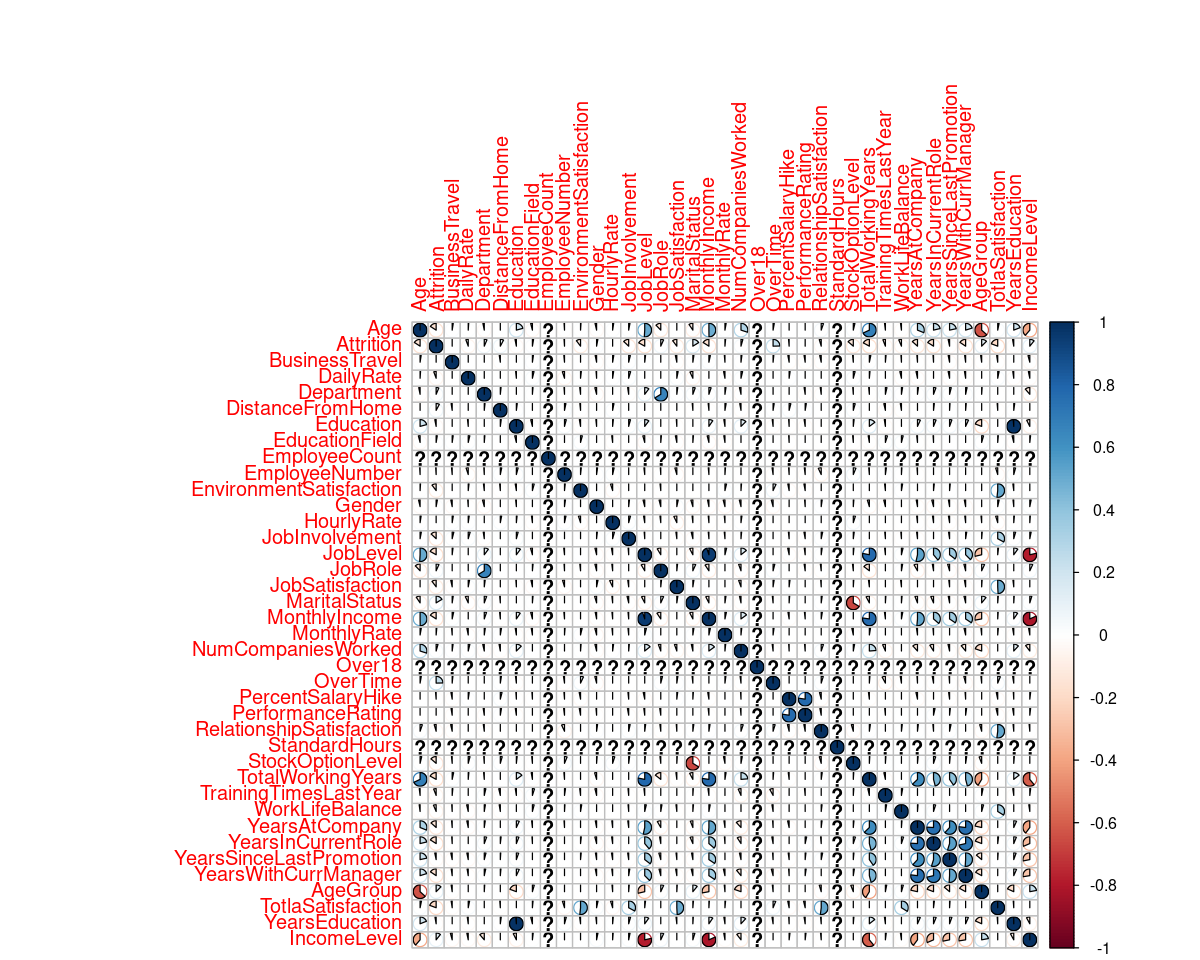

In [323]:
corrplot(cor(sapply(feature.engineering.df,as.integer)),method = "pie")


1. En la tabla de correlacion podemos ver dos pares de caracteristicas que tienen una muy alta correlacion, que són:

         JobLevel - MonthlyIncome

         Education - YearsEducation  
         
     
2. También hay algunas caracteristicas que tienen alta correlación pero no tanto como las anteriores, que són:
 
         Total working years - JobLevel 
         
         Total working years - MonthlyIncome  
         
         YearsWithCurrManager - YearsAtCompany
         
         YearsWithCurrManager - YearsInCurrentRole
         
         Age Group - Age
         
         StockOptionLevel - MaritalStatus
         
         Age - Total Working years
         
         JobRole - Department
         
         JobLevel - TotalWorkingYears
         
         PerformanceRating - PercentSalaryHike
     
Estas caracteristicas causan multicolinealidad en nuestro dataset, por tanto eliminaremos algunas de esas caracteristicas:

        JobLevel

        Age

        Department

        YearsWithCurrManager

        EmployeeNumber
        
        PerformanceRating

Y hemos eliminado 3 características que tienen un valor constante y no aporta información:

        EmployeeCount
        
        Over18
        
        StandardHours

In [324]:
feature.select <- subset(original_df, select = - c(JobLevel, Age, Department, YearsWithCurrManager,Over18, EmployeeNumber, EmployeeCount, StandardHours, PerformanceRating))

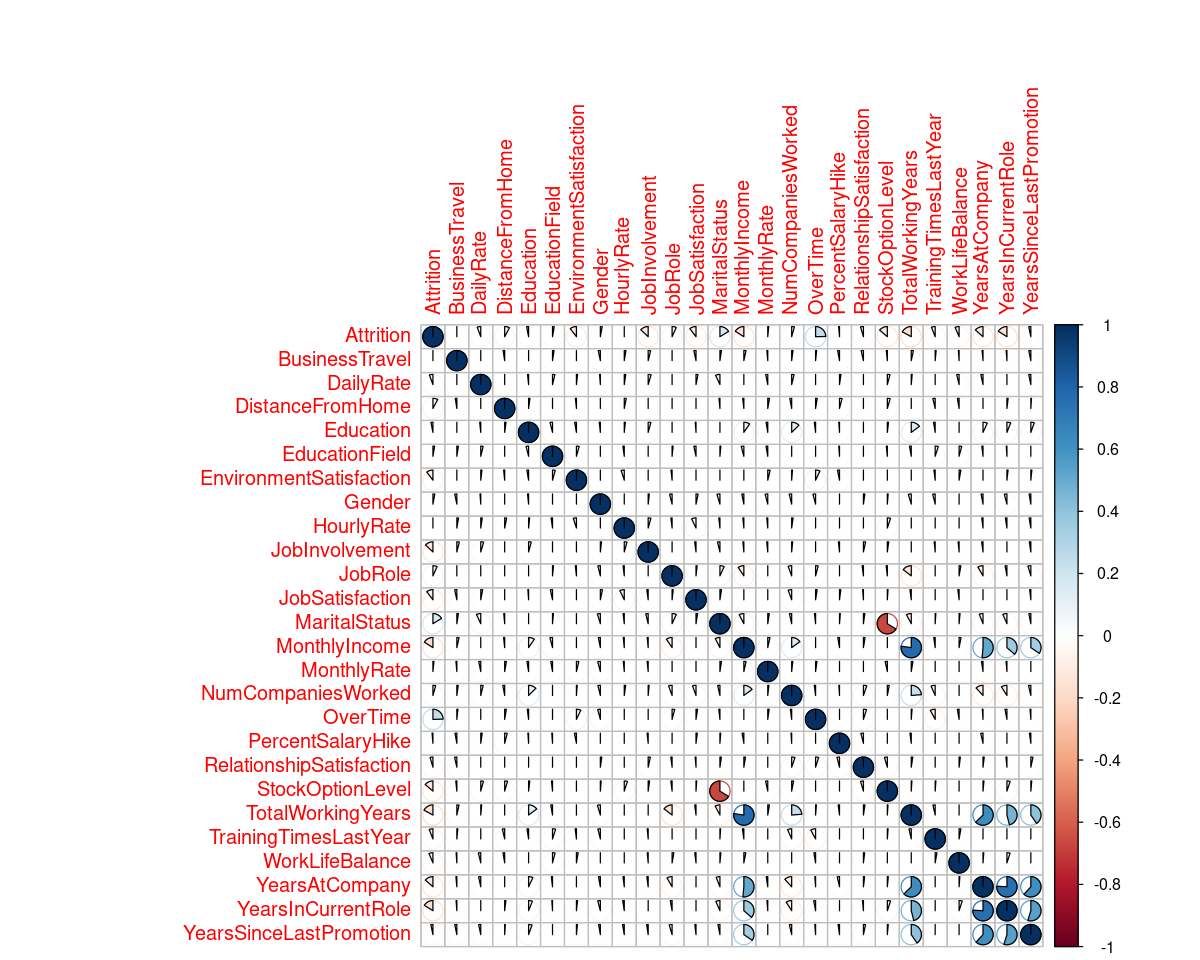

In [325]:
corrplot(cor(sapply(feature.select,as.integer)),method = "pie")

---
## HIPOTESIS 

Creemos que los modelos que mejor van a funcionar para esta clasificación binaria van a ser el “Super Vector Machine” y probablemente la red neuronal, aunque nos preocupa que los modelos no aprendan fácilmente como detectar los casos positivos en “Attrition” ya que es un número menor de casos que el contrario. 

## DIVIDIR LOS DATOS

Dividimos los datos entre "train" para entrenar a los modelos, y "test" para probar como de bien funcionan y obtener resultados y conclusiones de cada uno de ellos.

In [326]:
set.seed(142)

split.df <- feature.select[sample(nrow(feature.select)),]
#Convertir la columna Attrition en numerica
split.df$Attrition <- as.numeric(as.character(mapvalues(split.df$Attrition, from=c('Yes', 'No'), to = c(1,0))))
split.df$BusinessTravel <- as.numeric(as.character(mapvalues(split.df$BusinessTravel, from=c('Travel_Frequently','Travel_Rarely', 'Non-Travel'), to = c(3,2,1))))
split.df$OverTime <- as.numeric(as.character(mapvalues(split.df$OverTime, from=c('Yes', 'No'), to = c(1,0))))

# Convertir las columnas siguientes a Factor para despues aplicar dummy
cols <- c("Education", "EnvironmentSatisfaction", "JobInvolvement", 
          "JobSatisfaction", "RelationshipSatisfaction", 
         "StockOptionLevel", "TrainingTimesLastYear", "WorkLifeBalance")

split.df[cols] <- lapply(split.df[cols], factor)

split.df[cols] <- NULL


In [327]:
head(split.df)

Attrition BusinessTravel DailyRate DistanceFromHome EducationField  
1325 0         2               726      29               Life Sciences   
756  0         2              1234      11               Life Sciences   
1201 0         2               528       1               Life Sciences   
837  1         2               408      23               Life Sciences   
421  0         2               986       3               Medical         
901  0         3               469       3               Technical Degree
     Gender HourlyRate JobRole                   MaritalStatus MonthlyIncome
1325 Male   93         Healthcare Representative Divorced       6384        
756  Female 90         Manager                   Married       17650        
1201 Female 44         Human Resources           Divorced       3195        
837  Female 45         Sales Executive           Married        7336        
421  Male   93         Research Director         Married       11935        
901  Male   46         Research Scientist        Married        3692        
     MonthlyRate NumCompaniesWorked OverTime PercentSalaryHike
1325 21143       8                  0        17               
756   5404       3                  0        13               
1201  4167       4                  1        18               
837  11162       1                  0        13               
421  21526       1                  0        18               
901   9256       1                  0        12               
     TotalWorkingYears YearsAtCompany YearsInCurrentRole
1325 11                 7              0                
756  26                 9              3                
1201  8                 2              2                
837  11                11              8                
421  10                10              2                
901  12                11             10                
     YearsSinceLastPromotion
1325 1                      
756  1                      
1201 2                      
837  3                      
421  0                      
901  0

In [328]:
#Convertir todas las caracteristicas a numericas para poder aplicar los modelos (one-hot-encoding)
dmy <- dummyVars("~.", data=split.df)
new <- data.frame(predict(dmy, newdata=split.df,levelsOnly=True))
head(new)

Attrition BusinessTravel DailyRate DistanceFromHome
1325 0         2               726      29              
756  0         2              1234      11              
1201 0         2               528       1              
837  1         2               408      23              
421  0         2               986       3              
901  0         3               469       3              
     EducationField.Human.Resources EducationField.Life.Sciences
1325 0                              1                           
756  0                              1                           
1201 0                              1                           
837  0                              1                           
421  0                              0                           
901  0                              0                           
     EducationField.Marketing EducationField.Medical EducationField.Other
1325 0                        0                      0                   
756  0                        0                      0                   
1201 0                        0                      0                   
837  0                        0                      0                   
421  0                        1                      0                   
901  0                        0                      0                   
     EducationField.Technical.Degree ⋯ MaritalStatus.Single MonthlyIncome
1325 0                               ⋯ 0                     6384        
756  0                               ⋯ 0                    17650        
1201 0                               ⋯ 0                     3195        
837  0                               ⋯ 0                     7336        
421  0                               ⋯ 0                    11935        
901  1                               ⋯ 0                     3692        
     MonthlyRate NumCompaniesWorked OverTime PercentSalaryHike
1325 21143       8                  0        17               
756   5404       3                  0        13               
1201  4167       4                  1        18               
837  11162       1                  0        13               
421  21526       1                  0        18               
901   9256       1                  0        12               
     TotalWorkingYears YearsAtCompany YearsInCurrentRole
1325 11                 7              0                
756  26                 9              3                
1201  8                 2              2                
837  11                11              8                
421  10                10              2                
901  12                11             10                
     YearsSinceLastPromotion
1325 1                      
756  1                      
1201 2                      
837  3                      
421  0                      
901  0

In [329]:
# Dividimos los datos con un 70% en train y 30% en test
trainIndex<-sample(1:nrow(new),nrow(new)*.7)
train <- new[trainIndex,]
test <- new[-trainIndex,]

---
# MODELOS
## REGRESION LOGISTICA

In [330]:
#Aplicamos el modelo de regresion logica con nuestro train y calculamos el porcentaje de aciertos con el test
#family = "binomial" Este parametro nos sirve para especificar que nuestra salida ha de ser binaria
finalGlm <- glm(Attrition~., data = train, family = "binomial")
thresh <- 0.5
predictedAttritionNumLog <- predict(finalGlm,newdata=test,type='response')
predictedAttritionLog <- ifelse(predictedAttritionNumLog > thresh,1,0) 
predictedAttrition <- predictedAttritionLog
#Matriz de confusion
cm <- confusionMatrix(table(Pred = predictedAttrition, Test = test$Attrition), positive='1')

In [331]:
cm

Confusion Matrix and Statistics

    Test
Pred   0   1
   0 358  47
   1  13  23
                                          
               Accuracy : 0.8639          
                 95% CI : (0.8284, 0.8945)
    No Information Rate : 0.8413          
    P-Value [Acc > NIR] : 0.1062          
                                          
                  Kappa : 0.3656          
                                          
 Mcnemar's Test P-Value : 2.042e-05       
                                          
            Sensitivity : 0.32857         
            Specificity : 0.96496         
         Pos Pred Value : 0.63889         
         Neg Pred Value : 0.88395         
             Prevalence : 0.15873         
         Detection Rate : 0.05215         
   Detection Prevalence : 0.08163         
      Balanced Accuracy : 0.64677         
                                          
       'Positive' Class : 1               
                                          

En este modelo hemos obtenido una accuracy de 86,39%.

Es mejor detectando los casos negativos que los positivos.

En los positivos solo llega a un 32,86% de los casos reales, pero en los negativos llega hasta un 96,496%

Podemos ver en Pos Pred Value que tenemos un 63,889% y por tanto, damos muchos positivos erróneos.

## DISCRIMINADOR LINEAL

In [332]:
#Aplicamos el modelo de discriminador lineal con nuestro train y calculamos el porcentaje de aciertos con el test
model.lin<-lda(Attrition~. ,data=train)
#type = "vector" Esto nos sirve para que las predicciones se guarden como vector para poder calcular la accuracy y mostrar la matriz de confusion
lin.pred<-predict(model.lin,newdata=test, type = "vector")

In [333]:
summary(lin.pred)

          Length Class  Mode   
class     441    factor numeric
posterior 882    -none- numeric
x         441    -none- numeric

In [334]:
#Matriz de confusion
C.lin <-confusionMatrix(table(Pred=lin.pred$class, Test=test$Attrition), positive='1')
C.lin

Confusion Matrix and Statistics

    Test
Pred   0   1
   0 355  49
   1  16  21
                                         
               Accuracy : 0.8526         
                 95% CI : (0.816, 0.8844)
    No Information Rate : 0.8413         
    P-Value [Acc > NIR] : 0.2821         
                                         
                  Kappa : 0.3176         
                                         
 Mcnemar's Test P-Value : 7.214e-05      
                                         
            Sensitivity : 0.30000        
            Specificity : 0.95687        
         Pos Pred Value : 0.56757        
         Neg Pred Value : 0.87871        
             Prevalence : 0.15873        
         Detection Rate : 0.04762        
   Detection Prevalence : 0.08390        
      Balanced Accuracy : 0.62844        
                                         
       'Positive' Class : 1              
                                         

Con este modelo hemos obtenido un accuracy de 85,26% y por tanto ha disminuido respecto al anterior modelo, como no mejora tampoco en la predicción de positivos , por tanto parece que es peor modelo que el de regresión logística.

## DISCRIMINADOR CUADRATICO

In [335]:
#Aplicamos el modelo de discriminador cuadratico con nuestro train y calculamos el porcentaje de aciertos con el test
#En este modelo hemos seleccionado las caracteristicas numericas porque con las categoricas da un error Error in qda.default(x, grouping, ...): rank deficiency in group 0
train.aux.quad <- subset(train, select = c(Attrition,DailyRate,DistanceFromHome,HourlyRate,MonthlyRate,MonthlyIncome,YearsAtCompany,TotalWorkingYears,YearsInCurrentRole,YearsSinceLastPromotion ))
model.quad<-qda(Attrition~. ,data=train.aux.quad)
#type = "vector" Esto nos sirve para que las predicciones se guarden como vector para poder calcular la accuracy y mostrar la matriz de confusion
quad.pred<-predict(model.quad,newdata=test, type = "vector")

In [336]:
C.quad <-confusionMatrix(table(Pred=quad.pred$class, Test=test$Attrition), positive='1')
C.quad

Confusion Matrix and Statistics

    Test
Pred   0   1
   0 354  60
   1  17  10
                                          
               Accuracy : 0.8254          
                 95% CI : (0.7867, 0.8597)
    No Information Rate : 0.8413          
    P-Value [Acc > NIR] : 0.836           
                                          
                  Kappa : 0.1292          
                                          
 Mcnemar's Test P-Value : 1.698e-06       
                                          
            Sensitivity : 0.14286         
            Specificity : 0.95418         
         Pos Pred Value : 0.37037         
         Neg Pred Value : 0.85507         
             Prevalence : 0.15873         
         Detection Rate : 0.02268         
   Detection Prevalence : 0.06122         
      Balanced Accuracy : 0.54852         
                                          
       'Positive' Class : 1               
                                          

Este modelo nos da unos resultados aun peores pero también hemos tenido que quitar todas las features que eran categóricas que hemos hecho one-hot encoding ya que nos daba un error de "rank deficiency in group 0".

Por lo que se puede ver en la matriz de confusión los valores de predicción de los positivos són muy bajos, por tanto falla en casi todas las predicciones positivas (14,29% de precisión).

## SVM

---

El siguiente espacio recoge el trabajo de  
ShumaIshigami,   
https://www.kaggle.com/shumakaggle/prediction-of-attrition-by-using-svm,


In [337]:
#Aplicamos el modelo SVM con nuestro train y calculamos el porcentaje de aciertos con el test
#type="C-classification" Hiperparametros de rango 1 a infinito
svm.model.1<-svm(train$Attrition~., type="C-classification", data=train)

In [338]:
pred.svm <- predict(svm.model.1, test)
#Matriz de confusion
cm.svm <- confusionMatrix(table(Pred = pred.svm,Test = test$Attrition), positive='1')
cm.svm

Confusion Matrix and Statistics

    Test
Pred   0   1
   0 369  63
   1   2   7
                                         
               Accuracy : 0.8526         
                 95% CI : (0.816, 0.8844)
    No Information Rate : 0.8413         
    P-Value [Acc > NIR] : 0.2821         
                                         
                  Kappa : 0.1463         
                                         
 Mcnemar's Test P-Value : 9.911e-14      
                                         
            Sensitivity : 0.10000        
            Specificity : 0.99461        
         Pos Pred Value : 0.77778        
         Neg Pred Value : 0.85417        
             Prevalence : 0.15873        
         Detection Rate : 0.01587        
   Detection Prevalence : 0.02041        
      Balanced Accuracy : 0.54730        
                                         
       'Positive' Class : 1              
                                         

Este modelo nos da un porcentaje muy bajo de predicciones positivas acertadas (solo un 10%) siendo el mas bajo de los que hemos visto hasta ahora, aunque es de momento el que mas predicciones negativas acierta (99,461%).

## ARBOL DE CLASIFICACION

In [339]:
#Aplicamos el modelo arbol de clasificacion con nuestro train y calculamos el porcentaje de aciertos con el test
dtmodel <- rpart(Attrition~., data = train)
your_threshold <- 0.5
#type = "vector" Esto nos sirve para que las predicciones se guarden como vector para poder calcular la accuracy y mostrar la matriz de confusion
dt.pred <- predict(dtmodel, test, type = "vector") >= your_threshold

In [340]:
summary(dt.pred)

   Mode   FALSE    TRUE 
logical     411      30 

In [341]:
thresh <- 0.5
predictedAttritionTreeClass <- ifelse(dt.pred > thresh,1,0) 
cm <- confusionMatrix(table(Pred = predictedAttritionTreeClass, Test = test$Attrition), positive='1')

In [342]:
cm

Confusion Matrix and Statistics

    Test
Pred   0   1
   0 361  50
   1  10  20
                                          
               Accuracy : 0.8639          
                 95% CI : (0.8284, 0.8945)
    No Information Rate : 0.8413          
    P-Value [Acc > NIR] : 0.1062          
                                          
                  Kappa : 0.3368          
                                          
 Mcnemar's Test P-Value : 4.782e-07       
                                          
            Sensitivity : 0.28571         
            Specificity : 0.97305         
         Pos Pred Value : 0.66667         
         Neg Pred Value : 0.87835         
             Prevalence : 0.15873         
         Detection Rate : 0.04535         
   Detection Prevalence : 0.06803         
      Balanced Accuracy : 0.62938         
                                          
       'Positive' Class : 1               
                                          

Este modelo obtiene una accuracy bastante alta llegando a un 86,39% pero no es el mejor ni en predicción de negativos ni de positivos de los que hemos visto hasta ahora.

## BAGGING

In [343]:
#Creamos un df que en vez de Attrition tenga target que sera lo mismo que Attrition pero convertido a factor para poder aplicar Bagging
train.aux.target <- train
train.aux.target$target <- as.factor(train.aux.target$Attrition)
train.aux.target <- subset(train.aux.target, select = - c(Attrition))

In [344]:
str(train.aux.target$target)

 Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 2 1 1 ...


In [345]:
#Aplicamos el modelo bagging con nuestro train y calculamos el porcentaje de aciertos con el test
#m-final Numero de iteraciones que hara el bagging, hemos escogido 10 porque es la que nos da mejores resultados
model.bagging <- bagging(target~., data=train.aux.target, mfinal=10)

In [346]:
test.aux.target <- test
test.aux.target$target <- as.factor(test.aux.target$Attrition)
test.aux.target <- subset(test.aux.target, select = - c(Attrition))

In [347]:
str(test.aux.target$target)

 Factor w/ 2 levels "0","1": 1 1 1 1 1 2 1 1 1 1 ...


In [348]:
predict.bagging <- predict(model.bagging, newdata=test.aux.target)

In [349]:
#Calculamos el error de las predicciones con nuestros datos de test
table.bagging <- predict.bagging$confusion

P.err<-1-sum(diag(table.bagging))/sum(table.bagging)
round(P.err,4)

[1] 0.1361

In [350]:
#Matriz de confusion
cm.bagging <- confusionMatrix(table.bagging, positive = '1')
cm.bagging

Confusion Matrix and Statistics

               Observed Class
Predicted Class   0   1
              0 369  58
              1   2  12
                                          
               Accuracy : 0.8639          
                 95% CI : (0.8284, 0.8945)
    No Information Rate : 0.8413          
    P-Value [Acc > NIR] : 0.1062          
                                          
                  Kappa : 0.2458          
                                          
 Mcnemar's Test P-Value : 1.243e-12       
                                          
            Sensitivity : 0.17143         
            Specificity : 0.99461         
         Pos Pred Value : 0.85714         
         Neg Pred Value : 0.86417         
             Prevalence : 0.15873         
         Detection Rate : 0.02721         
   Detection Prevalence : 0.03175         
      Balanced Accuracy : 0.58302         
                                          
       'Positive' Class : 1               
     

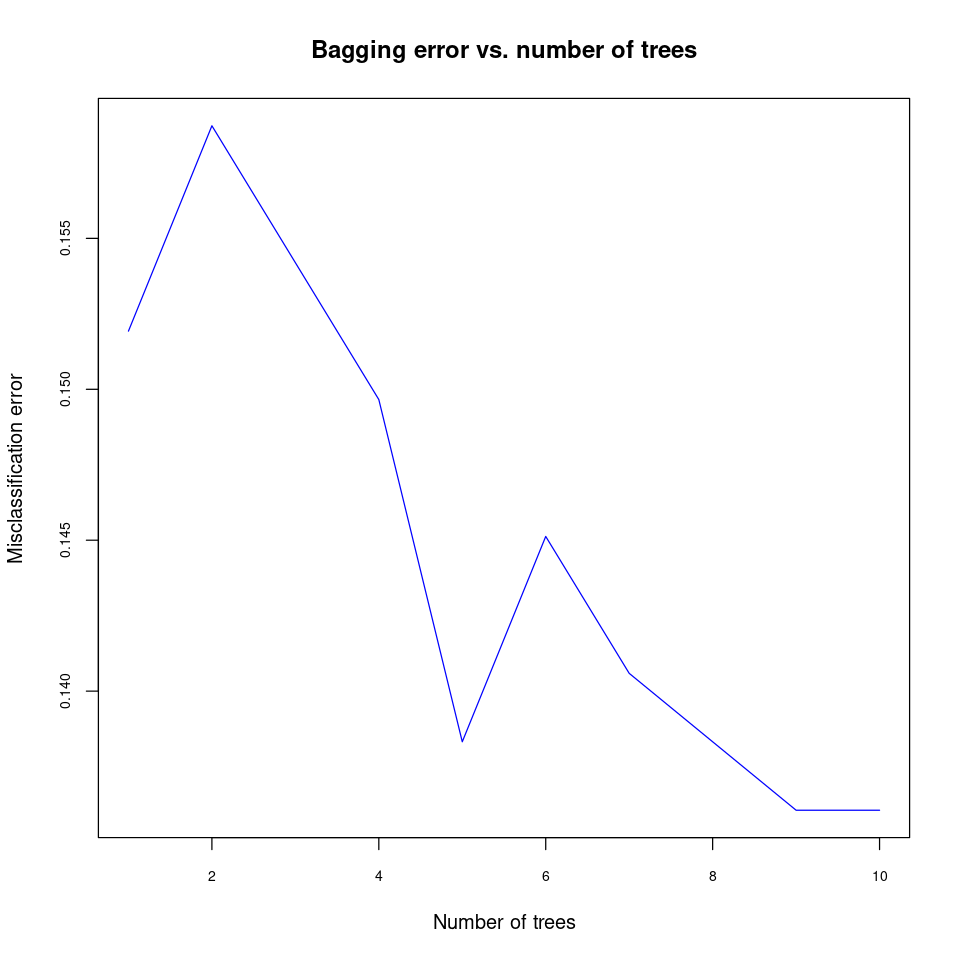

In [351]:
errev<-errorevol(model.bagging, test.aux.target)
options(repr.plot.width=8,repr.plot.height=8)
plot(errev$error, type="l",cex.axis=0.7,xlab="Number of trees",ylab="Misclassification error",
     main="Bagging error vs. number of trees",col = "blue")

Este modelo nos da un porcentaje muy bajo de predicciones positivas acertadas (solo un 17,143%), aunque es de momento el que mas predicciones negativas acierta (99,461%) junto al modelo SVM.

## RANDOM FOREST

In [352]:
#Aplicamos el modelo random forest con nuestro train y calculamos el porcentaje de aciertos con el test
#ntree Numero de arboles con el que entrenar el modelo
#mtry Numero de variables aleatorias que usa cada arbol
#importance Valorar la importancia de cada variable
rfmodel <- randomForest(Attrition~., data = train, ntree = 1000, mtry = 30, importance = TRUE)
print(rfmodel)


Call:
 randomForest(formula = Attrition ~ ., data = train, ntree = 1000,      mtry = 30, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 1000
No. of variables tried at each split: 30

          Mean of squared residuals: 0.1167047
                    % Var explained: 14.16


In [353]:
# Predicting the random forest model based upon validation data
your_threshold <- 0.5
pred_rf <- predict(rfmodel, test, type = c("class"))>= your_threshold

In [354]:
thresh <- 0.5
predictedAttritionRandomForest <- ifelse(pred_rf > thresh,1,0) 
cm <- confusionMatrix(table(Pred = predictedAttritionRandomForest, Test = test$Attrition), positive='1')

In [355]:
cm

Confusion Matrix and Statistics

    Test
Pred   0   1
   0 366  50
   1   5  20
                                          
               Accuracy : 0.8753          
                 95% CI : (0.8408, 0.9046)
    No Information Rate : 0.8413          
    P-Value [Acc > NIR] : 0.02666         
                                          
                  Kappa : 0.3683          
                                          
 Mcnemar's Test P-Value : 2.975e-09       
                                          
            Sensitivity : 0.28571         
            Specificity : 0.98652         
         Pos Pred Value : 0.80000         
         Neg Pred Value : 0.87981         
             Prevalence : 0.15873         
         Detection Rate : 0.04535         
   Detection Prevalence : 0.05669         
      Balanced Accuracy : 0.63612         
                                          
       'Positive' Class : 1               
                                          

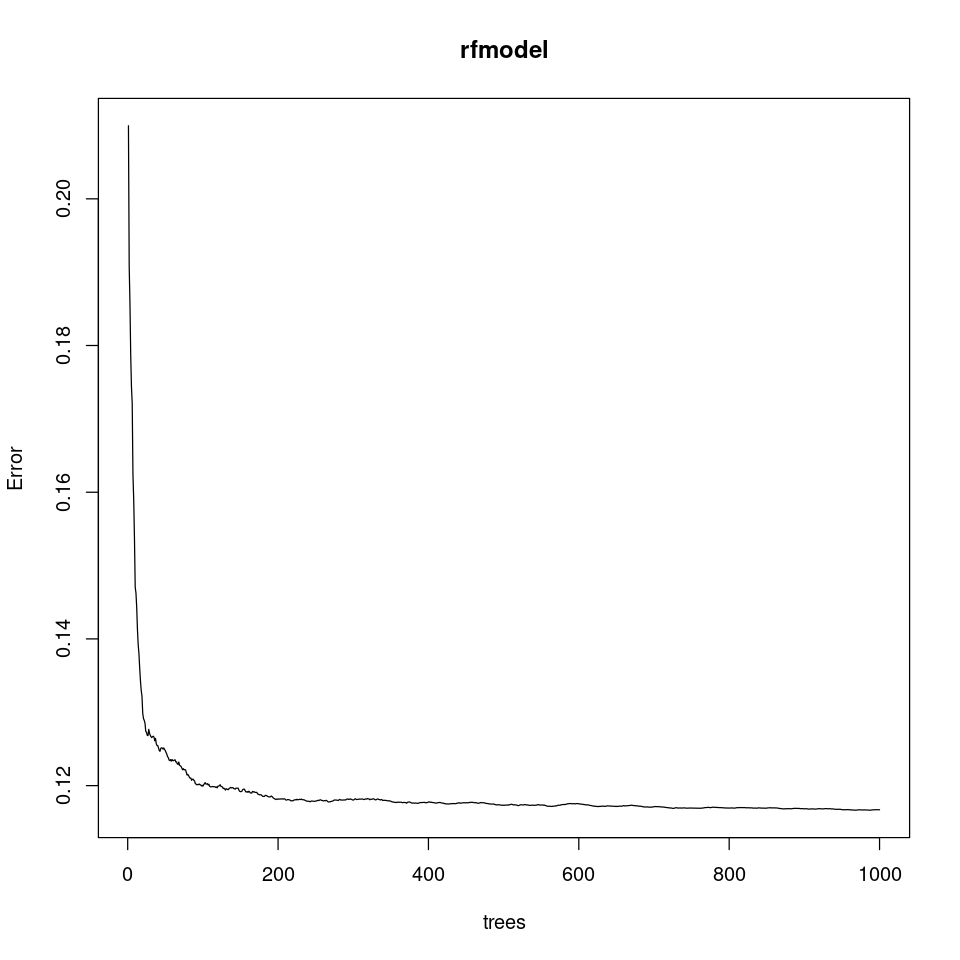

In [356]:
# Predicting the random forest model based upon validation data
plot(rfmodel)

Este modelo es el que mayor accuracy nos da (87,53%) , pero no es el mejor prediciendo positivos ni negativos, aunque es de los mas altos en ambos, por tanto es el mas constante que hemos visto hasta ahora.

## BOOSTING

In [357]:
default<-rpart.control()
stump<-rpart.control(cp=-1,maxdepth=1,minsplit=0)
four<-rpart.control(cp= -1,maxdepth=2,minsplit=0)

In [358]:
#Aplicamos el modelo boosting con nuestro train y calculamos el porcentaje de aciertos con el test
#iter Numero de iteraciones de entrenamienot
#loss="e" exponential loss
#type="discrete" Discrete boosting
#control Lista de propiedades del "weak model", es decir del arbol de decision

gdis <- ada(Attrition~.,data=train, iter=1000, loss="e", type="discrete", control = default)

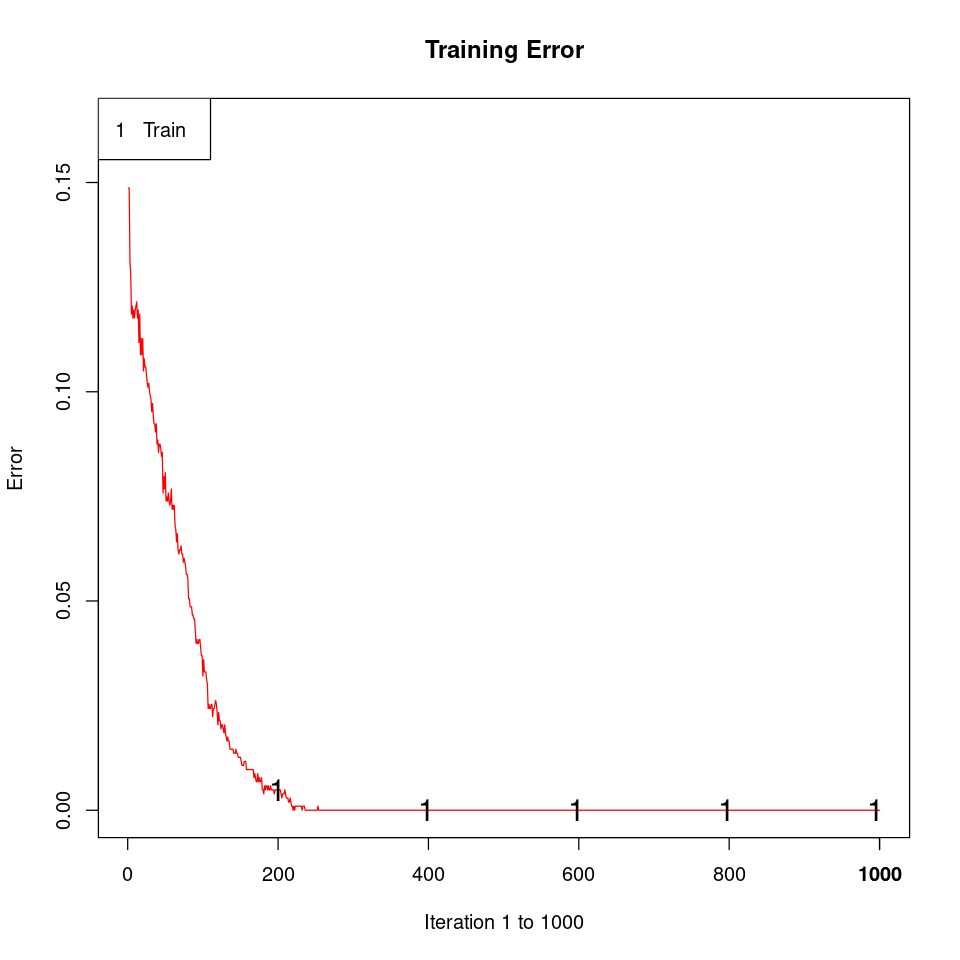

In [359]:
options(repr.plot.width=8,repr.plot.height=8)
plot(gdis,cex=0.6,cex.axis=0.7,cex.lab=0.7)

In [360]:
gdis1 <- addtest(gdis, test, test$Attrition)

In [361]:
#Tabla de predicciones
yhat<-predict(gdis,newdata=test)
T<-table(Pred=yhat, Test=test$Attrition)
T

    Test
Pred   0   1
   0 361  55
   1  10  15

In [362]:
#Matriz de confusion
cm.boost <- confusionMatrix(T, positive = '1')
cm.boost

Confusion Matrix and Statistics

    Test
Pred   0   1
   0 361  55
   1  10  15
                                         
               Accuracy : 0.8526         
                 95% CI : (0.816, 0.8844)
    No Information Rate : 0.8413         
    P-Value [Acc > NIR] : 0.2821         
                                         
                  Kappa : 0.2534         
                                         
 Mcnemar's Test P-Value : 4.828e-08      
                                         
            Sensitivity : 0.21429        
            Specificity : 0.97305        
         Pos Pred Value : 0.60000        
         Neg Pred Value : 0.86779        
             Prevalence : 0.15873        
         Detection Rate : 0.03401        
   Detection Prevalence : 0.05669        
      Balanced Accuracy : 0.59367        
                                         
       'Positive' Class : 1              
                                         

In [363]:
#Hemos visto que en el entrenamiento hay un error minimo a partir de la iteracion 300 y no cambia en las siguientes iteraciones, por tanto usamos 300 como numero de iteraciones
gdis.2 <- ada(Attrition~.,data=train, iter=300, loss="e", type="discrete", control = default)
gdis2 <- addtest(gdis.2, test, test$Attrition)
#Tabla de predicciones
yhat.2<-predict(gdis2,newdata=test)
T.2<-table(Pred=yhat.2, Test=test$Attrition)
T.2
#Matriz de confusion
cm.boost.2 <- confusionMatrix(T.2, positive='1')
cm.boost.2

    Test
Pred   0   1
   0 364  54
   1   7  16

Confusion Matrix and Statistics

    Test
Pred   0   1
   0 364  54
   1   7  16
                                          
               Accuracy : 0.8617          
                 95% CI : (0.8259, 0.8925)
    No Information Rate : 0.8413          
    P-Value [Acc > NIR] : 0.1332          
                                          
                  Kappa : 0.2882          
                                          
 Mcnemar's Test P-Value : 3.869e-09       
                                          
            Sensitivity : 0.22857         
            Specificity : 0.98113         
         Pos Pred Value : 0.69565         
         Neg Pred Value : 0.87081         
             Prevalence : 0.15873         
         Detection Rate : 0.03628         
   Detection Prevalence : 0.05215         
      Balanced Accuracy : 0.60485         
                                          
       'Positive' Class : 1               
                                          

Este modelo obtiene una accuracy alta llegando a un 86,17% pero no es el mejor ni en predicción de negativos ni de positivos de los que hemos visto hasta ahora.

## RED NEURONAL

In [389]:
#Aplicamos una red neuronal con nuestro train y calculamos el porcentaje de aciertos con el test
#err.fct="ce" Funcion para calcular el error
#hidden Neuronas por cada capa c(16,8,4)
#linear.output=FALSE No queremos una salida lineal para nuestro modelo
#rep=100 Numero de repeticiones que entrenamos la red neuronal
A.net.01<-neuralnet((target==1)~.,data=train.aux.target,err.fct="ce", hidden=32, linear.output=FALSE,rep=1)

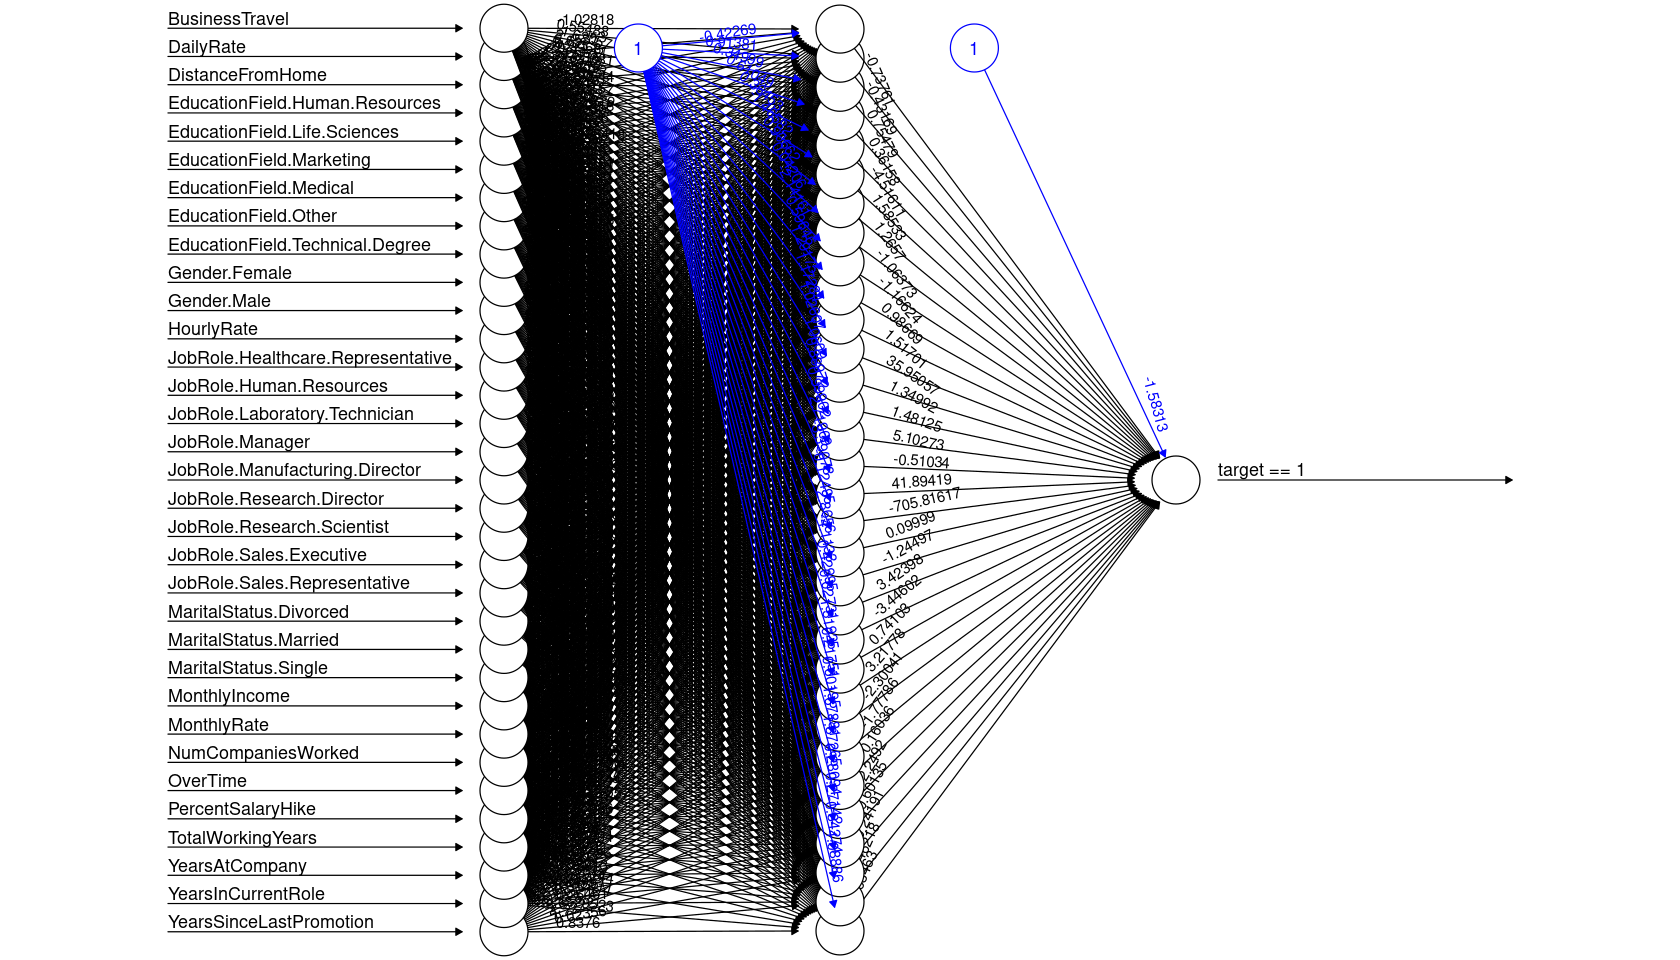

In [390]:
#Plot del modelo de la red neuronal
options(repr.plot.width=14,repr.plot.height=8)
plot(A.net.01, rep="best",cex=0.9,information=TRUE,information.pos=0.3)

In [391]:
#Predicciones con test de nuestro modelo
A.pred.01<-predict(A.net.01,newdata=test.aux.target) # Creo que cuando pongo test incluyo target y Attrition que es lo que tenemos que predecir y eso esta mal
thresh <- 0.5
A.pred.01.Bool <- ifelse(A.pred.01 > thresh,1,0) 
table(A.pred.01.Bool)

A.pred.01.Bool
  0   1 
421  20 

In [392]:
#Tabla de predicciones y accuracy de nuestro modelo
C <-table(Pred = A.pred.01.Bool, Test=test.aux.target$target)
C
n.tot<-sum(C)
n.good<-sum(diag(C))
Acc<-n.good/n.tot
round(Acc*100,5)

    Test
Pred   0   1
   0 359  62
   1  12   8

[1] 83.21995

In [393]:
#Matriz de confusion
cm.boost.2 <- confusionMatrix(C, positive='1')
cm.boost.2

Confusion Matrix and Statistics

    Test
Pred   0   1
   0 359  62
   1  12   8
                                         
               Accuracy : 0.8322         
                 95% CI : (0.794, 0.8659)
    No Information Rate : 0.8413         
    P-Value [Acc > NIR] : 0.7244         
                                         
                  Kappa : 0.1154         
                                         
 Mcnemar's Test P-Value : 1.226e-08      
                                         
            Sensitivity : 0.11429        
            Specificity : 0.96765        
         Pos Pred Value : 0.40000        
         Neg Pred Value : 0.85273        
             Prevalence : 0.15873        
         Detection Rate : 0.01814        
   Detection Prevalence : 0.04535        
      Balanced Accuracy : 0.54097        
                                         
       'Positive' Class : 1              
                                         

Este modelo es el que peores predicciones hace para los positivos ya que solo llega a 11,429% de Sensitivity, aunque depende de la ejecución.

---
# CONCLUSIONES

Hemos visto que el modelo **Random Forest** es el que mejor accuracy nos da, siendo el mas constante de todos, pero si lo que buscamos es obtener mejores predicciones para saber que trabajadores se marchan de la empresa el mejor modelo es **Regresión Logística** ya que es el que mejor Sensitivity tiene llegando a un 32,857%.

Pero como vemos en cada una de las matrices de confusión no hemos conseguido crear ningún modelo que realmente haga correctamente las predicciones Positivas, y esto se puede deber a que hay muy pocos datos de entrenamiento con un Attrition True, y por tanto cuando entrenamos el modelo muy pocas veces se hace la predicción a True. 

En casi todos los modelos hacemos muchas predicciones Negativas y pocas Positivas, y por tanto la Sensitivity de todas es muy baja (el máximo es un 32%). Aunque las Pos Pred Value no son tan bajas ya que a pesar de hacer pocas predicciones Positivas cuando se hacen suelen ser Correctas.

